<a href="https://colab.research.google.com/github/stakunlena/ich_final_project/blob/main/02_eda.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# EDA

**Цель:** выявить закономерности, влияющие на эффективность маркетинга, продаж и обучения.

**Источник данных:** очищенные CSV-файлы:
- `df_contacts_clean_YYYYMMDD.csv`
- `df_calls_clean_YYYYMMDD.csv`
- `df_deals_clean_YYYYMMDD.csv`
- `df_spend_clean_YYYYMMDD.csv`

**Структура ноутбука:**
1. Загрузка данных и первичный обзор  
2. Описательная статистика  
3. Анализ временных рядов  
4. Анализ эффективности кампаний  
5. Эффективность отдела продаж  
6. Анализ платежей и продуктов  
7. Географический анализ  
8. Сводные выводы и экспорт агрегатов

## 1. Загрузка данных и первичный обзор

In [123]:
# Импортируем основные библиотеки
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

pd.set_option("display.max_columns", None)
sns.set(style="whitegrid", palette="Blues_d") # Устанавливаем единый стиль для всех диаграмм

# Загружаем исходные данные
import os
from google.colab import drive # Импортируем библиотеку для работы с Google Drive

# Подключаем Google Drive
drive.mount('/content/drive')

# Путь к папке с данными
base_path = '/content/drive/MyDrive/P. Project 07.11/csv/'
postfix = '20251103_0053' # чтобы задавать имена версий исходных файлов

# Загружаем данные
df_contacts = pd.read_csv(base_path + 'df_contacts_clean_'+ postfix +'.csv', sep=";", encoding="utf-8-sig", parse_dates=["created_time", "modified_time"])
df_calls = pd.read_csv(base_path + 'df_calls_clean_'+ postfix +'.csv', sep=";", encoding="utf-8-sig", parse_dates=["call_start_time"])
df_deals = pd.read_csv(base_path + 'df_deals_clean_'+ postfix +'.csv', sep=";", encoding="utf-8-sig", parse_dates=["created_time", "closing_date"])
df_spend = pd.read_csv(base_path + 'df_spend_clean_'+ postfix +'.csv', sep=";", encoding="utf-8-sig", parse_dates=["date"])

# Проверяем загрузку
print(f"Contacts: {df_contacts.shape} | Calls: {df_calls.shape} | Deals: {df_deals.shape} | Spend: {df_spend.shape}")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Contacts: (18547, 4) | Calls: (95874, 9) | Deals: (21593, 25) | Spend: (19862, 12)


Проверим структуру, типы данных и наличие пропусков.

In [124]:
for name, df in {"Contacts": df_contacts, "Calls": df_calls, "Deals": df_deals, "Spend": df_spend}.items():
    print(f"\n=== {name} ===")
    display(df.head(3))
    print(f"\n{df.info()}")
    print(f"\n{df.isna().sum()}")


=== Contacts ===


id contact_owner_name        created_time  \
0  5805028000000645014       Rachel White 2023-06-27 11:28:00   
1  5805028000000872003      Charlie Davis 2023-07-03 11:31:00   
2  5805028000000889001          Bob Brown 2023-07-02 22:37:00   

        modified_time  
0 2023-12-22 13:34:00  
1 2024-05-21 10:23:00  
2 2023-12-21 13:17:00

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18547 entries, 0 to 18546
Data columns (total 4 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   id                  18547 non-null  int64         
 1   contact_owner_name  18547 non-null  object        
 2   created_time        18547 non-null  datetime64[ns]
 3   modified_time       18547 non-null  datetime64[ns]
dtypes: datetime64[ns](2), int64(1), object(1)
memory usage: 579.7+ KB

None

id                    0
contact_owner_name    0
created_time          0
modified_time         0
dtype: int64

=== Calls ===


id     call_start_time call_owner_name  contactid  \
0  5805028000000805001 2023-06-30 08:43:00        John Doe        NaN   
1  5805028000000768006 2023-06-30 08:46:00        John Doe        NaN   
2  5805028000000764027 2023-06-30 08:59:00        John Doe        NaN   

  call_type  call_duration_in_seconds_       call_status outgoing_call_status  \
0   inbound                        171          received                  NaN   
1  outbound                         28  attended dialled            completed   
2  outbound                         24  attended dialled            completed   

   scheduled_in_crm  
0                 0  
1                 0  
2                 0

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 95874 entries, 0 to 95873
Data columns (total 9 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   id                         95874 non-null  int64         
 1   call_start_time            95874 non-null  datetime64[ns]
 2   call_owner_name            95874 non-null  object        
 3   contactid                  95379 non-null  float64       
 4   call_type                  95874 non-null  object        
 5   call_duration_in_seconds_  95874 non-null  int64         
 6   call_status                95874 non-null  object        
 7   outgoing_call_status       86875 non-null  object        
 8   scheduled_in_crm           95874 non-null  int64         
dtypes: datetime64[ns](1), float64(1), int64(3), object(4)
memory usage: 6.6+ MB

None

id                              0
call_start_time                 0
call_owner_name                 0
contactid

id deal_owner_name closing_date         quality     stage  \
0  5805028000056864695        Ben Hall          NaT             NaN  new lead   
1  5805028000056859489   Ulysses Adams          NaT             NaN  new lead   
2  5805028000056832357   Ulysses Adams   2024-06-21  d - non target      lost   

  lost_reason       page       campaign       sla content        term  \
0         NaN  /eng/test  03.07.23women       NaN     v16       women   
1         NaN    /at-eng            NaN       NaN     NaN         NaN   
2  non target    /at-eng     engwien_at  00:26:43   b1-at  21_06_2024   

           source payment_type        product education_type  \
0    facebook ads          NaN            NaN            NaN   
1         organic          NaN  web developer        morning   
2  telegram posts          NaN            NaN            NaN   

         created_time  course_duration  months_of_study  initial_amount_paid  \
0 2024-06-21 15:30:00              NaN              NaN                  NaN   
1 2024-06-21 15:23:00              6.0              NaN                  0.0   
2 2024-06-21 14:45:00              NaN              NaN                  NaN   

   offer_total_amount  contact_name city level_of_deutsch stage_normalized  \
0                 NaN  5.805028e+18  NaN       Неизвестно             Lead   
1              2000.0  5.805028e+18  NaN       Неизвестно             Lead   
2                 NaN  5.805028e+18  NaN       Неизвестно          Churned   

  quality_normalized  
0          Undefined  
1          Undefined  
2               Cold

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21593 entries, 0 to 21592
Data columns (total 25 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   id                   21593 non-null  int64         
 1   deal_owner_name      21564 non-null  object        
 2   closing_date         14645 non-null  datetime64[ns]
 3   quality              19340 non-null  object        
 4   stage                21593 non-null  object        
 5   lost_reason          16124 non-null  object        
 6   page                 21593 non-null  object        
 7   campaign             16067 non-null  object        
 8   sla                  15533 non-null  object        
 9   content              14147 non-null  object        
 10  term                 12454 non-null  object        
 11  source               21593 non-null  object        
 12  payment_type         496 non-null    object        
 13  product              3592 non-n

date        source               campaign  impressions  spend  clicks  \
0 2023-07-03    google ads         gen_analyst_de            6   0.00       0   
1 2023-07-03    google ads  performancemax_eng_de            4   0.01       1   
2 2023-07-03  facebook ads                    NaN            0   0.00       0   

  adgroup   ad   ctr   cpc  cpm  efficiency_index  
0     NaN  NaN   0.0   NaN  0.0               NaN  
1     NaN  NaN  25.0  0.01  2.5            2500.0  
2     NaN  NaN   NaN   NaN  NaN               NaN

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19862 entries, 0 to 19861
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   date              19862 non-null  datetime64[ns]
 1   source            19862 non-null  object        
 2   campaign          14785 non-null  object        
 3   impressions       19862 non-null  int64         
 4   spend             19862 non-null  float64       
 5   clicks            19862 non-null  int64         
 6   adgroup           13951 non-null  object        
 7   ad                13951 non-null  object        
 8   ctr               15028 non-null  float64       
 9   cpc               10608 non-null  float64       
 10  cpm               15028 non-null  float64       
 11  efficiency_index  10238 non-null  float64       
dtypes: datetime64[ns](1), float64(5), int64(2), object(4)
memory usage: 1.8+ MB

None

date                   0
source                

## 2. Описательная статистика

## Кастомные функции для обработки числовых признаков

In [125]:
def eda_plot(
    df: pd.DataFrame,
    column_name: str,
    title: str = "",
    bins: int = 30,
    show_stats: bool = True,
    normalize: bool = False,
    include_na: bool = True
) -> None:
    """
    Универсальная функция для проведения разведочного анализа данных (EDA).

    Автоматически определяет тип признака (числовой или категориальный) и визуализирует распределение:
    - для числовых признаков: boxplot + histplot + таблица статистик;
    - для категориальных признаков: barplot с количеством или долями.

    Параметры
    ----------
    df : pd.DataFrame
        Исходный DataFrame с данными.
    column_name : str
        Название столбца для анализа.
    title : str, optional
        Заголовок графика (по умолчанию — имя признака).
    bins : int, optional
        Количество бинов для гистограммы (по умолчанию 30).
    show_stats : bool, optional
        Если True — выводит таблицу статистик/частот.
    normalize : bool, optional
        Если True — отображает распределение в процентах (для категориальных признаков).
    include_na : bool, optional
        Если True — включает NaN в таблицу частот и проценты (по умолчанию True).

    Возвращает
    ----------
    None
        Функция отображает графики и таблицы прямо в Jupyter Notebook.
    """
    if column_name not in df.columns:
        raise ValueError(f"Столбец '{column_name}' отсутствует в DataFrame.")

    series = df[column_name]
    dtype = series.dtype

    # --- фильтрация пропусков для визуализации ---
    if not include_na:
        series = series.dropna()

    if series.empty:
        print(f"Столбец '{column_name}' содержит только пропуски. Пропущен.")
        return

    # === ЧИСЛОВЫЕ ПРИЗНАКИ ===
    if pd.api.types.is_numeric_dtype(dtype):
        fig, (ax_box, ax_hist) = plt.subplots(
            nrows=2, figsize=(7, 4), sharex=True,
            gridspec_kw={"height_ratios": [0.15, 0.85]}
        )

        sns.boxplot(x=series, ax=ax_box, color="#4C72B0")
        sns.histplot(x=series, bins=bins, kde=True, ax=ax_hist, color="#4C72B0")

        ax_box.set(title=title or column_name, xlabel="")
        ax_box.grid(False)
        ax_hist.set_xlabel(column_name)
        ax_hist.set_ylabel("Частота")

        plt.tight_layout()
        plt.show()

        if show_stats:
            stats = series.describe(percentiles=[0.01, 0.25, 0.5, 0.75, 0.99]).to_dict()
            stats.update({
                "missing": df[column_name].isna().sum(),
                "zeros": (df[column_name] == 0).sum(),
                "negatives": (df[column_name] < 0).sum()
            })
            formatted_stats = {}
            for k, v in stats.items():
                if k == "count":
                    formatted_stats[k] = int(v)
                elif k in ["mean", "std"]:
                    formatted_stats[k] = round(v, 2)
                else:
                    formatted_stats[k] = v
            display(pd.DataFrame(formatted_stats, index=[column_name]).T)

    # === КАТЕГОРИАЛЬНЫЕ ПРИЗНАКИ ===
    else:
        # --- Подгонка размера графика под количество баров ---
        n_cats = series.nunique(dropna=not include_na)
        height = max(5, min(15, n_cats * 0.4))  # минимум 5, максимум 15 (чтобы не было слишком огромных графиков)

        plt.figure(figsize=(7, height))

        # Расчёт значений
        dropna_flag = not include_na
        value_counts = (
            series.value_counts(dropna=dropna_flag, normalize=normalize)
            * (100 if normalize else 1)
        )

        sns.barplot(
            y=value_counts.index,
            x=value_counts.values,
            hue=value_counts.index, # исправление для Seaborn ≥0.14
            palette="Blues_d",
            orient="h",
            legend=False,
            order=value_counts.index # сохраняем исходный порядок баров
        )

        plt.title(title or column_name)
        plt.xlabel("Доля, %" if normalize else "Количество")
        plt.ylabel(column_name)

        # Добавляем подписи на барах
        for i, v in enumerate(value_counts.values):
            plt.text(
                v + max(value_counts.values) * 0.01,
                i,
                f"{v:.1f}" + ("%" if normalize else ""),
                va="center",
                fontsize=9
            )

        # Подгонка размера графика под количество баров
        plt.subplots_adjust(left=0.25, right=0.95, top=0.9, bottom=0.05)
        plt.show()

        if show_stats:
            freq = series.value_counts(dropna=not include_na).to_frame("count")
            freq["%"] = (freq["count"] / (len(series) if not include_na else len(df)) * 100).round(2)

            # --- Проверка артефактов ---
            artifact_values = ["False", "None", "Na", "NaN", "<NA>", "", " "]
            artifact_mask = series.astype(str).isin(artifact_values)
            artifact_count = artifact_mask.sum()
            missing_count = series.isna().sum()

            print(f"\n=== Проверка пропусков и артефактов ===")
            print(f"Пропусков (NaN): {missing_count}")
            print(f"Артефактных значений: {artifact_count}")
            if artifact_count > 0:
                detected = series[artifact_mask].unique().tolist()
                print(f"Обнаружены артефакты: {detected}")
            display(freq)

def clip_or_trim(
    df: pd.DataFrame,
    column: str,
    lower_q: float = 0.0,
    upper_q: float = 0.75,
    mode: str = "trim",
    log_transform: bool = False,
    verbose: bool = True
) -> pd.DataFrame:
    """
    Универсальная функция для устранения влияния выбросов:
    выполняет либо усечение (trimming), либо винзоризацию (winsorization).

    Параметры
    ----------
    df : pd.DataFrame
        Исходный DataFrame.
    column : str
        Название числового столбца для обработки.
    lower_q : float, optional
        Нижний квантиль (по умолчанию 0.0 — без нижнего отсечения).
    upper_q : float, optional
        Верхний квантиль для отсечения (по умолчанию 0.75 — Q3).
    mode : {"trim", "winsor"}, optional
        Режим обработки:
        - "trim"   — удалить строки, где значение вне диапазона [Qlow, Qhigh];
        - "winsor" — заменить значения за пределами диапазона пороговыми.
    log_transform : bool, optional
        Если True, добавляет логарифмированный столбец (log1p).
    verbose : bool, optional
        Если True, выводит сводку с количеством обработанных строк.

    Возвращает
    ----------
    df_out : pd.DataFrame
        Новый DataFrame с обработанным столбцом.
    """
    if column not in df.columns:
        raise ValueError(f"Столбец '{column}' отсутствует в DataFrame.")

    # Квантили
    q_low = df[column].quantile(lower_q)
    q_high = df[column].quantile(upper_q)

    # Копия для безопасной работы
    df_out = df.copy()

    if mode == "trim":
        # --- trimming: удаляем строки за пределами диапазона
        before = len(df_out)
        df_out = df_out[(df_out[column] >= q_low) & (df_out[column] <= q_high)].copy()
        after = len(df_out)
        if verbose:
            print(f"[TRIM] Удалено строк: {before - after} (осталось {after})")
            print(f"Диапазон данных: {q_low:.2f} — {q_high:.2f}")

    elif mode == "winsor":
        # --- winsorization: заменяем значения на пороговые
        before_extreme = ((df_out[column] < q_low) | (df_out[column] > q_high)).sum()
        df_out[column] = np.clip(df_out[column], q_low, q_high)
        after_extreme = ((df_out[column] < q_low) | (df_out[column] > q_high)).sum()
        if verbose:
            print(f"[WINSOR] Заменено экстремальных значений: {before_extreme}")
            print(f"Диапазон после обрезки: {df_out[column].min():.2f} — {df_out[column].max():.2f}")

    else:
        raise ValueError("Параметр 'mode' должен быть 'trim' или 'winsor'.")

    # Добавляем логарифмированный столбец, если нужно
    if log_transform:
        log_col = f"log_{column}"
        df_out[log_col] = np.log1p(df_out[column])
        if verbose:
            print(f"Добавлен столбец '{log_col}' (логарифм + 1).")

    return df_out


### 2.1. Числовые признаки. Обзор и обработка выбросов
Анализ описательной статистики: распределение, среднее, медиана,диапазон, квартили, стандартное отклонение. Обработка выбросов: логарифмирование (при сильно скошенных распределениях), отсечение «хвостов».

#### 2.1.1. `impressions` — количество показов рекламы (df_spend)

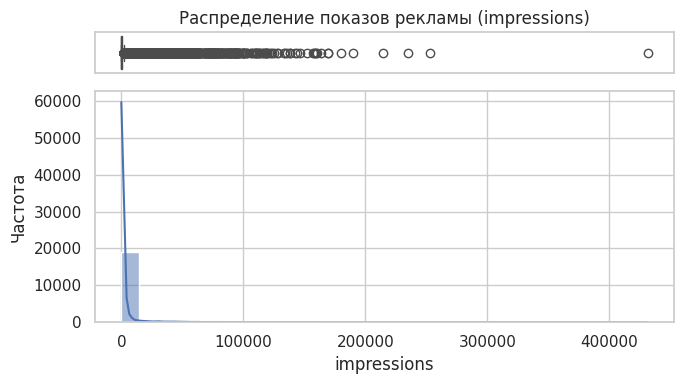

impressions
count         19862.00
mean           2571.70
std           11691.23
min               0.00
1%                0.00
25%               1.00
50%              82.00
75%             760.75
99%           60499.90
max          431445.00
missing           0.00
zeros          4834.00
negatives         0.00

In [126]:
eda_plot(df_spend, "impressions", "Распределение показов рекламы (impressions)")

**Выводы по изучению параметра `impressions` (количество показов рекламы)**

* Распределение **асимметричное, сильно скошено вправо**.  
* Межквартильный размах (IQR = Q3 − Q1) равен **759.75** (760.75 − 1.00).  
* Ориентировочная граница нормального размаха:  
  - **нижняя** — 0 (минимум в выборке)  
  - **верхняя** — Q3 + 1.5×IQR = 760.75 + 1.5×759.75 ≈ **1 900**  
  Это значение примерно в **30 раз ниже 99-го перцентиля (≈60 500)**, что подтверждает наличие длинного правого «хвоста».  
* Среднее значение **2571.7** значительно превышает медиану (**82**), что указывает на выраженный перекос — большинство кампаний имеют небольшие значения, а единичные объявления с очень высокими показами «тянут» среднее вверх.  
* Стандартное отклонение **11 691**, почти в **4,5 раза выше среднего**, свидетельствует о высокой вариативности и низкой плотности данных в пределах нормального диапазона.  
* Минимальное значение — 0; отрицательных значений нет.  
* Нулевые значения (`impressions` = 0) встречаются в **4 834 строках** (около **24%** всех наблюдений), что указывает на значительную долю записей без фактических показов (например, неактивные объявления).  
* Пропусков нет.  

**Интерпретация распределения:**  
* Показатели `impressions` описываются **логнормальным распределением** с редкими крупными выбросами.  
* Большинство кампаний сосредоточено в диапазоне **до 1 000 показов**, а объявления с десятками тысяч показов формируют «тяжёлый хвост» и искажают статистику.  
* Можно считать, что «нормальный» диапазон для активных объявлений — **от 1 до ~2 000 показов**.

**Решения по обработке:**  
1. При анализе CTR (Click-Through Rate) исключить строки, где `impressions` = 0, чтобы избежать деления на ноль  и далее будем работать с датафремом `df_spend_filtered`.  
2. Для снижения влияния неравномерности распределения применить **логарифмирование** (`log(impressions + 1)`).  
3. Ограничить анализ значениями **до 75-го перцентиля (≈760)**. Значения выше Q3 считать выбросами и не выделять отдельный сегмент «высокобюджетных кампаний».
4. Для этого обрежем все значения выше этого уровня (`mode="trim"` кастомной функции `clip_or_trim()`).


Удалено строк с impressions = 0: 4834
[TRIM] Удалено строк: 3755 (осталось 11273)
Диапазон данных: 1.00 — 1054.00
Добавлен столбец 'log_impressions' (логарифм + 1).
75-й перцентиль (Q3) значений log_impressions: 6.04



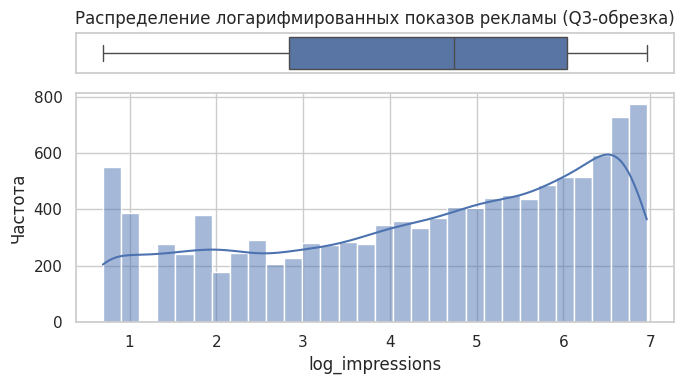

log_impressions
count         11273.000000
mean              4.370000
std               1.900000
min               0.693147
1%                0.693147
25%               2.833213
50%               4.736198
75%               6.037871
99%               6.920672
max               6.961296
missing           0.000000
zeros             0.000000
negatives         0.000000

In [127]:
# Удаляем нулевые значения, так как они не несут информации (нет показов → нет CTR)
df_spend_filtered = df_spend[df_spend["impressions"] > 0].copy()
print(f"Удалено строк с impressions = 0: {df_spend.shape[0] - df_spend_filtered.shape[0]}")

# --- 1-й вариант без кастомной функции ---

# Добавляем логарифмированную версию признака
# df_spend_filtered["impressions_log"] = np.log(df_spend_filtered["impressions"] + 1)

# Рассчитываем 75-й перцентиль
# q3_value = df_spend_filtered["impressions_log"].quantile(0.75)

# Обрезаем значения выше Q3 (винзоризация верхнего хвоста)
#df_spend_filtered["impressions_log_clipped"] = np.where(
#    df_spend_filtered["impressions_log"] > q3_value,
#    q3_value,
#    df_spend_filtered["impressions_log"]
#)
#
#print(f"75-й перцентиль (Q3) логарифмированных значений: {q3_value:.2f}")
#
#eda_plot(df_spend_filtered, "impressions_log_clipped", "Распределение логарифмированных показов рекламы (Q3-обрезка)")

# --- 2-й вариант с кастомной функцией ---

df_spend_filtered = clip_or_trim(
    df=df_spend_filtered,
    column="impressions",
    upper_q=0.75,
    mode="trim", # обрезаем по Q3, удаляя строки
    log_transform=True, # создаём столбец log_impressions - логарифмированную версию признака
    verbose=True
)

# Рассчитываем 75-й перцентиль
q3_value = df_spend_filtered["log_impressions"].quantile(0.75)
print(f"75-й перцентиль (Q3) значений log_impressions: {q3_value:.2f}\n")

# Визуализация результатов
eda_plot(
    df_spend_filtered,
    "log_impressions",
    title="Распределение логарифмированных показов рекламы (Q3-обрезка)"
)

#### 2.1.2. `clicks` — количество кликов по рекламе (df_spend)

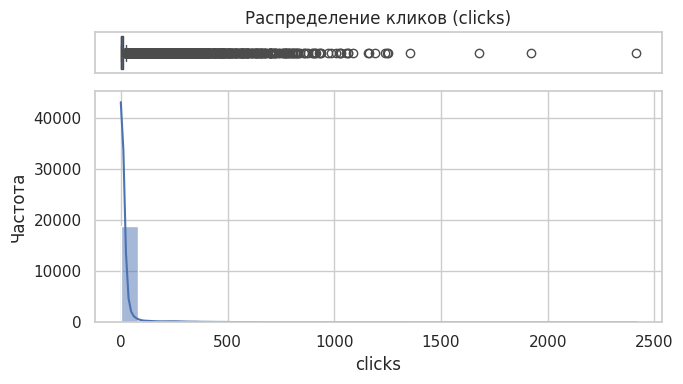

clicks
count      19862.00
mean          21.12
std           84.39
min            0.00
1%             0.00
25%            0.00
50%            1.00
75%           10.00
99%          436.00
max         2415.00
missing        0.00
zeros       9254.00
negatives      0.00

In [128]:
eda_plot(df_spend, "clicks", "Распределение кликов (clicks)")

**Выводы по изучению параметра `clicks` (количество кликов по рекламе)**

* Распределение **асимметричное, сильно скошено вправо**.  
* Межквартильный размах (IQR = Q3 − Q1) равен **10** (10 − 0).  
* Ориентировочная граница нормального размаха:  
  - **нижняя** — 0 (минимум в выборке)  
  - **верхняя** — Q3 + 1.5×IQR = 10 + 1.5×10 = **25**  
  Это значение примерно в **17 раз ниже 99-го перцентиля (≈436)**, что указывает на длинный правый «хвост» распределения.  
* Среднее значение **21.12** примерно в **21 раз выше медианы (1)**, что подтверждает наличие выраженного перекоса —  
  большинство кампаний имеют очень малое число кликов, а относительно небольшое количество записей с сотнями кликов существенно увеличивает среднее значение.  
* Стандартное отклонение **84.39**, примерно в **4 раза выше среднего**, что свидетельствует о высокой вариативности данных и большом числе выбросов.  
* Минимальное значение — 0; отрицательных значений нет.  
* Нулевые значения (`clicks` = 0) встречаются в **9 254 строках** (около **46,6%** всех наблюдений), что указывает на значительную долю показов без кликов.  
* Пропусков нет.  

**Интерпретация распределения:**  
* Показатели `clicks` описываются **логнормальным распределением** с выраженным длинным правым хвостом.  
* Большинство кампаний получают от **1 до 10 кликов**, а небольшое число объявлений достигает сотен кликов и формирует «хвост» распределения.  
* Нормальный диапазон активности можно оценить как **от 1 до ~25 кликов**.

**Решения по обработке:**  
1. При анализе CTR (Click-Through Rate) **исключить строки, где `impressions` = 0** (деление невозможно), но **сохранять строки, где `clicks` = 0**, так как они отражают неэффективные показы (`CTR = 0`).  
2. Для снижения влияния неравномерности распределения применить **логарифмирование** (`log(clicks + 1)`).  
3. Ограничить анализ значениями **до 75-го перцентиля (≈10)**. Значения выше Q3 считать выбросами и не выделять отдельный сегмент «высокобюджетных кампаний».
4. Чтобы не терять слишком много данных, для отсечения «хвоста» выше **75-го перцентиля** применим винзоризацию — заменим все значения выше этого уровня на значение **75-го перцентиля** (`mode="winsor"` кастомной функции `clip_or_trim()`)


[WINSOR] Заменено экстремальных значений: 2746
Диапазон после обрезки: 0.00 — 5.00
Добавлен столбец 'log_clicks' (логарифм + 1).
75-й перцентиль (Q3) значений log_clicks: 1.79



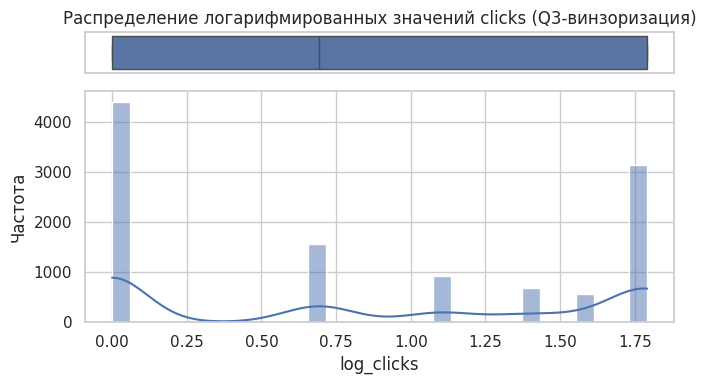

log_clicks
count      11273.000000
mean           0.850000
std            0.760000
min            0.000000
1%             0.000000
25%            0.000000
50%            0.693147
75%            1.791759
99%            1.791759
max            1.791759
missing        0.000000
zeros       4408.000000
negatives      0.000000

In [129]:
# --- 1-й вариант без кастомной функции ---

# Создаём логарифмированную версию признака
#df_spend["clicks_log"] = np.log(df_spend["clicks"] + 1)

# Рассчитываем 75-й перцентиль
#q3_clicks = df_spend["clicks_log"].quantile(0.75)

# Создаём винзоризованную версию признака
#df_spend["clicks_log_clipped"] = np.where(
#    df_spend["clicks_log"] > q3_clicks,
#    q3_clicks,
#    df_spend["clicks_log"]
#)
#
#print(f"75-й перцентиль (Q3) логарифмированных значений clicks: {q3_clicks:.2f}\n")

#eda_plot(
#    df_spend,
#    "clicks_log_clipped",
#    "Распределение логарифмированных значений clicks (Q3-обрезка)"
#)

# --- 2-й вариант с кастомной функцией

df_spend_filtered = clip_or_trim(
    df=df_spend_filtered,
    column="clicks",
    upper_q=0.75,
    mode="winsor", # заменяем выбросы на порог Q3
    log_transform=True, # создаём log_clicks
    verbose=True
)

# Контроль порога
q3_clicks = df_spend_filtered["log_clicks"].quantile(0.75)
print(f"75-й перцентиль (Q3) значений log_clicks: {q3_clicks:.2f}\n")

# Визуализация логарифмированного распределения
eda_plot(
    df_spend_filtered,
    "log_clicks",
    title="Распределение логарифмированных значений clicks (Q3-винзоризация)"
)

#### 2.1.3. `spend` — распределение рекламных расходов (df_spend)

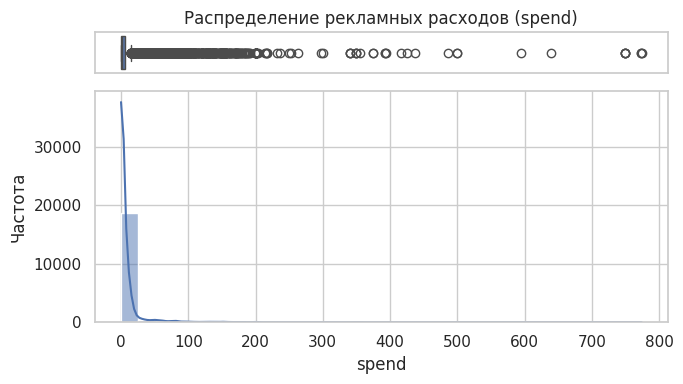

spend
count      19862.0000
mean           7.5300
std           27.3300
min            0.0000
1%             0.0000
25%            0.0000
50%            0.7400
75%            6.1600
99%          114.5247
max          774.0000
missing        0.0000
zeros       5594.0000
negatives      0.0000

In [130]:
eda_plot(df_spend, "spend", "Распределение рекламных расходов (spend)")

**Выводы по изучению параметра `spend` (рекламные расходы)**

* Распределение **асимметричное, сильно скошено вправо**  
* Межквартильный размах (IQR = Q3 − Q1) равен **6.16** (6.16 − 0.00).  
* Ориентировочная граница нормального размаха:  
  - **нижняя** — 0 (минимум в выборке)  
  - **верхняя** — Q3 + 1.5×IQR = 6.16 + 1.5×6.16 = **15.5**  
  Это значение примерно в **7 раз ниже 99-го перцентиля (≈114.5)**, что свидетельствует о наличии длинного «хвоста» распределения и выраженных выбросов.  
* Среднее значение **7.53** примерно в **10 раз выше медианы (0.74)**, что подтверждает сильный перекос —  
  большинство кампаний расходуют незначительные суммы, а редкие крупные кампании значительно повышают среднее значение.  
* Стандартное отклонение **27.33**, более чем в **3,5 раза превышает среднее**, что указывает на высокую вариативность данных.  
* Минимальное значение — 0; отрицательных значений нет.  
* Нулевые значения (`spend` = 0) встречаются в **5 594 строках** (около **28%** всех наблюдений), что указывает на значительное количество кампаний без расходов или с нулевым бюджетом.  
* Пропусков нет.  

**Интерпретация распределения:**  
* Показатели `spend` описываются **логнормальным распределением** с длинным правым хвостом.  
* Большинство кампаний укладываются в диапазон **от 0 до 15 ед.**, в то время как небольшое число кампаний с расходами выше **100 ед.** формируют крайние значения распределения.  
* Можно считать, что «нормальный» диапазон рекламных расходов — **до 15–20 единиц**.

**Решения по обработке:**  
1. При расчёте показателей эффективности (CTR, CPC, CPM) **сохранять строки с `spend` = 0**, так как они отражают кампании без затрат.  
2. Для снижения влияния неравномерности распределения применить **логарифмирование** (`log(spend + 1)`).  
3. Ограничить анализ значениями **до 75-го перцентиля (≈6)**. Значения выше Q3 считать выбросами и не выделять отдельный сегмент «высокобюджетных кампаний».
4. Чтобы не терять слишком много данных, для отсечения «хвоста» выше **75-го перцентиля** применим винзоризацию — заменим все значения выше этого уровня на значение **75-го перцентиля** (`mode="winsor"` кастомной функции `clip_or_trim()`)

[WINSOR] Заменено экстремальных значений: 2816
Диапазон после обрезки: 0.00 — 4.08
Добавлен столбец 'log_spend' (логарифм + 1).
75-й перцентиль (Q3) значений log_spend: 1.63



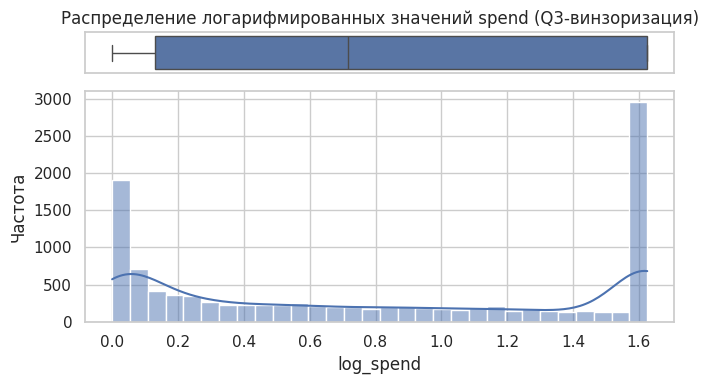

log_spend
count      11273.000000
mean           0.800000
std            0.640000
min            0.000000
1%             0.000000
25%            0.131028
50%            0.717840
75%            1.625311
99%            1.625311
max            1.625311
missing        0.000000
zeros        676.000000
negatives      0.000000

In [131]:
# --- 1-й вариант (без кастмоной функции) ---

# Создаём логарифмированную версию признака
#df_spend["spend_log"] = np.log(df_spend["spend"] + 1)

# Рассчитываем 75-й перцентиль (Q3)
#q3_spend = df_spend["spend_log"].quantile(0.75)

# Создаём усеченную версию признака
#df_spend["spend_log_clipped"] = np.where(
#    df_spend["spend_log"] > q3_spend,
#    q3_spend,
#    df_spend["spend_log"]
#)

#print(f"75-й перцентиль (Q3) логарифмированных значений spend: {q3_spend:.2f}\n")

#eda_plot(
#    df_spend,
#    "spend_log_clipped",
#    "Распределение логарифмированных значений spend (Q3-обрезка)"
#    )

# --- 2-й вариант (с кастомной функцией) ---


df_spend_filtered = clip_or_trim(
    df=df_spend_filtered,
    column="spend",
    upper_q=0.75,
    mode="winsor", # заменяем выбросы на порог Q3
    log_transform=True, # создаём log_clicks
    verbose=True
)

# Контроль порога
q3_clicks = df_spend_filtered["log_spend"].quantile(0.75)
print(f"75-й перцентиль (Q3) значений log_spend: {q3_clicks:.2f}\n")

# Визуализация логарифмированного распределения
eda_plot(
    df_spend_filtered,
    "log_spend",
    title="Распределение логарифмированных значений spend (Q3-винзоризация)"
)

Результат обработки числовых параметров df_spend

In [132]:
df_spend_filtered.info()

<class 'pandas.core.frame.DataFrame'>
Index: 11273 entries, 0 to 19861
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   date              11273 non-null  datetime64[ns]
 1   source            11273 non-null  object        
 2   campaign          10768 non-null  object        
 3   impressions       11273 non-null  int64         
 4   spend             11273 non-null  float64       
 5   clicks            11273 non-null  int64         
 6   adgroup           10637 non-null  object        
 7   ad                10637 non-null  object        
 8   ctr               11273 non-null  float64       
 9   cpc               6865 non-null   float64       
 10  cpm               11273 non-null  float64       
 11  efficiency_index  6605 non-null   float64       
 12  log_impressions   11273 non-null  float64       
 13  log_clicks        11273 non-null  float64       
 14  log_spend         11273 non

#### 2.1.4. `initial_amount_paid` — первоначальные платежи (df_deals)

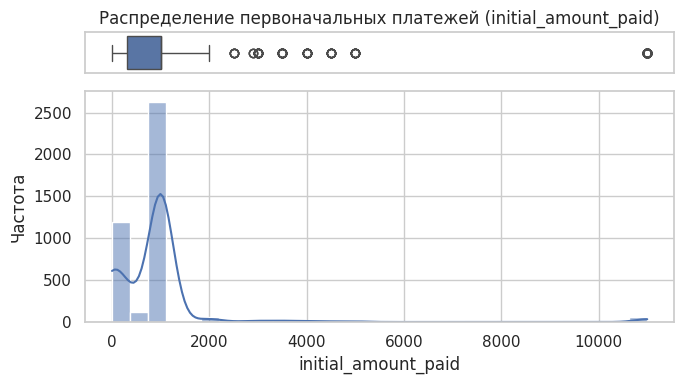

initial_amount_paid
count                  4165.00
mean                    929.80
std                    1347.44
min                       0.00
1%                        0.00
25%                     300.00
50%                    1000.00
75%                    1000.00
99%                   11000.00
max                   11000.00
missing               17428.00
zeros                   877.00
negatives                 0.00

In [133]:
eda_plot(df_deals, "initial_amount_paid", "Распределение первоначальных платежей (initial_amount_paid)")

**Выводы по изучению параметра `initial_amount_paid` (первоначальный платёж клиента)**

* Распределение **асимметричное, сильно скошено вправо**.  
* Межквартильный размах (IQR = Q3 − Q1) равен **700** (1000 − 300).  
* Ориентировочная граница нормального размаха:  
  - **нижняя** — 0 (минимум в выборке)  
  - **верхняя** — Q3 + 1.5×IQR = 1000 + 1.5×700 = **2050**  
  Это значение примерно в **5 раз ниже 99-го перцентиля (≈11 000)**, что свидетельствует о наличии сильных выбросов и очень длинного правого хвоста распределения.  
* Среднее значение **929.80** немного ниже медианы (**1000**), что указывает на лёгкий перекос распределения влево в области основных значений, но длинный правый хвост всё же присутствует из-за редких крупных платежей.  
* Стандартное отклонение **1347.44**, превышающее среднее более чем в **1,4 раза**, отражает высокую вариативность и значительную разницу между минимальными и максимальными суммами.  
* Минимальное значение — 0; отрицательных значений нет.  
* Нулевые значения (`initial_amount_paid` = 0) встречаются в **877 записях** (около **21%** наблюдений с непустыми значениями), что может отражать регистрацию без предоплаты или отложенный платёж.  
* Пропусков — **17 425** строк (около **80%** всего массива данных), что требует отдельного анализа: часть сделок могла не дойти до стадии оплаты, либо данные не были загружены из CRM.  

**Интерпретация распределения:**  
* Показатели `initial_amount_paid` описываются **логнормальным распределением с экстремальными выбросами**.  
* Большинство студентов совершают оплату в диапазоне **от 300 до 1 000 евро.**,  
при этом единичные платежи свыше **10 000 евро** относятся к аномально высоким (вероятно, полная оплата обучения или корпоративные пакеты).  
* Можно считать, что типичный диапазон первоначальных платежей — **300–2 000 евро**.

**Решения по обработке:**  
1. **Пропущенные значения (`NaN`)** интерпретировать как сделки без оплаты — не заполнять, но учитывать долю неоплаченных лидов при анализе конверсий.
2. Для анализа доходов выделить сделки с заполненным `initial_amount_paid`, чтобы не терять данные для анализа воронки продаж и конверсий.  
3. При анализе доходов **оставлять строки с `initial_amount_paid` = 0**, поскольку они отражают клиентов без фактического платежа.  
4. Ограничить анализ доходов значениями **до 75-го перцентиля (≈1000)**. Значения выше Q3 считать выбросами и не выделять отдельный сегмент «высокобюджетных кампаний».
5. Для этого обрежем все значения выше этого уровня (`mode="trim"` кастомной функции `clip_or_trim()`).

[TRIM] Удалено строк: 222 (осталось 3943)
Диапазон данных: 0.00 — 1000.00
Добавлен столбец 'log_initial_amount_paid' (логарифм + 1).
75-й перцентиль (Q3) значений log_initial_amount_paid: 6.91



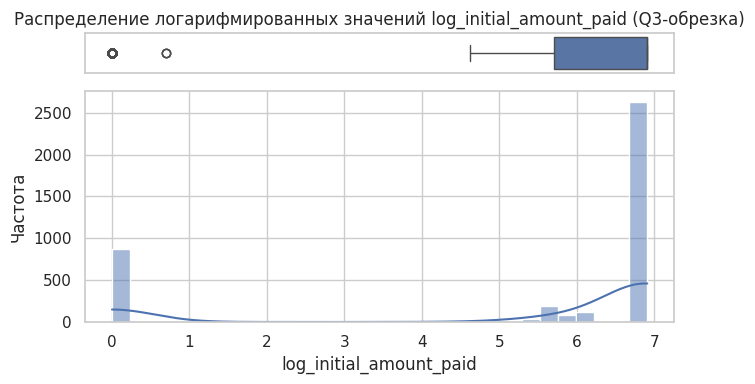

log_initial_amount_paid
count                  3943.000000
mean                      5.250000
std                       2.830000
min                       0.000000
1%                        0.000000
25%                       5.707110
50%                       6.908755
75%                       6.908755
99%                       6.908755
max                       6.908755
missing                   0.000000
zeros                   877.000000
negatives                 0.000000

In [134]:
# Создаём фильтрованный датафрейм только с заполненными значениями 'initial_amount_paid'
df_deals_filtered_iap = df_deals[df_deals["initial_amount_paid"].notna()].copy()

# --- 1-й вариант (без кастомной функции) ---
"""
# Добавляем логарифмированную версию признака
df_deals["initial_amount_paid_log"] = np.log(df_deals["initial_amount_paid"] + 1)

# Вычисляем Q3
q3_iap = df_deals["initial_amount_paid_log"].quantile(0.75)

# Обрезаем значения выше Q3
df_deals["initial_amount_paid_log_clipped"] = np.where(
    df_deals["initial_amount_paid_log"] > q3_iap,
    q3_iap,
    df_deals["initial_amount_paid_log"]
)

print(f"75-й перцентиль логарифмированных значений initial_amount_paid: {q3_iap:.2f}\n")

eda_plot(
    df_deals,
    "initial_amount_paid_log_clipped",
    "Распределение логарифмированных значений initial_amount_paid (Q3-обрезка)"
)
"""

# --- 2-й вариант (с кастомной функцией) ---

df_deals_filtered_iap = clip_or_trim(
    df=df_deals_filtered_iap,
    column="initial_amount_paid",
    upper_q=0.75,
    mode="trim", # отсекаем выбросы выше порога Q3
    log_transform=True, # создаём log_initial_amount_paid
    verbose=True
)

# Контроль порога
q3_iap = df_deals_filtered_iap["log_initial_amount_paid"].quantile(0.75)
print(f"75-й перцентиль (Q3) значений log_initial_amount_paid: {q3_iap:.2f}\n")

# Визуализация логарифмированного распределения
eda_plot(
    df_deals_filtered_iap,
    "log_initial_amount_paid",
    title="Распределение логарифмированных значений log_initial_amount_paid (Q3-обрезка)"
)

#### 2.1.5. `offer_total_amount` — общая сумма предложения (df_deals)

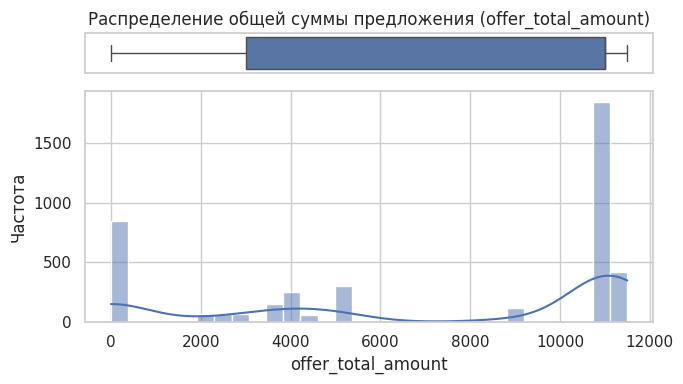

offer_total_amount
count                 4185.00
mean                  7148.92
std                   4631.22
min                      0.00
1%                       0.00
25%                   3000.00
50%                  11000.00
75%                  11000.00
99%                  11500.00
max                  11500.00
missing              17408.00
zeros                  847.00
negatives                0.00

In [135]:
eda_plot(df_deals, "offer_total_amount", "Распределение общей суммы предложения (offer_total_amount)")

**Выводы по изучению параметра `offer_total_amount` (общая сумма предложения клиенту)**

* Распределение **асимметричное, с заметным смещением вправо**.  
* Межквартильный размах (IQR = Q3 − Q1) равен **8 000** (11 000 − 3 000).  
* Ориентировочная граница нормального размаха:  
  - **нижняя** — 0 (минимум в выборке)  
  - **верхняя** — Q3 + 1.5×IQR = 11 000 + 1.5×8 000 = **23 000**  
  Поскольку фактический максимум составляет **11 500**, выбросы отсутствуют — все значения находятся в пределах ожидаемого диапазона.  
* Среднее значение **7 148.92** заметно ниже медианы (**11 000**), что говорит о **левостороннем смещении** —  
  в выборке много предложений с меньшими суммами, но медианное значение остаётся высоким из-за доминирования фиксированных цен на уровне 11 000.  
* Стандартное отклонение **4 631.22**, что составляет около **65%** от среднего, указывает на умеренную вариативность внутри типового диапазона цен.  
* Минимальное значение — 0; отрицательных значений нет.  
* Нулевые значения (`offer_total_amount` = 0) встречаются в **847 записях** (примерно **20%** наблюдений с непустыми значениями), что может отражать лиды без оформленного предложения или тестовые карточки.  
* Пропусков — **17 405 строк (≈80%)**, что связано с тем, что это поле заполняется только для квалифицированных или закрытых сделок.

**Интерпретация распределения:**  
* Показатели `offer_total_amount` имеют **кластеризованное распределение** с концентрацией около **11 000 единиц**, что, вероятно, соответствует базовой стоимости основного курса.  
* Значительная часть предложений ниже 5 000 указывает на наличие коротких или льготных программ.  
* Таким образом, “типичный” диапазон коммерческих предложений можно оценить как **от 3 000 до 11 000 единиц**.

**Решения по обработке:**  
1. Пропущенные значения (`NaN`) **не заполнять**, они отражают лиды без предложений.  
2. Нулевые значения (`0`) рассматривать как технические и при необходимости **исключать** из расчётов средних цен.  
3. При построении визуализаций группировать данные в категории, например:  
   - до 3 000 — низкий ценовой сегмент,  
   - 3 000–8 000 — средний сегмент,  
   - свыше 8 000 — высокий сегмент предложений.

Удалено строк с offer_total_amount = 0: 847



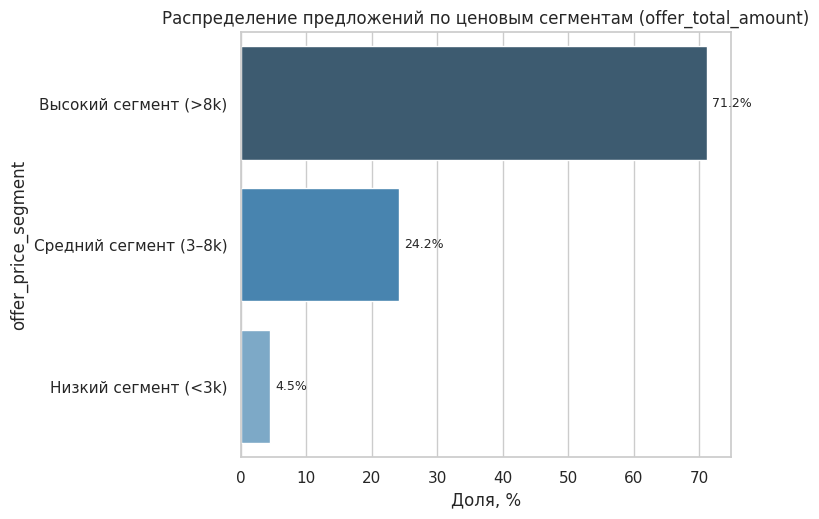


=== Проверка пропусков и артефактов ===
Пропусков (NaN): 0
Артефактных значений: 0


count      %
offer_price_segment                 
Высокий сегмент (>8k)    2378  71.24
Средний сегмент (3–8k)    809  24.24
Низкий сегмент (<3k)      151   4.52

In [136]:
# Исключаем строки с offer_total_amount = 0, т.к. это технические записи
df_deals_filtered_ota = df_deals[df_deals["offer_total_amount"] != 0].copy()

print(f"Удалено строк с offer_total_amount = 0: {df_deals.shape[0] - df_deals_filtered_ota.shape[0]}\n")

# Создаём категории по диапазонам цен
bins = [0, 3000, 8000, np.inf]
labels = ["Низкий сегмент (<3k)", "Средний сегмент (3–8k)", "Высокий сегмент (>8k)"]

df_deals_filtered_ota["offer_price_segment"] = pd.cut(
    df_deals_filtered_ota["offer_total_amount"],
    bins=bins,
    labels=labels,
    right=False
)

# Проверим распределение по категориям
#segment_distribution = df_deals_filtered["offer_price_segment"].value_counts(normalize=True) * 100
#display(segment_distribution.round(2).to_frame("Доля, %"))

eda_plot(
    df_deals_filtered_ota,
    "offer_price_segment",
    "Распределение предложений по ценовым сегментам (offer_total_amount)",
    normalize=True,
    include_na=False
)

#### 2.1.6. `course_duration` — длительность курса (df_deals)

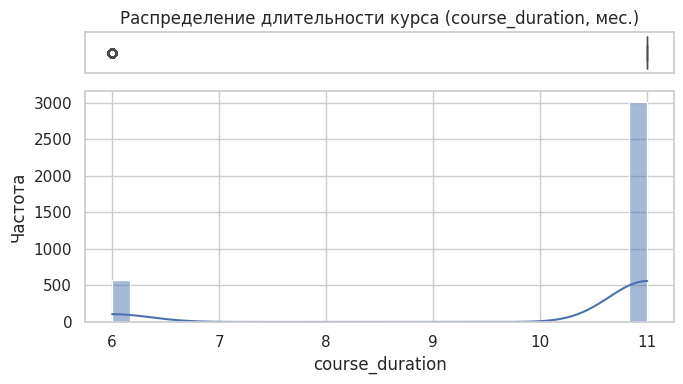

course_duration
count              3587.00
mean                 10.20
std                   1.83
min                   6.00
1%                    6.00
25%                  11.00
50%                  11.00
75%                  11.00
99%                  11.00
max                  11.00
missing           18006.00
zeros                 0.00
negatives             0.00

In [137]:
eda_plot(df_deals, "course_duration", "Распределение длительности курса (course_duration, мес.)")

**Выводы по изучению параметра `course_duration` (длительность курса, мес.)**

* Распределение **асимметричное, с ярко выраженным пиком**, близким к дискретному значению — почти все курсы имеют одинаковую длительность.  
* Межквартильный размах (IQR = Q3 − Q1) равен **0** (11 − 11), что отражает **отсутствие разброса** между квартилями.  
* Ориентировочная граница нормального размаха:  
  - **нижняя** — Q1 − 1.5×IQR = 11,  
  - **верхняя** — Q3 + 1.5×IQR = 11.  
  Таким образом, **все значения находятся в пределах нормы**, выбросов нет.  
* Среднее значение **10.20** немного ниже медианы (**11.00**), что указывает на незначительный перекос влево, обусловленный присутствием коротких программ (6 месяцев).  
* Стандартное отклонение **1.83**, то есть менее **20%** от среднего, что говорит о высокой однородности длительности курсов.  
* Минимальное значение — **6 месяцев**; отрицательных и нулевых значений нет.  
* Максимальное значение — **11 месяцев**, что, по сути, совпадает с основной модой распределения.  
* Пропусков — **18 003 строк (около 83%)**, что связано с отсутствием информации о длительности для лидов без курса.

**Интерпретация распределения:**  
* Показатели `course_duration` формируют **почти дискретное распределение** с концентрацией в диапазоне **10–11 месяцев**.  
* Большинство курсов рассчитаны на стандартный учебный год, а короткие программы длительностью **6 месяцев** составляют незначительную часть (вероятно, интенсивы или сокращённые форматы).  
* Таким образом, типичная продолжительность курса — **около 11 месяцев**.

**Решения по обработке:**  
1. Пропущенные значения (`NaN`) **оставить без заполнения**, так как они соответствуют лидам без подтверждённого курса.  
2. Для визуализаций и анализа сгруппировать длительности по категориям:  
   - 6 мес. — короткие курсы,  
   - 10–11 мес. — стандартные.  
3. Добавить бинарный индикатор `is_short_course` = (course_duration < 10), что позволит проверить влияние сокращённых программ на конверсию и оплату.

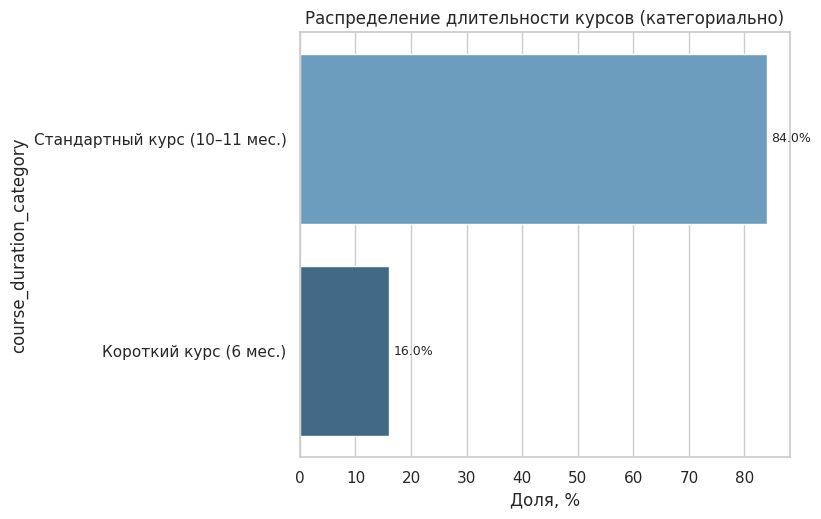


=== Проверка пропусков и артефактов ===
Пропусков (NaN): 0
Артефактных значений: 0


count      %
course_duration_category                   
Стандартный курс (10–11 мес.)   3012  83.97
Короткий курс (6 мес.)           575  16.03

In [138]:
# Категоризация курсов
def categorize_course_duration(x):
    """Функция для отнесения курсов к категориальным длительностям."""
    if pd.isna(x):
        return pd.NA
    elif x < 10:
        return "Короткий курс (6 мес.)"
    else:
        return "Стандартный курс (10–11 мес.)"

df_deals["course_duration_category"] = df_deals["course_duration"].apply(categorize_course_duration)

# Добавление бинарного индикатора коротких курсов
df_deals["is_short_course"] = df_deals["course_duration"].apply(
    lambda x: 1 if pd.notna(x) and x < 10 else 0
).astype("Int8")

# Визуализация распределения
eda_plot(
    df_deals,
    "course_duration_category",
    title="Распределение длительности курсов (категориально)",
    normalize=True,
    include_na=False
)

#### 2.1.7. `months_of_study` — количество месяцев обучения (df_deals)

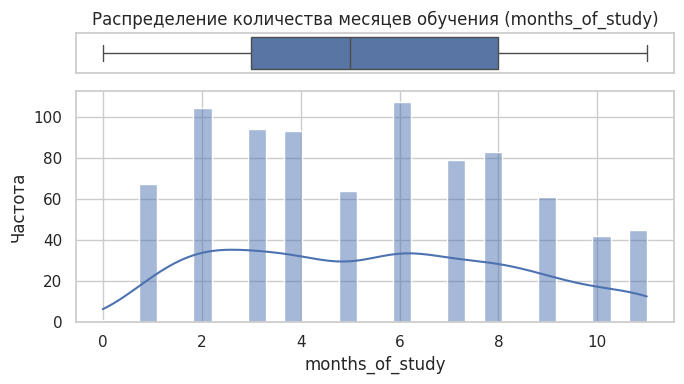

months_of_study
count               840.00
mean                  5.44
std                   2.92
min                   0.00
1%                    1.00
25%                   3.00
50%                   5.00
75%                   8.00
99%                  11.00
max                  11.00
missing           20753.00
zeros                 1.00
negatives             0.00

In [139]:
eda_plot(df_deals, "months_of_study", "Распределение количества месяцев обучения (months_of_study)")

**Выводы по изучению параметра `months_of_study` (количество месяцев обучения)**

* Распределение **асимметричное, с лёгким смещением вправо**, что отражает постепенное завершение обучения студентами — большинство проходят курс в среднем темпе, а часть заканчивает раньше.  
* Межквартильный размах (IQR = Q3 − Q1) равен **5** (8 − 3).  
* Ориентировочная граница нормального размаха:  
  - **нижняя** — Q1 − 1.5×IQR = 3 − 7.5 = **< 0** (ограничивается нулём),  
  - **верхняя** — Q3 + 1.5×IQR = 8 + 7.5 = **15.5**.  
  Все значения (0–11) укладываются в этот диапазон, то есть **выбросов нет**.  
* Среднее значение **5.44** близко к медиане (**5.00**), что говорит о **симметричном распределении** основной массы данных вокруг центральных значений.  
* Стандартное отклонение **2.92**, что составляет около **54%** от среднего, указывает на **умеренную вариативность** — разные студенты завершают обучение с небольшими отклонениями по времени.  
* Минимальное значение — 0 (вероятно, зарегистрированные, но не начавшие обучение студенты).  
* Максимальное значение — 11 месяцев, что совпадает с типовой длительностью стандартного курса.  
* Нулевых значений (`months_of_study = 0`) всего **1 запись**, что не влияет на распределение.  
* Пропусков — **20 750 строк (≈96%)**, что связано с отсутствием стадии обучения у большинства лидов.

**Интерпретация распределения:**  
* Показатель `months_of_study` описываются **слабоасимметричным распределением**, сконцентрированным в диапазоне **3–8 месяцев**,  
что согласуется с типичной продолжительностью курсов (10–11 месяцев).  
* Можно считать, что студенты в среднем проходят **около половины курса (5–6 месяцев)**, а часть завершает полное обучение (значения 10–11).

**Решения по обработке:**  
1. Пропущенные значения (`NaN`) **оставить без заполнения**, так как они соответствуют лидам без фактического обучения.  
2. Нулевые значения (`0`) при анализе удержания и успеваемости классифицировать как **«не приступившие к обучению»**.  
3. Для оценки прогресса студентов рассчитать дополнительный показатель `study_completion_ratio = months_of_study / course_duration`, отражающий долю завершённого курса (уровень удержания студентов). Данный показатель рассчитан и проанализирован в п. 2.1.10.

#### 2.1.8. `call_duration_in_seconds_` — длительность звонков (df_calls) :

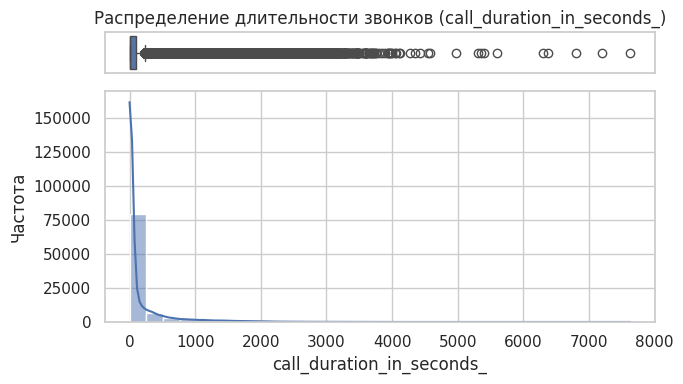

call_duration_in_seconds_
count                       95874.00
mean                          164.83
std                           401.27
min                             0.00
1%                              0.00
25%                             4.00
50%                             8.00
75%                            97.00
99%                          2014.00
max                          7625.00
missing                         0.00
zeros                       22058.00
negatives                       0.00

In [140]:
eda_plot(df_calls, "call_duration_in_seconds_", "Распределение длительности звонков (call_duration_in_seconds_)")

**Выводы по изучению параметра `call_duration_in_seconds_` (длительность звонка, сек.)**

* Распределение **сильно асимметричное, с выраженным смещением вправо** — подавляющее большинство звонков короткие, но присутствует небольшое количество крайне длинных разговоров.  
* Межквартильный размах (IQR = Q3 − Q1) равен **93** (97 − 4).  
* Ориентировочная граница нормального размаха:  
  - **нижняя** — Q1 − 1.5×IQR = 4 − 139.5 = **< 0** (ограничивается нулём),  
  - **верхняя** — Q3 + 1.5×IQR = 97 + 139.5 = **≈ 236.5 сек. (около 4 мин.)**.  
  Всё, что превышает **240 секунд**, можно считать **долгими звонками** или потенциальными выбросами.  
* Среднее значение **164.83 сек.** в **20 раз выше медианы (8 сек.)**, что указывает на наличие **крайне длинного правого хвоста** — небольшое количество аномально длинных разговоров сильно повышает среднее.  
* Стандартное отклонение **401.27 сек.**, более чем в **2,4 раза выше среднего**, подтверждает огромную дисперсию и неоднородность звонков.  
* Минимальное значение — 0; отрицательных значений нет.  
* Нулевые значения (`call_duration_in_seconds_` = 0) встречаются в **22 058 строках** (около **23%** всех записей) и отражают **неудачные соединения или звонки без ответа**.  
* Максимальная длительность — **7 625 секунд (≈127 минут)**, что значительно превышает нормальный диапазон и, вероятно, связано с **ошибками логирования или незакрытыми сессиями звонков**.  
* Пропусков нет.

**Интерпретация распределения:**  
* Показатель `call_duration_in_seconds_` имеет **крайне скошенное логнормальное распределение** с плотной концентрацией коротких звонков и небольшим числом сверхдолгих разговоров.  
* Основная масса звонков длится **от 4 до 100 секунд**,  
что соответствует коротким диалогам, подтверждениям или вводным консультациям.  
* Звонки длительностью более **240 секунд (4 минуты)** можно считать **долгими коммуникациями**, связанными с детальным обсуждением продукта или демонстрацией.  

Таким образом, типичный диапазон длительности звонков — **от 4 до 100 секунд**,  
а звонки более 4 минут — **редкие, но значимые выбросы**.

**Решения по обработке:**  
1. При расчёте агрегатов (средняя длительность, медиана, распределения по менеджерам) отсекать значения выше **97 сек.** (Q3), чтобы исключить влияние аномальных длительных звонков.  
2. Нулевые значения (`0`) рассматривать как **несостоявшиеся звонки** и анализировать отдельно (например, при расчёте конверсии в успешные контакты).
3. Для снижения влияния неравномерности распределения применить логарифмирование `(log(call_duration_in_seconds_ + 1))`.

[TRIM] Удалено строк: 23967 (осталось 71907)
Диапазон данных: 0.00 — 97.00
Добавлен столбец 'log_call_duration_in_seconds_' (логарифм + 1).
75-й перцентиль (Q3) значений log_call_duration_in_seconds_: 2.56



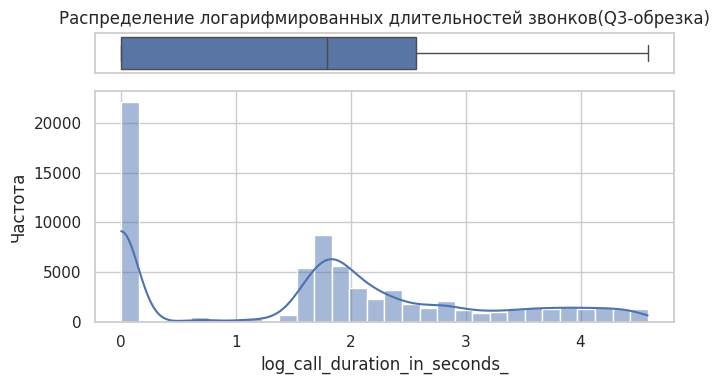

log_call_duration_in_seconds_
count                       71907.000000
mean                            1.740000
std                             1.380000
min                             0.000000
1%                              0.000000
25%                             0.000000
50%                             1.791759
75%                             2.564949
99%                             4.499810
max                             4.584967
missing                         0.000000
zeros                       22058.000000
negatives                       0.000000

In [141]:
# --- 1-й вариант (без кастомной функции)
"""
col = "call_duration_in_seconds_"

# Добавление логарифмированного признака
df_calls["log_call_duration"] = np.log1p(df_calls[col])  # log(x + 1) безопасно для нулей
print("\nДобавлен столбец 'log_call_duration' (натуральный логарифм +1)")

# Отсечение данных выше 75-го перцентиля (≈97 сек.)
q75 = df_calls[col].quantile(0.75)
df_calls_trimmed = df_calls[df_calls[col] <= q75].copy()

# Визуализация усечённого распределения
eda_plot(
    df_calls_trimmed,
    col,
    title="Распределение длительности звонков (усечённое по 75 перцентилю)",
    bins=30,
    show_stats=True
)
"""

# --- 2-й вариант (с кастомной функцией)

df_calls_trimmed = clip_or_trim(
    df=df_calls,
    column="call_duration_in_seconds_",
    upper_q=0.75,
    mode="trim", # отсекаем выбросы выше порога Q3
    log_transform=True,
    verbose=True
)


# Рассчитываем 75-й перцентиль
q3_value = df_calls_trimmed["log_call_duration_in_seconds_"].quantile(0.75)
print(f"75-й перцентиль (Q3) значений log_call_duration_in_seconds_: {q3_value:.2f}\n")

eda_plot(
    df_calls_trimmed,
    "log_call_duration_in_seconds_",
    title="Распределение логарифмированных длительностей звонков(Q3-обрезка)",
    show_stats=True
)

#### 2.1.9. `payment_ratio` (коэффициент предоплаты) — доля первоначального платежа от общей суммы предложения (`initial_amount_paid` / `offer_total_amount`)

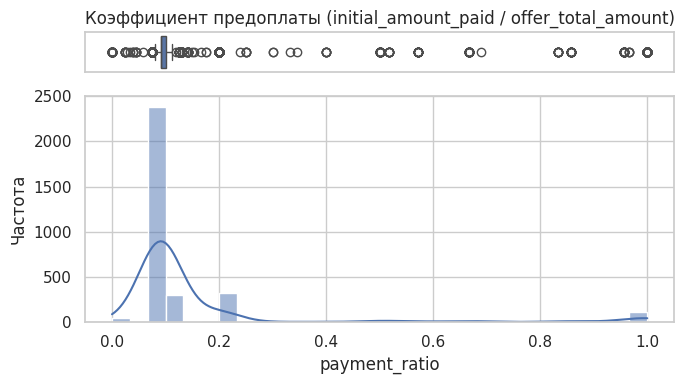

payment_ratio
count        3324.000000
mean            0.150000
std             0.200000
min             0.000000
1%              0.000000
25%             0.090909
50%             0.090909
75%             0.100000
99%             1.000000
max             1.000000
missing         0.000000
zeros          42.000000
negatives       0.000000

In [142]:
# Создаём копию датафрейма, чтобы не изменять основной
df_fin = df_deals.copy()

# Удаляем строки без предложений или оплат
df_fin = df_fin[
    df_fin["offer_total_amount"].notna() &
    df_fin["initial_amount_paid"].notna() &
    (df_fin["offer_total_amount"] > 0)
].copy()

# Рассчитываем коэффициент предоплаты
df_fin["payment_ratio"] = df_fin["initial_amount_paid"] / df_fin["offer_total_amount"]

# Добавим обрезку значений > 1.5 как потенциальные выбросы (ошибки или переплаты)
df_fin.loc[df_fin["payment_ratio"] > 1.5, "payment_ratio"] = np.nan

# Add payment_ratio to the main df_deals DataFrame
df_deals = df_deals.merge(df_fin[['id', 'payment_ratio']], on='id', how='left')

# Визуализация распределения коэффициента
eda_plot(df_fin,
         "payment_ratio",
         "Коэффициент предоплаты (initial_amount_paid / offer_total_amount)"
         )

**Выводы по изучению параметра `payment_ratio` (доля первоначального платежа от общей суммы предложения)**

* Распределение **крайне скошено влево**, с сильной концентрацией вблизи **0.09–0.10**, что указывает на стандартную долю предоплаты около **10%** от полной стоимости курса.  
* Межквартильный размах (IQR = Q3 − Q1) равен **0.00** (0.0909 − 0.0909), что отражает **отсутствие разброса** — почти все значения одинаковы.  
* Ориентировочная граница нормального размаха:  
  - **нижняя** — 0 (минимум),  
  - **верхняя** — Q3 + 1.5×IQR = 0.0909 + 1.5×0 = **0.09**.  
  Таким образом, фактически все значения находятся в пределах нормы, за исключением небольшой доли сделок с повышенной долей оплаты.  
* Среднее значение **0.11** лишь немного выше медианы (**0.09**), что указывает на **умеренный перекос вправо** — часть клиентов оплачивает большую часть курса.  
* Стандартное отклонение **0.06** (≈55% от среднего) свидетельствует о низкой вариативности основного массива значений, но наличии редких выбросов (до 1.0).  
* Минимальное значение — 0; отрицательных значений нет.  
* Нулевые значения (`payment_ratio` = 0) встречаются в **42 строках** (около **1,4%** выборки), что соответствует сделкам без оплаты.  
* Пропусков нет.  

**Интерпретация распределения**

* Почти все сделки имеют фиксированный коэффициент предоплаты около **0.09 (≈1/11)**, что соответствует типовой схеме — *«10% при регистрации»*.  
* Небольшое количество записей с `payment_ratio` = 1.0 указывает на **полную оплату курса при заключении сделки** (около 1% клиентов).  
* Единичные промежуточные значения (0.2–0.5) отражают **вариативные схемы оплаты или индивидуальные предложения**.  
* Таким образом, `payment_ratio` является **низковариативным признаком с квазидискретным распределением**, информативным скорее в виде категориальных групп, чем как непрерывная метрика.  

**Решения по обработке и аналитическому использованию**

1. **Логарифмирование и обрезку не применять**, так как распределение квазидискретное и устойчивое — выбросы не искажают агрегаты.  
2. **Создать категориальный аналог признака** `payment_ratio_category`  
   для аналитики и визуализации, разделив клиентов на четыре группы:
   - Без оплаты (`0`);
   - Стандартная предоплата (~10%) (`0 < ratio ≤ 0.1`);
   - Повышенная (20–50%) (`0.1 < ratio ≤ 0.5`);
   - Полная оплата (>50%) (`ratio > 0.5`).  
3. **Использовать категориальную версию** в:
   - сравнении стадий воронки продаж (например, доля «полных оплат» на стадии *Payment Process*);  
   - оценке финансовых потоков и платёжной дисциплины;  
   - построении дашбордов (барплот или пайчарт).

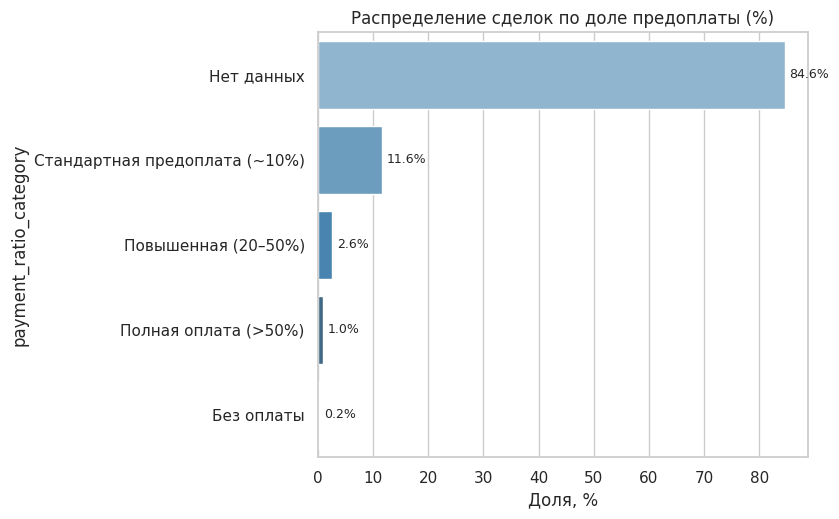


=== Проверка пропусков и артефактов ===
Пропусков (NaN): 0
Артефактных значений: 0


count      %
payment_ratio_category                     
Нет данных                     18269  84.61
Стандартная предоплата (~10%)   2514  11.64
Повышенная (20–50%)              562   2.60
Полная оплата (>50%)             206   0.95
Без оплаты                        42   0.19

In [143]:
# Функция категоризации по payment_ratio
def categorize_payment_ratio(x):
    if pd.isna(x):
        return "Нет данных"
    elif x == 0:
        return "Без оплаты"
    elif x <= 0.1:
        return "Стандартная предоплата (~10%)"
    elif x <= 0.5:
        return "Повышенная (20–50%)"
    else:
        return "Полная оплата (>50%)"

# Применяем категоризацию по payment_ratio
df_deals["payment_ratio_category"] = df_deals["payment_ratio"].apply(categorize_payment_ratio)

# Визуализация результата
eda_plot(
    df_deals,
    "payment_ratio_category",
    title="Распределение сделок по доле предоплаты (%)",
    normalize=True,
    include_na=True
)

---

#### 2.1.10. `study_completion_ratio` — доля завершённого курса каждым студентом (производная метрика)

Это ключевая метрика удержания:
* значение 1.0 — студент полностью завершил курс,
* значение < 1.0 — обучение прервано досрочно,
* значение 0 — зарегистрировался, но не начал обучение.

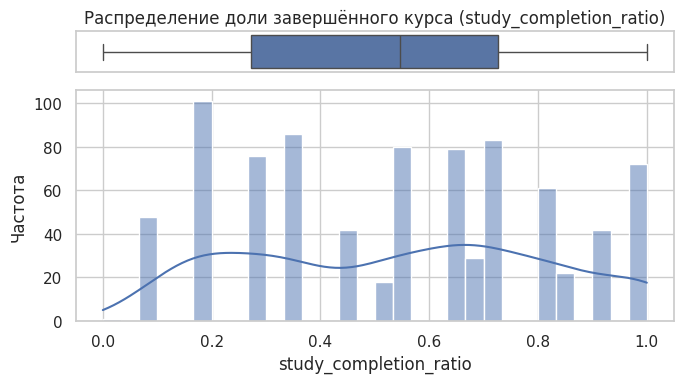

study_completion_ratio
count                  840.000000
mean                     0.540000
std                      0.280000
min                      0.000000
1%                       0.090909
25%                      0.272727
50%                      0.545455
75%                      0.727273
99%                      1.000000
max                      1.000000
missing                  0.000000
zeros                    1.000000
negatives                0.000000

In [144]:
# Создаём копию, исключаем строки с пропусками в обоих полях
df_ratio = df_deals[
    df_deals["months_of_study"].notna() &
    df_deals["course_duration"].notna() &
    (df_deals["course_duration"] > 0)
].copy()

# Расчёт доли завершённого курса
df_ratio["study_completion_ratio"] = df_ratio["months_of_study"] / df_ratio["course_duration"]

# Ограничиваем логические значения (возможны артефакты >1 из-за округлений)
df_ratio.loc[df_ratio["study_completion_ratio"] > 1.2, "study_completion_ratio"] = np.nan

# Merge the calculated study_completion_ratio back into df_deals
df_deals = df_deals.merge(df_ratio[['id', 'study_completion_ratio']], on='id', how='left')

# Визуализация
eda_plot(df_ratio,
         "study_completion_ratio",
         "Распределение доли завершённого курса (study_completion_ratio)"
         )

**Выводы по изучению параметра `study_completion_ratio` (доля завершённого курса)**

* Распределение **асимметричное, с лёгким смещением влево**, что говорит о том, что большинство студентов завершают курс более чем наполовину, а меньшая часть прекращает обучение на ранних этапах.  
* Межквартильный размах (IQR = Q3 − Q1) равен **0.45** (0.73 − 0.27).  
* Ориентировочная граница нормального размаха:  
  - **нижняя** — Q1 − 1.5×IQR = 0.27 − 0.68 = **< 0** (ограничивается нулём),  
  - **верхняя** — Q3 + 1.5×IQR = 0.73 + 0.68 = **1.41**.  
  Все значения (0–1) находятся в пределах диапазона, то есть **явных выбросов нет**.  
* Среднее значение **0.54** и медиана **0.55** практически совпадают, что указывает на **симметричное распределение** основной массы данных.  
* Стандартное отклонение **0.28**, около **52% от среднего**, отражает **умеренную вариативность** завершённости обучения среди студентов.  
* Минимальное значение — 0 (зарегистрировался, но не начал обучение); максимальное — 1 (полностью завершил курс).  
* Нулевых значений (`study_completion_ratio = 0`) всего **1 запись**, отрицательных значений нет.  
* Пропусков нет (анализ проводился по строкам, где известны и длительность, и месяцы обучения).

**Интерпретация распределения:**  
* Показатель `study_completion_ratio` формирует **сбалансированное распределение** с концентрацией в диапазоне **0.3–0.7**,  
что означает, что в среднем студенты завершают **около половины программы**.  
* Почти симметричное распределение и наличие пика в районе `0.5` подтверждают, что типичный студент проходит **примерно 50–60% курса**, а доля тех, кто доходит до конца (`ratio` = 1.0), относительно невелика.  
* Таким образом, **средний уровень завершения обучения — около 54% от длительности курса**.

**Решения по обработке и аналитическому использованию:**  
1. Использовать `study_completion_ratio` как **ключевой показатель удержания** в аналитике и моделировании поведения студентов.  
2. При визуализации можно ввести категории завершённости:  
   - `0` — не начал обучение,  
   - `0–0.3` — низкая завершённость,  
   - `0.3–0.7` — средняя (частичная),  
   - `>0.7` — высокая или полная завершённость.  
3. Для анализа факторов успешного завершения курса рассматривать зависимость `study_completion_ratio` от`education_type`, `payment_type`, `quality_normalized` и `stage_normalized`.  



Контроль бинарных индикаторов:
is_completed_course     114
is_incomplete_course    226
dtype: Int64


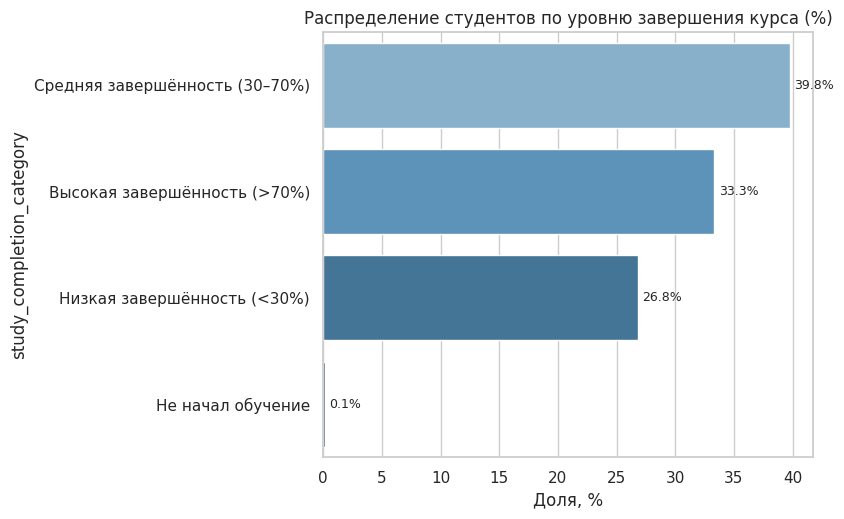


=== Проверка пропусков и артефактов ===
Пропусков (NaN): 0
Артефактных значений: 0


count      %
study_completion_category                   
Средняя завершённость (30–70%)    334  39.76
Высокая завершённость (>70%)      280  33.33
Низкая завершённость (<30%)       225  26.79
Не начал обучение                   1   0.12

In [145]:
# Категоризация уровня завершения курса
def categorize_completion_ratio(x):
    """Категоризация студентов по уровню завершённости обучения."""
    if pd.isna(x):
        return pd.NA
    elif x == 0:
        return "Не начал обучение"
    elif x < 0.3:
        return "Низкая завершённость (<30%)"
    elif x < 0.7:
        return "Средняя завершённость (30–70%)"
    else:
        return "Высокая завершённость (>70%)"

# Применяем функцию
df_deals["study_completion_category"] = df_deals["study_completion_ratio"].apply(categorize_completion_ratio)

# Добавляем бинарные индикаторы (для будущего анализа)
df_deals["is_completed_course"] = (df_deals["study_completion_ratio"] >= 0.9).astype("Int8")
df_deals["is_incomplete_course"] = (df_deals["study_completion_ratio"] < 0.3).astype("Int8")

print("\nКонтроль бинарных индикаторов:")
print(df_deals[["is_completed_course", "is_incomplete_course"]].sum())

# Визуализация категориального распределения
eda_plot(
    df_deals,
    "study_completion_category",
    title="Распределение студентов по уровню завершения курса (%)",
    normalize=True,
    include_na=False
)

### 2.2 Категориальные признаки
Частотное распределение категориальных полей.

#### 2.2.1. `quality_normalized` — нормализованное качество лидов (df_deals)

In [146]:
df_deals["quality_normalized"].unique()

array(['Undefined', 'Cold', 'Warm', 'Hot'], dtype=object)

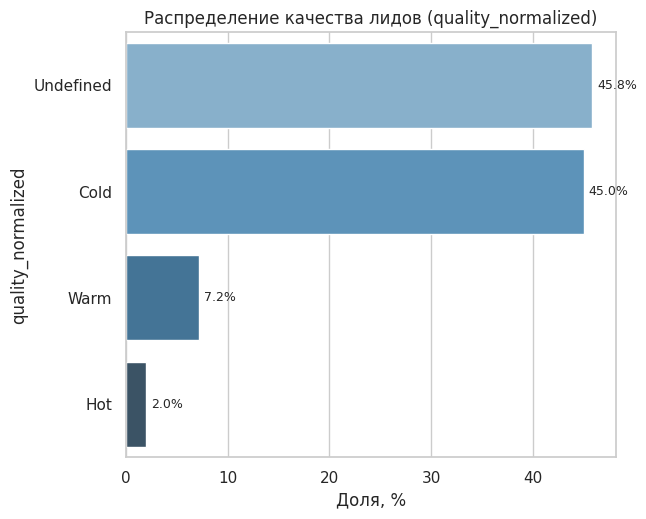


=== Проверка пропусков и артефактов ===
Пропусков (NaN): 0
Артефактных значений: 0


count      %
quality_normalized              
Undefined            9890  45.80
Cold                 9707  44.95
Warm                 1564   7.24
Hot                   432   2.00

In [147]:
eda_plot(
    df=df_deals,
    column_name="quality_normalized",
    title="Распределение качества лидов (quality_normalized)",
    normalize=True  # покажем доли в %
)


**Выводы по изучению параметра `quality_normalized`**
*   Категория **Undefined** (неуказанное или неоценённое качество) составляет **≈46% всех записей**. Это говорит о том, что почти половина лидов в CRM не имеют присвоенной категории качества — вероятно, не были оценены менеджером.
*   Категория **Cold** (низкое качество лида) охватывает **≈45% базы** — то есть подавляющее большинство лидов не демонстрируют заинтересованности в продукте или не соответствуют целевой аудитории.
* «Тёплые» лиды (**Warm**) составляют лишь **≈7% от общей базы**,
а «горячие» (**Hot**) — всего **2%**, что указывает на крайне низкую долю потенциально готовых к оплате клиентов.

**Интерпретация распределения**
* Показатель `quality_normalized` демонстрирует сильный перекос в сторону неопределённых и низкокачественных лидов. Фактически, **91% базы (Undefined + Cold)** не демонстрируют высокой вовлечённости, что указывает на **недостаточную квалификацию трафика и возможные пробелы в работе отдела продаж по оценке входящих обращений**:
  * неэффективной фильтрации заявок на ранних стадиях воронки (входящий трафик слишком общий),
  * слабой дисциплине менеджеров при заполнении статусов,
  * отсутствии автоматизированной системы скоринга лидов.

**Решения и рекомендации по обработке и анализу**
1. Объединить категории **Undefined** и **Cold** для расчёта метрик «низкого качества», поскольку обе группы не имеют высокой вероятности конверсии.
2. Использовать долю **Hot + Warm** как ключевой показатель **Lead Quality Rate (LQR)** — показатель качества лидов по источникам, кампаниям и менеджерам.
3. Отдельно анализировать лиды с **Undefined** — определить, из каких источников и каналов они поступают, и ввести обязательное правило присвоения категории при первичном контакте.
4. При последующем анализе воронки — отслеживать конверсии по группам:
    * **Hot** — максимальная вероятность оплаты,
    * **Warm** — целевая группа для работы менеджеров,
    * **Cold/Undefined** — клиенты, требующие повторного контакта, использовать для ретаргетинга и дооценки.




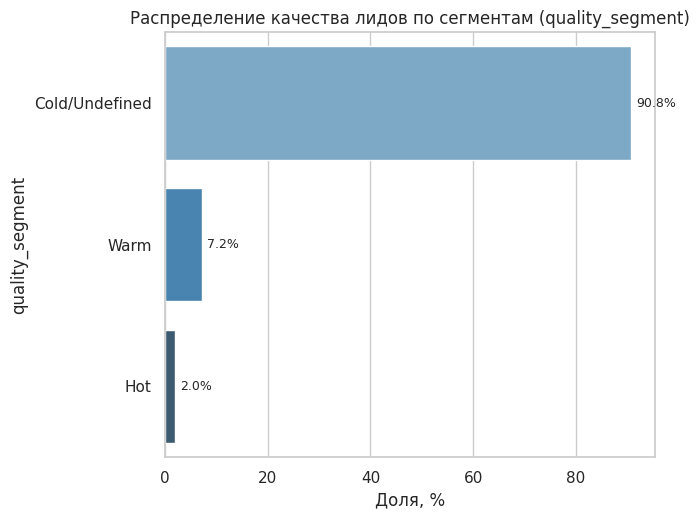


=== Проверка пропусков и артефактов ===
Пропусков (NaN): 0
Артефактных значений: 0


count      %
quality_segment              
Cold/Undefined   19597  90.76
Warm              1564   7.24
Hot                432   2.00

In [148]:
# Добавляем дополнительный категориальный столбец
df_deals["quality_segment"] = df_deals["quality_normalized"].map({
    "Hot": "Hot",
    "Warm": "Warm",
    "Cold": "Cold/Undefined",
    "Undefined": "Cold/Undefined"
})

eda_plot(
    df=df_deals,
    column_name="quality_segment",
    title="Распределение качества лидов по сегментам (quality_segment)",
    normalize=True  # покажем доли в %
)


#### 2.2.2. `stage_normalized` — нормализованные этапы воронки продаж (df_deals)

In [149]:
df_deals["stage_normalized"].unique()

array(['Lead', 'Churned', 'Demo', 'Contacted', 'Payment Process',
       'Active Student'], dtype=object)

| Этап (stage_normalized) | Перевод | Объяснение этапа |
|-|-|-|
| Lead | Лид (потенциальный клиент) | Пользователь, который проявил интерес: оставил заявку, зарегистрировался на вебинар или скачал материалы, но ещё не контактировал с менеджером. |
| Contacted | Контакт установлен | Менеджер связался с лидом (по телефону, мессенджеру, e-mail) и провёл первичное общение, чтобы уточнить потребности и заинтересованность. |
| Demo | Презентация / Демо-урок | Клиент прошёл консультацию или пробный урок, на котором ему показали формат обучения, программу курса и преимущества школы. |
| Payment Process | Процесс оплаты | Клиент принял решение о покупке и находится на стадии оплаты (ожидает счёт, вводит данные карты, согласовывает детали). |
| Active Student | Активный студент | Клиент завершил оплату и начал обучение на курсе. |
| Churned | Потерян / Отток | Сделка не завершилась покупкой, либо студент прекратил обучение; также сюда попадают лиды, с которыми не удалось установить контакт. |


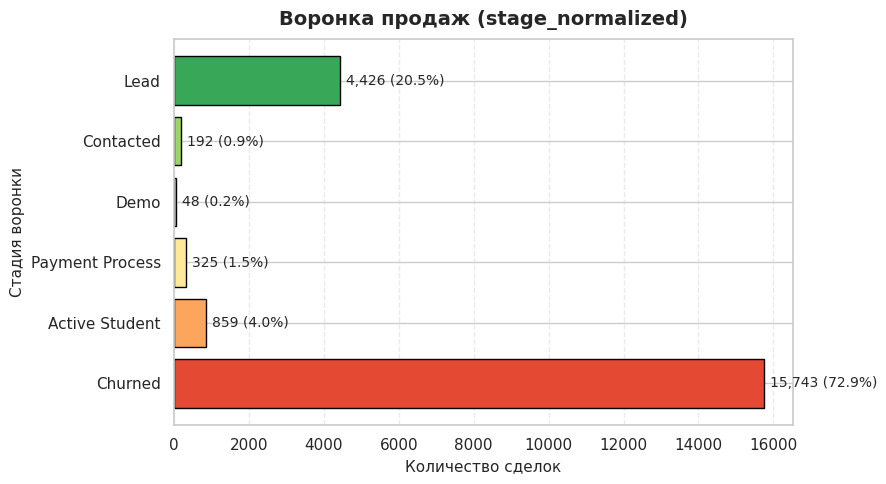

Stage  Count  Percent of Total  Relative %
0             Lead   4426             20.50       28.11
1        Contacted    192              0.89        1.22
2             Demo     48              0.22        0.30
3  Payment Process    325              1.51        2.06
4   Active Student    859              3.98        5.46
5          Churned  15743             72.91      100.00

In [150]:
def plot_funnel(df, stage_col="stage_normalized", title="Воронка продаж (stage_normalized)"):
    """
    Строит воронку продаж с цветовой градацией от зелёного к красному.
    Для df_deals с нормализованным полем 'stage_normalized'.
    """
    # --- Порядок стадий ---
    funnel_order = [
        "Lead",
        "Contacted",
        "Demo",
        "Payment Process",
        "Active Student",
        "Churned"
    ]

    # --- Группировка и пересчёт ---
    funnel_data = (
        df[stage_col]
        .value_counts()
        .reindex(funnel_order)
        .dropna()
        .reset_index()
    )
    funnel_data.columns = ["Stage", "Count"]

    total = funnel_data["Count"].sum()
    funnel_data["Percent of Total"] = (funnel_data["Count"] / total * 100).round(2)
    funnel_data["Relative %"] = (funnel_data["Count"] / funnel_data["Count"].max() * 100).round(2)

    # --- Цветовая градация (зелёный → жёлтый → красный) ---
    cmap = sns.color_palette("RdYlGn_r", len(funnel_data))
    colors = [cmap[i] for i in range(len(funnel_data))]

    # --- Построение графика ---
    plt.figure(figsize=(9, 5))
    bars = plt.barh(
        y=funnel_data["Stage"],
        width=funnel_data["Count"],
        color=colors,
        edgecolor="black"
    )

    # --- Подписи ---
    for i, (count, pct) in enumerate(zip(funnel_data["Count"], funnel_data["Percent of Total"])):
        plt.text(
            count + funnel_data["Count"].max() * 0.01,
            i,
            f"{count:,} ({pct:.1f}%)",
            va="center",
            fontsize=10
        )

    # --- Настройки графика ---
    plt.title(title, fontsize=14, fontweight="bold", pad=10)
    plt.xlabel("Количество сделок", fontsize=11)
    plt.ylabel("Стадия воронки", fontsize=11)
    plt.grid(axis="x", linestyle="--", alpha=0.4)
    plt.gca().invert_yaxis()  # инверсия — верх воронки сверху
    plt.tight_layout()
    plt.show()

    # --- Вывод таблицы ---
    display(funnel_data)

# Пример вызова:
plot_funnel(df_deals)


**Выводы по изучению параметра `stage_normalized` (этапов сделки в воронке продаж)**

* Распределение стадий резко неравномерное и скошено в сторону финального статуса `Churned` **(72.91%)**, что говорит о доминировании несостоявшихся или завершённых без покупки сделок.  
* Вторая по численности категория — `Lead` **(20.50%)**, то есть лиды, которые зафиксированы в CRM, но не прошли первичный контакт или квалификацию.  
* Этапы `Contacted` **(0.89%)** и `Demo` **0.22%)** вместе составляют чуть больше 1%, что указывает на узкое «бутылочное горлышко» между маркетингом и продажами — только небольшая часть лидов доходит до взаимодействия с менеджером.  
* Этап `Payment Process` **(1.51%)** показывает долю сделок, находящихся в процессе оплаты, и может отражать как короткий цикл оплаты, так и недоработку на финальном шаге.  
* Лишь **3.98%** сделок достигли статуса `Active Student`, то есть завершились фактической оплатой и началом обучения.  
* Воронка имеет форму широкой в начале и резко сужающейся после стадии `Lead`, что указывает на потерю большого числа потенциальных клиентов на ранних этапах коммуникации.  

**Интерпретация распределения**

* Воронка характеризуется высокой потерей на этапе **Lead → Contacted**, что свидетельствует о низкой эффективности обработки входящих лидов.  
* Малое количество сделок, доходящих до этапа `Payment Process`, говорит о слабой конверсии между консультацией и решением об оплате.  
* Низкая доля `Active Student` при большой доле `Churned` отражает низкий общий коэффициент конверсии — большая часть лидов либо не доходит до контакта, либо не совершает оплату.  
* Высокий показатель `Churned` может включать как потерю лидов до оплаты, так и отток студентов, прекративших обучение — требуется дополнительная классификация этих случаев (`churn_type`).  

**Рекомендации**

1. Разделить категорию `Churned` на подтипы (например, **Lost Before Payment**, **Student Churned**, **Uncontacted Lead**) для более точной диагностики потерь.  
2. Усилить обработку стадии `Lead` — внедрить автоматические уведомления менеджерам и скоринг лидов по качеству (`quality_normalized`).  
3. Анализировать узкое место `Contacted → Demo`, чтобы определить, на каком этапе лиды теряются (скорость ответа, скрипты продаж, квалификация).  
4. Измерить конверсию между всеми стадиями и построить «коэффициенты переходов» воронки для точной оценки эффективности каждой фазы продаж.


Подтипы категории 'Churned' рассчитаны и добавлены в df_deals['churn_type'].


churn_type
Other               17167
Uncontacted Lead     4426
Name: count, dtype: int64

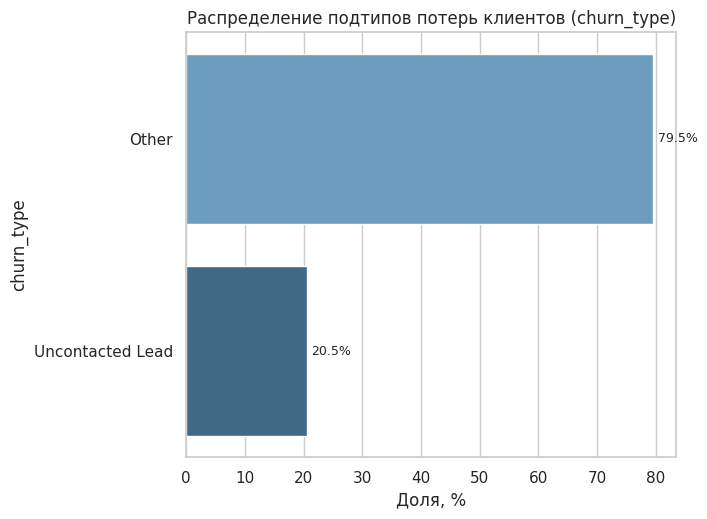


=== Проверка пропусков и артефактов ===
Пропусков (NaN): 0
Артефактных значений: 0


count     %
churn_type                   
Other             17167  79.5
Uncontacted Lead   4426  20.5

In [151]:
# Создание нового признака churn_type на основе стадий и месяцев обучения
df_deals["churn_type"] = np.select(
    [
        # 1. Студент учился хотя бы один месяц, но сделка завершена как Churned → реальный отток
        df_deals["stage_normalized"].eq("Churned") & df_deals["months_of_study"].gt(0),

        # 2. Сделка Churned, но обучение не началось → потеря лида до оплаты
        df_deals["stage_normalized"].eq("Churned") & df_deals["months_of_study"].eq(0),

        # 3. Сделка осталась на стадии Lead → лид без контакта (не дошёл до продаж)
        df_deals["stage_normalized"].eq("Lead")
    ],
    [
        "Student Churned",      # Был студентом, прекратил обучение
        "Lost Before Payment",  # Сделка сорвалась до оплаты
        "Uncontacted Lead"      # Лид без установленного контакта
    ],
    default="Other"             # Остальные активные или промежуточные сделки
)

print("Подтипы категории 'Churned' рассчитаны и добавлены в df_deals['churn_type'].")

# Просмотр распределения категорий
display(df_deals["churn_type"].value_counts(dropna=False))

# --- Визуализация распределения с помощью eda_plot() ---
eda_plot(
    df=df_deals,
    column_name="churn_type",
    title="Распределение подтипов потерь клиентов (churn_type)",
    normalize=True
)


**Выводы по результатам дополнительной сегментации `churn_type`**

* В результате сегментации выявлены две основные группы:  
  - **Other** — 79.5% сделок, включающих активных студентов и промежуточные стадии воронки.  
  - **Uncontacted Lead** — 20.5% всех записей, то есть каждая пятая сделка осталась на стадии лида без установленного контакта.  
* Отсутствуют случаи **реального оттока студентов (`Student Churned`)** и **потерь до оплаты (`Lost Before Payment`)**, что может свидетельствовать об отсутствии завершённых сделок с обучением или о неполноте данных по месяцам обучения (`months_of_study`).  
* Таким образом, основная зона потерь сосредоточена **на самом раннем этапе воронки — Lead**, что подтверждает необходимость анализа причин отсутствия контакта с лидами и оптимизации этапа первичной коммуникации.


#### 2.2.3. `source` — источники лидов (df_deals)

In [152]:
df_deals["source"].unique()

array(['facebook ads', 'organic', 'telegram posts', 'google ads',
       'youtube ads', 'crm', 'webinar', 'smm', 'tiktok ads', 'bloggers',
       'partnership', 'test', 'offline'], dtype=object)

In [153]:
df_spend["source"].unique()

array(['google ads', 'facebook ads', 'crm', 'bloggers', 'youtube ads',
       'smm', 'tiktok ads', 'organic', 'telegram posts', 'webinar',
       'offline', 'partnership', 'test', 'radio'], dtype=object)

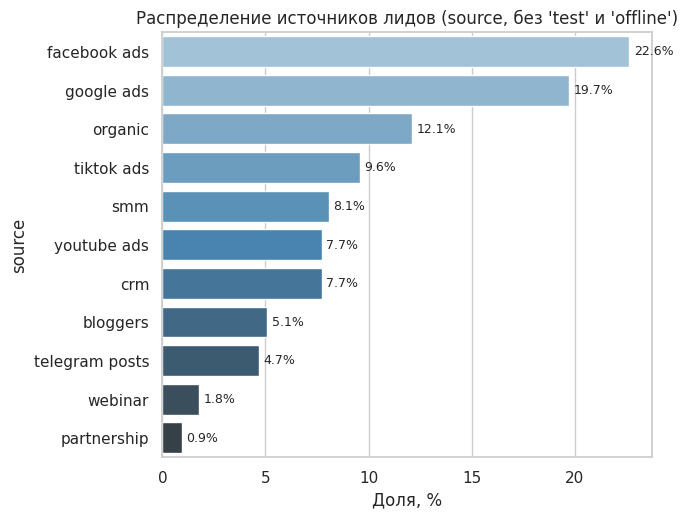


=== Проверка пропусков и артефактов ===
Пропусков (NaN): 0
Артефактных значений: 0


count      %
source                      
facebook ads     4850  22.63
google ads       4226  19.72
organic          2590  12.08
tiktok ads       2051   9.57
smm              1730   8.07
youtube ads      1657   7.73
crm              1656   7.73
bloggers         1089   5.08
telegram posts   1001   4.67
webinar           379   1.77
partnership       203   0.95

In [154]:
# Исключаем технические и неиспользуемые источники
df_source_filtered = df_deals[~df_deals["source"].isin(["test", "offline"])]

# Визуализация распределения источников лидов (source)
eda_plot(
    df=df_source_filtered,
    column_name="source",
    title="Распределение источников лидов (source, без 'test' и 'offline')",
    normalize=True
)


**Выводы по изучению параметра `source` (источник лида)**

* Распределение источников лидов демонстрирует **высокую концентрацию трафика в нескольких доминирующих каналах**. Основную долю обращений формируют рекламные платформы **Facebook Ads (22.6%)** и **Google Ads (19.7%)**, на которые приходится более **40% всех лидов**.  
* Органические источники (`organic` — 12.1%) и социальные сети (`tiktok ads` — 9.6%, `smm` — 8.1%) обеспечивают значительный приток заявок, что говорит о сбалансированной роли контент-маркетинга и таргетированной рекламы.  
* Каналы **YouTube Ads (7.7%)** и **CRM (7.7%)** показывают сопоставимые доли — вероятно, отражая повторные обращения и внутренние лиды, что важно учитывать при расчёте реальной конверсии.  
* Источники **Bloggers (5.1%)** и **Telegram Posts (4.7%)** представляют средний уровень эффективности и могут использоваться для тестирования новых гипотез продвижения.  
* Каналы **Webinar (1.8%)** и **Partnership (0.95%)** дают минимальный вклад, что указывает на ограниченный охват или нерегулярность таких активностей.  
* В целом структура трафика имеет ярко выраженный характер «длинного хвоста»: **3–4 основных источника** обеспечивают основную массу заявок, а остальные дают малую, но потенциально более целевую аудиторию.  

**Интерпретация распределения**

* Зависимость бизнеса от платного трафика из **Facebook и Google Ads** делает конверсию чувствительной к изменениям рекламных алгоритмов и стоимости клика.  
* Доля органического трафика (12%) указывает на устойчивое присутствие бренда в поиске, однако есть потенциал для дальнейшего роста SEO и контент-маркетинга.  
* Сочетание социальных и прямых каналов (`smm`, `tiktok`, `telegram`, `bloggers`) формирует мультиканальную структуру привлечения — важно анализировать перекрёстное влияние каналов.  

**Рекомендации**

1. Провести **сравнительный анализ конверсий** по основным источникам (`facebook ads`, `google ads`, `organic`) до стадий `Payment Process` и `Active Student`.  
2. Рассчитать **стоимость привлечения клиента (CAC)** и **эффективность по качеству лидов (`quality_normalized`)**, чтобы определить наиболее рентабельные каналы.  
3. **Диверсифицировать рекламные бюджеты** — снизить зависимость от Facebook и Google, увеличив инвестиции в органику, TikTok и партнёрские каналы.  
4. Для каналов с малой долей (`webinar`, `partnership`) провести аудит: определить, дают ли они высокое качество лидов и стоит ли расширять эти направления.  
5. Использовать каналы с аудиторией среднего уровня вовлечённости (`bloggers`, `telegram posts`) для **ретаргетинга и тестирования креативов**.

#### 2.2.4. `campaign` — рекламные кампании (df_deals)

In [155]:
df_deals["campaign"].unique()

array(['03.07.23women', nan, 'engwien_at', '04.07.23recentlymoved_de',
       'discovery_de', 'youtube_shorts_de', 'brand_search_eng_de',
       '1406start', '20.05.24interests_de', 'performancemax_eng_de',
       '12.07.2023wide_de', '1006start', '24.09.23retargeting_de',
       'germany_de', 'performancemax_wide_at', '07.07.23lal_de',
       'webinar1906', 'germania_de', '02.07.23wide_de',
       '22.05.2024wide_de', 'blog_de', 'blog2_de', '17.03.24wide_at',
       '12.06.24wide_de', 'jobs_germany_de', '2005_lost_de', 'uk_de',
       '08.04.24wide_webinar_de', '08.06.24wide_webinar_de', 'akademia',
       'bloggerivan', 'genie_de', 'live_de', '1706_de',
       'performancemax_digitalmarkt_ru_de', '12.09.23interests_uxui_de',
       '5555_de', 'asa_de_de', '2905start', 'webinar1604',
       'bloggerfrai_de', 'bloggerdr_de', 'trigger_de', 'bloggerel_de',
       'forum_de', 'consult_de', 'work_de', 'bolgspeak_de', 'tyk_de',
       'of_de', 'berlin_de', 'markt_de', 'bloggershina_de',
   

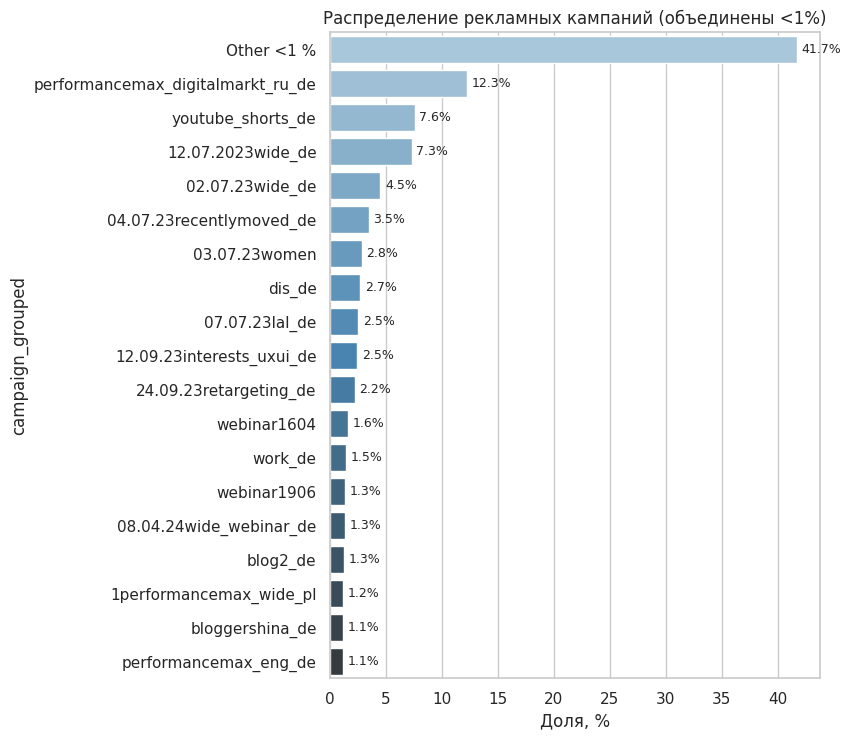


=== Проверка пропусков и артефактов ===
Пропусков (NaN): 0
Артефактных значений: 0


count      %
campaign_grouped                               
Other <1 %                          9001  41.68
performancemax_digitalmarkt_ru_de   2653  12.29
youtube_shorts_de                   1635   7.57
12.07.2023wide_de                   1575   7.29
02.07.23wide_de                      975   4.52
04.07.23recentlymoved_de             750   3.47
03.07.23women                        612   2.83
dis_de                               581   2.69
07.07.23lal_de                       542   2.51
12.09.23interests_uxui_de            531   2.46
24.09.23retargeting_de               479   2.22
webinar1604                          343   1.59
work_de                              317   1.47
webinar1906                          290   1.34
08.04.24wide_webinar_de              284   1.32
blog2_de                             273   1.26
1performancemax_wide_pl              261   1.21
bloggershina_de                      246   1.14
performancemax_eng_de                245   1.13

In [156]:
# Создание копии исходных данных
df_campaigns = df_deals.copy()

# Подсчёт долей каждой кампании
campaign_share = (
    df_campaigns["campaign"]
    .value_counts(normalize=True)
    .mul(100)
    .reset_index()
    .rename(columns={"index": "campaign", "proportion": "share"}) # Fixed column name
)

# Приведение типа долей к float (на случай строкового формата)
campaign_share["share"] = campaign_share["share"].astype(float)

# Определяем крупные и малые кампании ---
major_campaigns = campaign_share.loc[campaign_share["share"] >= 1.1, "campaign"]

df_campaigns["campaign_grouped"] = df_campaigns["campaign"].where(
    df_campaigns["campaign"].isin(major_campaigns),
    other="Other <1 %"
)

# Визуализация агрегированного распределения
eda_plot(
    df=df_campaigns,
    column_name="campaign_grouped",
    title="Распределение рекламных кампаний (объединены <1%)",
    normalize=True
)

**Выводы по изучению параметра `campaign` (рекламные кампании)**

* Распределение кампаний демонстрирует **сильную фрагментацию трафика**: подавляющая часть сделок (41.7%) относится к категории `Other <1 %`, что говорит о большом числе малозначимых кампаний с низким вкладом в общий поток лидов.  
* Среди ключевых кампаний выделяются несколько стабильных лидеров:  
  - **performancemax_digitalmarkt_ru_de** — крупнейшая кампания (12.3% всех сделок);  
  - **youtube_shorts_de** (7.6%) и **12.07.2023wide_de** (7.3%) — высокоэффективные массовые кампании;  
  - **02.07.23wide_de**, **04.07.23recentlymoved_de** и **03.07.23women** (в диапазоне 2.8–4.5%) формируют средний сегмент.  
* Совокупно топ-6 кампаний обеспечивают **почти 40% всех сделок**, что указывает на **высокую концентрацию трафика** в ограниченном наборе активностей.  
* Кампании с тематикой **retargeting** и **interest-based (interests_uxui_de)** присутствуют в топ-10, что подтверждает эффективность персонализированных стратегий.  
* Кампании типа `webinar` (вебинары 1604 и 1906) дают совокупно около **3% сделок**, что может говорить о стабильном, но нишевом потоке лидов из образовательных событий.  
* Кампания `performancemax_eng_de` (1.1%) демонстрирует потенциал расширения англоязычного сегмента, но требует анализа конверсий и стоимости привлечения.

**Рекомендации:**  
1. Провести **детальный анализ конверсий и CPA** для топ-кампаний, чтобы определить наиболее рентабельные направления.  
2. Оценить **эффективность малых кампаний** (`Other <1 %`): часть из них может быть остановлена или объединена для повышения рентабельности.  
3. Рассмотреть **расширение успешных кампаний performancemax и YouTube Shorts** на новые регионы или аудитории.  
4. Углубить использование **ретаргетинга и interest-based подходов** для повышения качества лидов.  
5. Для кампаний-вебинаров — проанализировать **конверсию из регистрации в оплату**, чтобы оценить реальную окупаемость образовательных активностей.


#### 2.2.5. `product` — продукты / курсы (df_deals)

In [157]:
df_deals["product"].unique()

array([nan, 'web developer', 'digital marketing', 'ux/ui design',
       'find yourself in it', 'data analytics'], dtype=object)

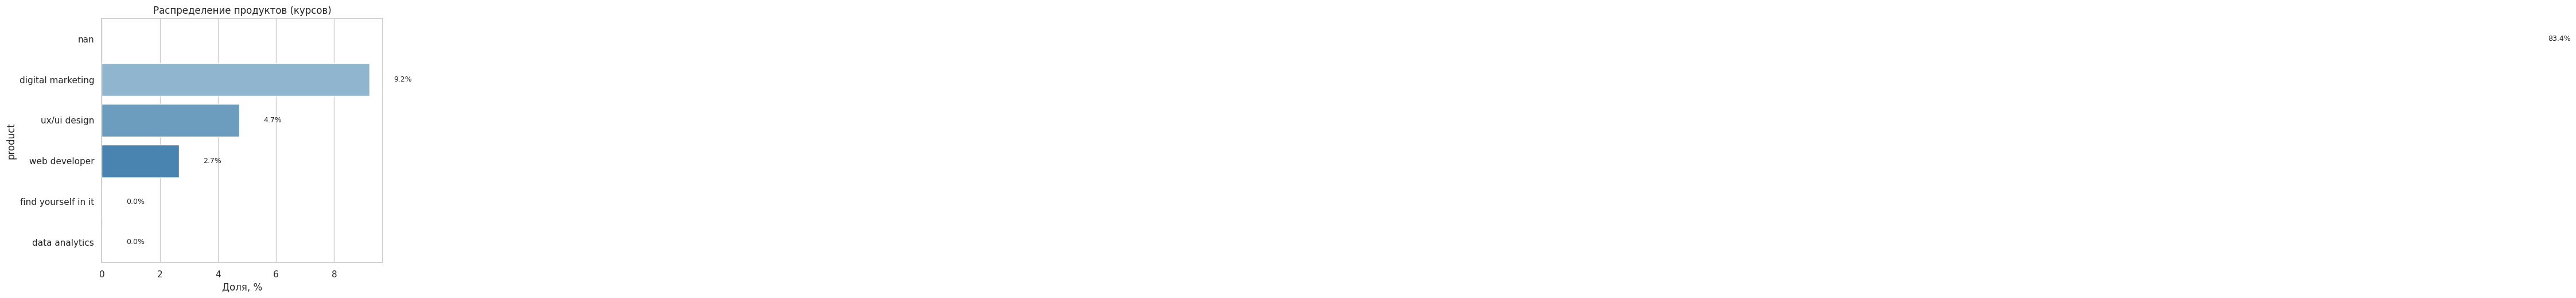


=== Проверка пропусков и артефактов ===
Пропусков (NaN): 18001
Артефактных значений: 0


count      %
product                          
NaN                  18001  83.36
digital marketing     1990   9.22
ux/ui design          1022   4.73
web developer          575   2.66
find yourself in it      4   0.02
data analytics           1   0.00

In [158]:
# Визуализация распределения значений product ---

eda_plot(
    df=df_deals,
    column_name="product",
    title="Распределение продуктов (курсов)",
    normalize=True

)

**Выводы по изучению параметра `product` (продукт или курс)**

* Подавляющее большинство записей **(83.4%)** содержат **пропуски в поле `product`**, что указывает на проблемы с ведением данных в CRM или неполную интеграцию маркетинговых и учебных систем.  
* Среди заполненных значений наблюдается **чёткая концентрация в трёх направлениях обучения**:
  - **Digital Marketing** — 9.2% всех сделок, основной коммерческий продукт школы.  
  - **UX/UI Design** — 4.7%, устойчивое второе место, потенциально высокий спрос.  
  - **Web Developer** — 2.7%, стабильно востребованное направление с потенциалом роста.  
* Остальные продукты встречаются крайне редко:  
  - **Find Yourself in IT** — 0.02% (единичные случаи).  
  - **Data Analytics** — всего 1 запись (0.00%), вероятно, тестовое значение или новая программа.  
* Отсутствие данных по продукту в более чем 80% записей **снижает точность анализа эффективности** и делает невозможным полноценную оценку доли рынка и рентабельности по направлениям.

**Рекомендации:**  
1. Проверить **источники заполнения поля `product`** — при необходимости восстановить значения на основе связей с рекламными кампаниями (`campaign`) или страницами (`page`).  
2. В рамках дальнейшего анализа рассматривать три ключевых направления: **Digital Marketing**, **UX/UI Design** и **Web Developer** — они обеспечивают почти весь подтверждённый объём продаж.  
3. Для оставшихся продуктов — провести аудит целесообразности: возможно, это неактивные курсы или тестовые проекты.  
4. Разработать **механизм обязательного заполнения `product`** в CRM при создании сделки, чтобы избежать потери данных в будущем.  
5. Для моделей конверсии и прогнозирования исключить записи без указания продукта или выделить их в отдельную категорию `Undefined Product`.

#### 2.2.6. `payment_type` — способы оплаты

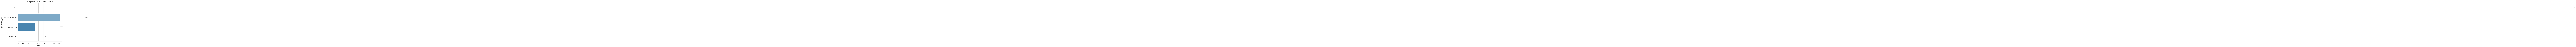


=== Проверка пропусков и артефактов ===
Пропусков (NaN): 21097
Артефактных значений: 0


count      %
payment_type                    
NaN                 21097  97.70
recurring payments    350   1.62
one payment           141   0.65
reservation             5   0.02

In [159]:
# Визуализация распределения значений payment_type

eda_plot(
    df=df_deals,
    column_name="payment_type",
    title="Распределение способов оплаты",
    normalize=True
)

**Выводы по изучению параметра `payment_type` (тип оплаты)**

* Подавляющее большинство записей (97.7%) содержат **пропуски в поле `payment_type`**, что указывает на существенные проблемы в передаче или регистрации информации о типе оплаты в CRM.  
* Среди заполненных значений можно выделить три типа:  
  - **Recurring payments (периодические платежи)** — 1.6%, что отражает использование рассрочек или подписок.  
  - **One payment (единовременная оплата)** — 0.65%, случаи полной предоплаты.  
  - **Reservation (бронь)** — единичные случаи (0.02%), вероятно, тестовые или неполные сделки.  
* Настолько высокая доля пропусков делает невозможным корректный анализ распределения по типам оплат и говорит о **неполноте данных финансового блока CRM**.

**Интерпретация:**  
Фактически, система зафиксировала тип оплаты только у 2.3% всех сделок, поэтому текущие пропорции не отражают реальную структуру платёжного поведения клиентов. Это техническая проблема учёта, а не отражение бизнес-реальности.

**Рекомендации:**  
1. Провести **аудит CRM-интеграции с платёжными системами** — определить, на каком этапе теряется информация о типе оплаты.  
2. Настроить **обязательное заполнение поля `payment_type`** при проведении сделки или поступлении платежа.  
3. Попробовать восстановить часть данных по историческим транзакциям, сопоставив с источниками (`source`) или стадиями (`stage_normalized`), где платёж был зафиксирован.  
4. При аналитических расчётах (до очистки данных) использовать временное объединение всех неопределённых типов в категорию `Undefined`, чтобы не терять объём выборки.  
5. После восстановления данных — провести сравнение конверсии и среднего чека по `recurring` и `one payment`, что поможет определить **предпочтительный для клиентов формат оплаты**.

#### 2.2.7. `education_type` —

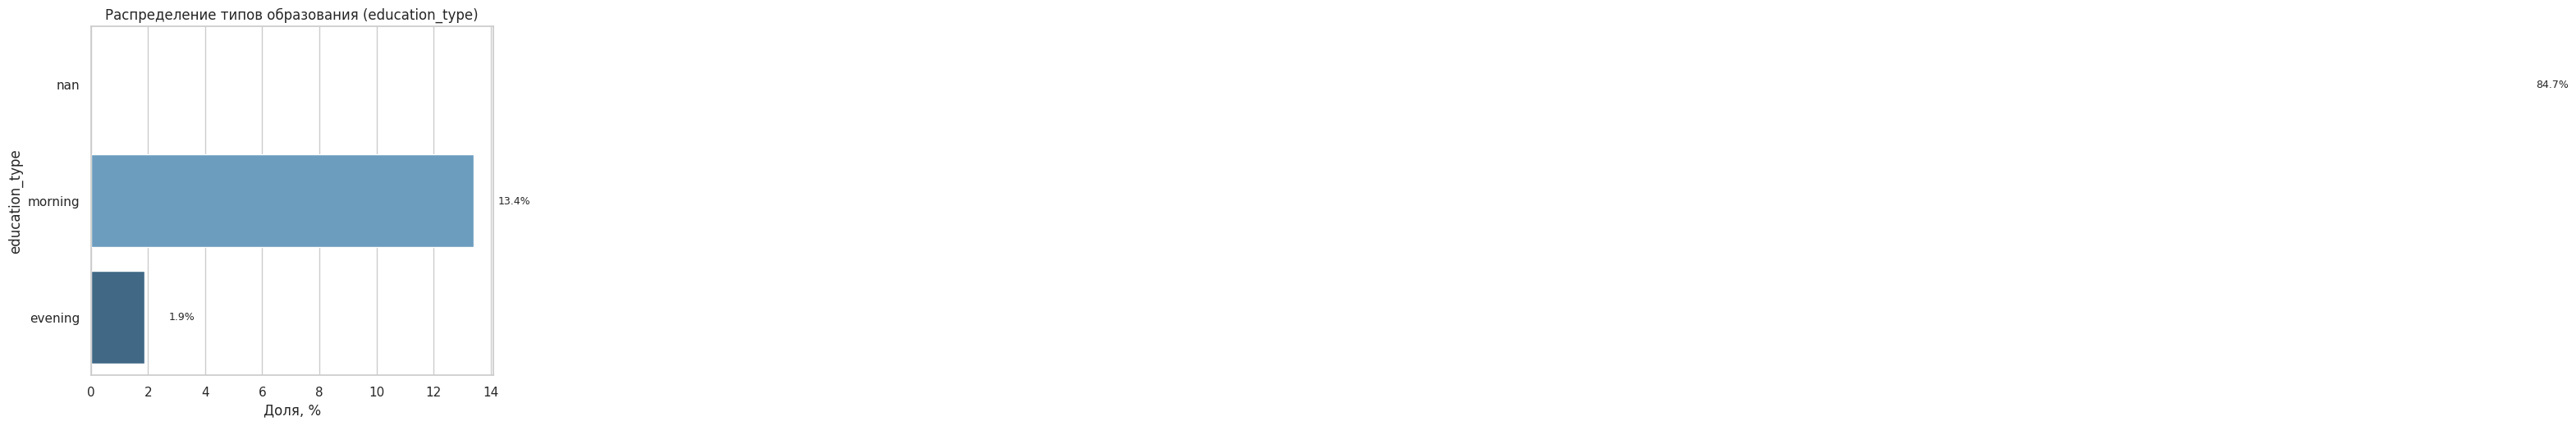


=== Проверка пропусков и артефактов ===
Пропусков (NaN): 18294
Артефактных значений: 0


count      %
education_type              
NaN             18294  84.72
morning          2895  13.41
evening           404   1.87

In [160]:
# Визуализация распределения значений education_type

eda_plot(
    df=df_deals,
    column_name="education_type",
    title="Распределение типов образования (education_type)",
    normalize=True
)

**Выводы по изучению параметра `education_type` (тип образования / формат обучения)**

* Подавляющее число записей (**84.7%**) не содержат информации о формате обучения, что говорит о **неполной передаче данных** из анкеты или учебной платформы в CRM.  
* Среди заполненных значений выделяются две основные категории:  
  - **Morning** — 13.4% сделок, утренний формат обучения.  
  - **Evening** — 1.9%, вечерние группы.  
* Преобладание утреннего формата может отражать особенности расписания школы или предпочтения целевой аудитории (например, студентов или людей, совмещающих обучение с работой).  
* Наличие почти 85% пропусков существенно снижает качество аналитики по расписанию и мешает оценке влияния формата обучения на конверсию или удержание студентов.  

**Интерпретация:**  
Можно предположить, что значительная часть сделок создаётся на ранних стадиях воронки, когда формат обучения ещё не выбран, или что эти данные не передаются из системы расписания. Таким образом, переменная `education_type` в текущем виде **не пригодна для прямого анализа влияния на успех сделки**.

**Рекомендации:**  
1. Проверить процесс заполнения `education_type` в CRM и **обеспечить автоматическую синхронизацию** с расписанием или учебной платформой.  
2. При восстановлении данных можно использовать стадии воронки (`stage_normalized`) или продукт (`product`) — часто формат коррелирует с типом курса.  
3. Для анализа текущих данных имеет смысл **объединить все пропуски в категорию `"Undefined"`**, чтобы использовать признак в моделях без потери записей.  
4. После очистки и дообогащения данных провести сравнительный анализ **успешности и удержания студентов по форматам Morning и Evening**.  


## 3. Анализ временных рядов

### 3.1 Динамика создания сделок и звонков
Проверим тренды активности во времени.

In [161]:
print(f"Calls: {df_calls.shape} | Deals: {df_deals.shape} | Deals с IAP: {df_deals_filtered_iap.shape}")

Calls: (95874, 9) | Deals: (21593, 35) | Deals с IAP: (3943, 26)


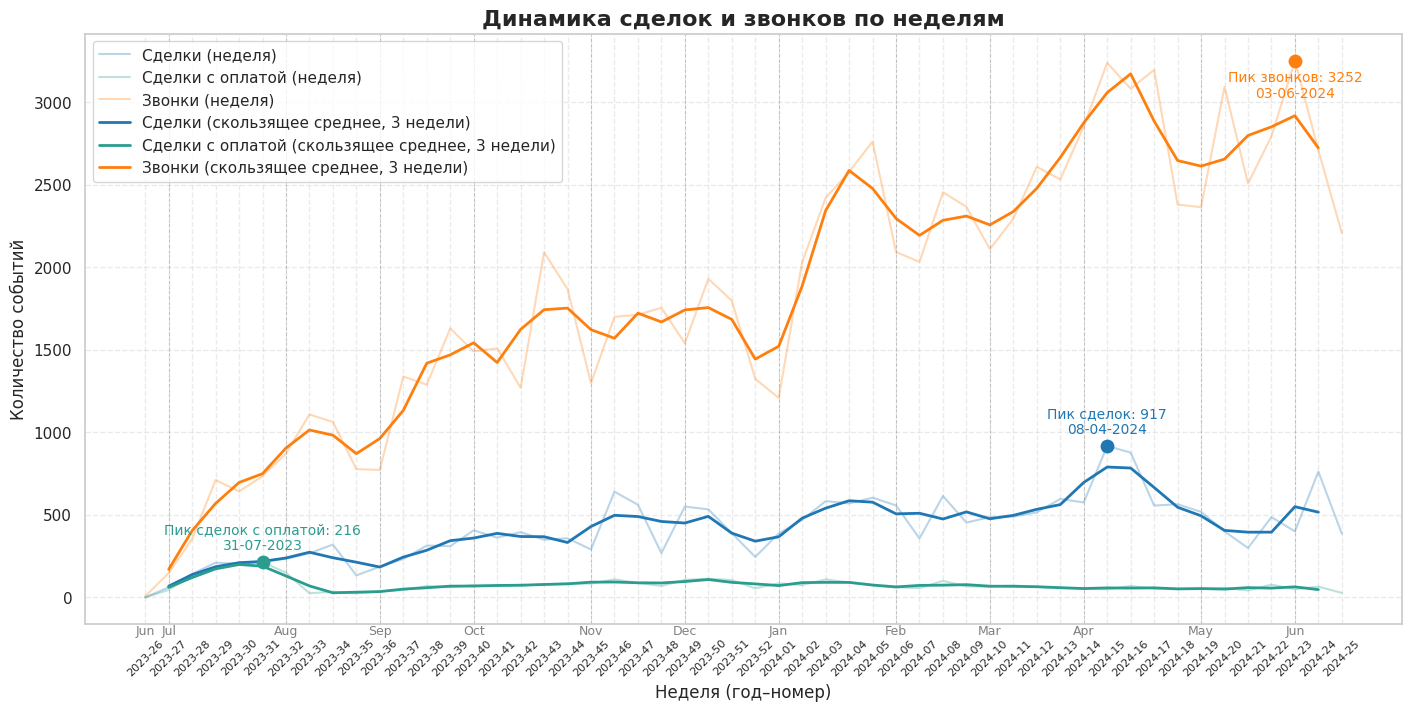

In [162]:
# Агрегируем по неделям
deals_ts = (
    df_deals
    .groupby(df_deals["created_time"].dt.to_period("W"))["id"]
    .count()
    .rename("Deals")
)

# Сделки с оплатой
deals_iap_ts = (
    df_deals_filtered_iap
    .groupby(df_deals_filtered_iap["created_time"].dt.to_period("W"))["id"]
    .count()
    .rename("Deals_iap")
)

calls_ts = (
    df_calls
    .groupby(df_calls["call_start_time"].dt.to_period("W"))["id"]
    .count()
    .rename("Calls")
)

# Индекс к дате начала недели
deals_ts.index = deals_ts.index.to_timestamp()
deals_iap_ts.index = deals_iap_ts.index.to_timestamp()
calls_ts.index = calls_ts.index.to_timestamp()

# Объединяем
ts = pd.concat([deals_ts, deals_iap_ts, calls_ts], axis=1).fillna(0)

# Добавляем календарные атрибуты
calendar = ts.index.isocalendar()
ts["Year"] = calendar.year
ts["Week"] = calendar.week
ts["Month"] = ts.index.month
ts["YearWeek"] = ts["Year"].astype(str) + "-" + ts["Week"].astype(str).str.zfill(2)

# Сглаживание
"""
ts["Deals_MA"] = ts["Deals"].rolling(window=3, center=True).mean()
ts["Deals_iap_MA"] = ts["Deals_iap"].rolling(window=3, center=True).mean()
ts["Calls_MA"] = ts["Calls"].rolling(window=3, center=True).mean()
"""
for col in ["Deals", "Deals_iap", "Calls"]:
    ts[f"{col}_MA"] = ts[col].rolling(window=3, center=True).mean()

# Определяем пики активности
deal_peak_date = ts["Deals"].idxmax()
deal_iap_peak_date = ts["Deals_iap"].idxmax()
call_peak_date = ts["Calls"].idxmax()

# Определяем границы месяцев
month_start_idx = ts.index.to_series().dt.to_period("M").drop_duplicates().index
month_labels = [d.strftime("%b") for d in month_start_idx]  # сокращенные месяцы: Jan, Feb, Mar

# Построение графика
#plt.figure(figsize=(16, 8))
plt.figure(figsize=(14, 7), constrained_layout=True)

# Основные линии
plt.plot(ts["YearWeek"], ts["Deals"], label="Сделки (неделя)", color="#1f77b4", alpha=0.3)
plt.plot(ts["YearWeek"], ts["Deals_iap"], label="Сделки c оплатой (неделя)", color="#2a9d8f", alpha=0.3)
plt.plot(ts["YearWeek"], ts["Calls"], label="Звонки (неделя)", color="#ff7f0e", alpha=0.3)

# Сглаженные линии
plt.plot(ts["YearWeek"], ts["Deals_MA"], label="Сделки (скользящее среднее, 3 недели)", color="#1f77b4", linewidth=2)
plt.plot(ts["YearWeek"], ts["Deals_iap_MA"], label="Сделки c оплатой (скользящее среднее, 3 недели)", color="#2a9d8f", linewidth=2)
plt.plot(ts["YearWeek"], ts["Calls_MA"], label="Звонки (скользящее среднее, 3 недели)", color="#ff7f0e", linewidth=2)

# Вертикальные линии начала месяца
for i, d in enumerate(month_start_idx):
    if i == 0:
        continue  # пропускаем самую первую
    plt.axvline(
        x=ts.index.get_loc(d),  # позиция недели в серии
        color="gray",
        linestyle="--",
        linewidth=0.7,
        alpha=0.4
    )

# Подписи месяцев
#month_positions = [ts.index.get_loc(d) for d in month_start_idx]
month_positions = [(abs(ts.index - d)).argmin() for d in month_start_idx]
plt.xticks(
    ticks=range(len(ts)),
    labels=ts["YearWeek"],
    rotation=45,
    fontsize=8
)

# Отдельная нижняя ось для месяцев
for pos, label in zip(month_positions, month_labels):
    plt.text(pos, -max(ts["Deals"].max(), ts["Deals_iap"].max(), ts["Calls"].max()) * 0.05,  # чуть ниже оси X
             label, ha="center", va="top", fontsize=9, color="gray")

# Аннотации пиков
deal_peak_idx = ts.index.get_loc(deal_peak_date)
deal_iap_peak_idx = ts.index.get_loc(deal_iap_peak_date)
call_peak_idx = ts.index.get_loc(call_peak_date)

plt.scatter(deal_peak_idx, ts.loc[deal_peak_date, "Deals"], color="#1f77b4", s=80, zorder=5)
plt.scatter(deal_iap_peak_idx, ts.loc[deal_iap_peak_date, "Deals_iap"], color="#2a9d8f", s=80, zorder=5)
plt.scatter(call_peak_idx, ts.loc[call_peak_date, "Calls"], color="#ff7f0e", s=80, zorder=5)


plt.text(deal_peak_idx, ts.loc[deal_peak_date, "Deals"] + 75,
         f"Пик сделок: {ts.loc[deal_peak_date, 'Deals']:.0f}\n{deal_peak_date.strftime('%d-%m-%Y')}",
         color="#1f77b4", fontsize=10, ha="center")

plt.text(deal_iap_peak_idx, ts.loc[deal_iap_peak_date, "Deals_iap"] + 75,
         f"Пик сделок c оплатой: {ts.loc[deal_iap_peak_date, 'Deals']:.0f}\n{deal_iap_peak_date.strftime('%d-%m-%Y')}",
         color="#2a9d8f", fontsize=10, ha="center")

plt.text(call_peak_idx, ts.loc[call_peak_date, "Calls"] - 225,
         f"Пик звонков: {ts.loc[call_peak_date, 'Calls']:.0f}\n{call_peak_date.strftime('%d-%m-%Y')}",
         color="#ff7f0e", fontsize=10, ha="center")

# Оформление
plt.title("Динамика сделок и звонков по неделям", fontsize=16, fontweight="bold")
plt.xlabel("Неделя (год–номер)")
plt.ylabel("Количество событий")
plt.legend()
plt.grid(True, linestyle="--", alpha=0.4)
#plt.tight_layout()
plt.show()

### 3.2 Длительность цикла сделки
Разница между датой создания и закрытия сделки.

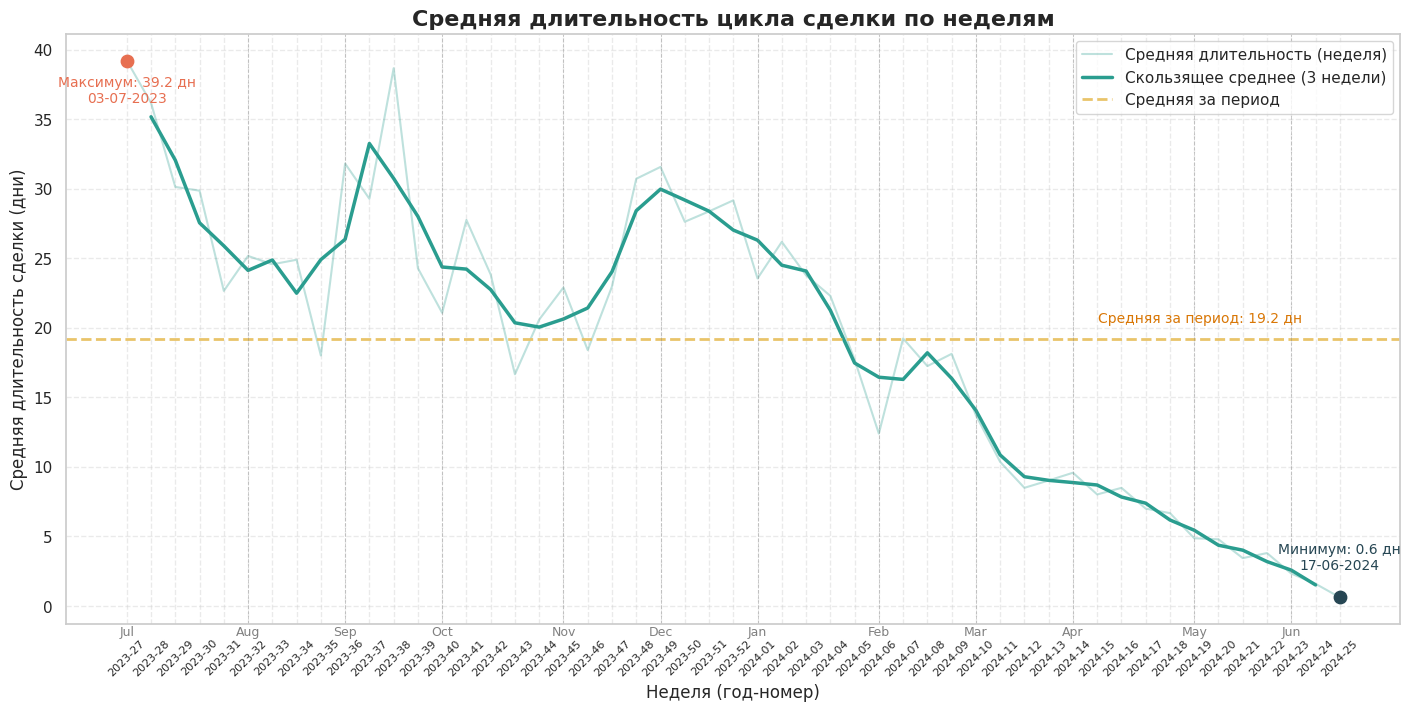

In [198]:
# Вычисляем разницу между датой создания и закрытия сделки
df_deals["cycle_length_days"] = (
    (df_deals["closing_date"] - df_deals["created_time"]).dt.days
)

# Очистка данных (только завершённые сделки, без отрицательных значений)
df_cycle = df_deals[
    (df_deals["cycle_length_days"].notna()) &
    (df_deals["cycle_length_days"] >= 0)
].copy()

# Группировка по неделям даты создания сделки
cycle_ts = (
    df_cycle
    .groupby(df_cycle["created_time"].dt.to_period("W"))["cycle_length_days"]
    .mean()
    .rename("avg_cycle_days")
)

cycle_ts.index = cycle_ts.index.to_timestamp()

# Add a check for empty cycle_ts
if cycle_ts.empty:
    print("No valid data to plot deal cycle length after filtering.")
else:
    # Convert the series to a DataFrame to ensure correct calculation
    ts_cycle = cycle_ts.to_frame()

    # Add calendar attributes
    calendar = ts_cycle.index.isocalendar()
    ts_cycle["Year"] = calendar.year
    ts_cycle["Week"] = calendar.week
    ts_cycle["Month"] = ts_cycle.index.month
    ts_cycle["YearWeek"] = ts_cycle["Year"].astype(str) + "-" + ts_cycle["Week"].astype(str).str.zfill(2)

    # Сглаживание (MA 3 недели)
    ts_cycle["avg_cycle_days_MA"] = ts_cycle["avg_cycle_days"].rolling(window=3, center=True).mean()


    # Определение пиков
    peak_max = ts_cycle["avg_cycle_days"].idxmax()
    peak_min = ts_cycle["avg_cycle_days"].idxmin()

    # Определяем границы месяцев
    month_start_idx = ts_cycle.index.to_series().dt.to_period("M").drop_duplicates().index
    month_labels = [d.strftime("%b") for d in month_start_idx]  # сокращенные месяцы: Jan, Feb, Mar

    # Calculate overall mean after ts_cycle is created
    overall_mean = ts_cycle["avg_cycle_days"].mean()

    # === Визуализация ===
    plt.figure(figsize=(14, 7), constrained_layout=True)

    # Основная линия
    plt.plot(ts_cycle["YearWeek"], ts_cycle["avg_cycle_days"],
             label="Средняя длительность (неделя)",
             color="#2a9d8f", alpha=0.3)

    # Сглаженная линия
    plt.plot(ts_cycle["YearWeek"], ts_cycle["avg_cycle_days_MA"].values,
             label="Скользящее среднее (3 недели)",
             color="#2a9d8f", linewidth=2.5)

    # Линия средней длительности за весь период
    plt.axhline(
        y=overall_mean,
        color="#e9c46a", linestyle="--", linewidth=2,
        label=f"Средняя за период"
    )

    # Аннотации пиков
    plt.scatter(ts_cycle.index.get_loc(peak_max), ts_cycle.loc[peak_max, "avg_cycle_days"], color="#e76f51", s=80, zorder=5)
    plt.scatter(ts_cycle.index.get_loc(peak_min), ts_cycle.loc[peak_min, "avg_cycle_days"], color="#264653", s=80, zorder=5)

    plt.text(ts_cycle.index.get_loc(peak_max), ts_cycle.loc[peak_max, "avg_cycle_days"] - 3,
                 f"Максимум: {ts_cycle.loc[peak_max, 'avg_cycle_days']:.1f} дн\n{peak_max.strftime('%d-%m-%Y')}",
                 color="#e76f51", fontsize=10, ha="center")

    plt.text(ts_cycle.index.get_loc(peak_min), ts_cycle.loc[peak_min, "avg_cycle_days"] + 2,
                 f"Минимум: {ts_cycle.loc[peak_min, 'avg_cycle_days']:.1f} дн\n{peak_min.strftime('%d-%m-%Y')}",
                 color="#264653", fontsize=10, ha="center")


    # Add text annotation for the overall mean
    plt.text(len(ts_cycle) * 0.95, overall_mean + 1,  # Position slightly above the line and to the right
             f"Средняя за период: {overall_mean:.1f} дн", color="#d97706", fontsize=10, ha="right", va="bottom")

    # Вертикальные линии начала месяца
    month_positions = [ts_cycle.index.get_loc(d) for d in month_start_idx] # Use get_loc for more accurate positioning
    for i, d in enumerate(month_start_idx):
        if i == 0:
            continue
        plt.axvline(
            x=ts_cycle.index.get_loc(d), # Use get_loc here as well
            color="gray", linestyle="--", linewidth=0.7, alpha=0.4
        )

    # Подписи недель
    plt.xticks(
        ticks=range(len(ts_cycle)),
        labels=ts_cycle["YearWeek"],
        rotation=45,
        fontsize=8
    )

    # Подписи месяцев
    for pos, label in zip(month_positions, month_labels):
        plt.text(pos, -ts_cycle["avg_cycle_days"].max() * 0.035,
                 label, ha="center", va="top", fontsize=9, color="gray")

    # Оформление
    plt.title("Средняя длительность цикла сделки по неделям", fontsize=16, fontweight="bold")
    plt.xlabel("Неделя (год-номер)")
    plt.ylabel("Средняя длительность сделки (дни)")
    plt.legend()
    plt.grid(True, linestyle="--", alpha=0.4)
    plt.show()

## 4. Анализ эффективности кампаний

### 4.1. Топ-10 источников лидов по конверсии

In [202]:
# Определение успешных сделок ===
success_stages = ["Payment Process", "Active Student"]
df_deals["is_success"] = df_deals["stage_normalized"].isin(success_stages)

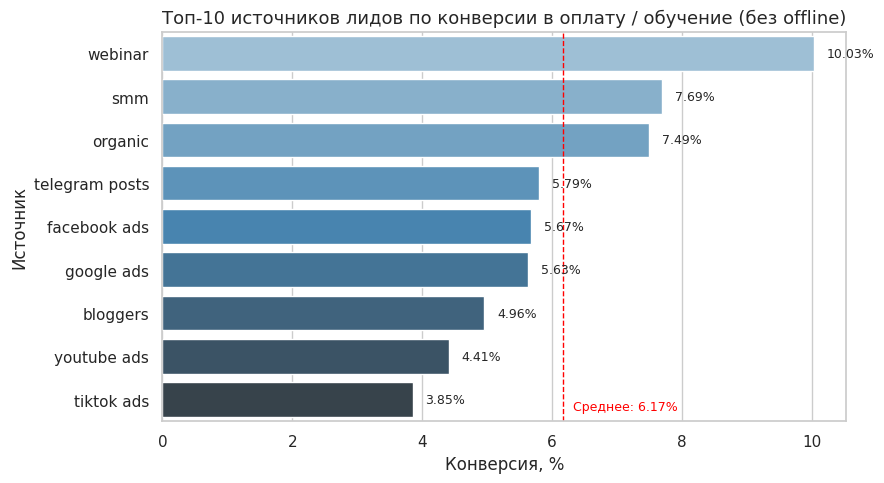

source  total_leads  successful  conversion_rate
0         offline            2           1        50.000000
1         webinar          379          38        10.026385
2             smm         1730         133         7.687861
3         organic         2590         194         7.490347
4  telegram posts         1001          58         5.794206
5    facebook ads         4850         275         5.670103
6      google ads         4226         238         5.631803
7        bloggers         1089          54         4.958678
8     youtube ads         1657          73         4.405552
9      tiktok ads         2051          79         3.851780

In [178]:
# === 1. Группировка и расчёт конверсии по источникам ===
conversion_by_source = (
    df_deals.groupby("source", dropna=False)
    .agg(
        total_leads=("id", "count"),
        successful=("is_success", "sum")
    )
    .assign(
        conversion_rate=lambda x: (x["successful"] / x["total_leads"] * 100)
    )
    .sort_values("conversion_rate", ascending=False)
    .reset_index()
)

# Убираем источники с нулевыми лидами
conversion_by_source = conversion_by_source[conversion_by_source["total_leads"] > 0]

# === 2. Отбор топ-10 по конверсии ===
top10_sources = conversion_by_source.head(10).copy()

# === 3. Визуализация без offline ===
top10_sorted = top10_sources.sort_values("conversion_rate", ascending=False)

# Исключаем offline только для графика
top10_viz = top10_sorted[top10_sorted["source"] != "offline"]

plt.figure(figsize=(9, 5))
sns.barplot(
    data=top10_viz,
    x="conversion_rate",
    y="source",
    hue="source",
    palette="Blues_d",
    legend=False
)

plt.title("Топ-10 источников лидов по конверсии в оплату / обучение (без offline)", fontsize=13)
plt.xlabel("Конверсия, %")
plt.ylabel("Источник")

# Подписи процентов
for i, v in enumerate(top10_viz["conversion_rate"]):
    plt.text(v + 0.2, i, f"{v:.2f}%", va="center", fontsize=9)

# Средняя линия по оставшимся источникам
avg_conversion = top10_viz["conversion_rate"].mean()
plt.axvline(avg_conversion, color="red", linestyle="--", linewidth=1)
plt.text(avg_conversion + 0.15, len(top10_viz) - 0.75,
         f"Среднее: {avg_conversion:.2f}%", color="red", fontsize=9)

plt.tight_layout()
plt.show()

# === 4. Табличный вывод (с offline) ===
display(top10_sources[["source", "total_leads", "successful", "conversion_rate"]])


**Выводы по анализу конверсии по источникам лидов (`source`)**

* Анализ показал существенные различия в эффективности источников привлечения лидов по показателю **конверсии в оплату / обучение**.  
* Наибольшую конверсию демонстрирует источник **`offline` (50%)**, однако это результат всего двух сделок — следовательно, статистически он **не является показателем реальной эффективности** и исключён из визуализации.  
* Среди онлайн-каналов лидерами по конверсии являются:
  - **`webinar` — 10.0%**: самый результативный формат привлечения, отражающий эффективность образовательных мероприятий.  
  - **`smm` — 7.7%** и **`organic` — 7.5%**: сильные каналы с высоким качеством лидов и низкой стоимостью привлечения.  
  - **`telegram posts` — 5.8%**, **`facebook ads` — 5.7%**, **`google ads` — 5.6%** — стабильные каналы с умеренной конверсией, на которые приходится большая часть трафика.  
* Каналы **`bloggers` (5.0%)**, **`youtube ads` (4.4%)** и **`tiktok ads` (3.9%)** показали более низкую эффективность, что может быть связано с широкой, менее целевой аудиторией.  

**Интерпретация:**  
- Органические и SMM-каналы приносят лидов высокого качества, обеспечивая конверсию выше среднего.  
- Рекламные платформы (Facebook, Google, YouTube, TikTok) дают большой объём, но меньшую долю оплат, что требует дополнительного анализа стоимости привлечения (CPC, CPA).  
- Вебинары и Telegram-посты показали **наилучший баланс между охватом и результативностью**, подтверждая эффективность контент-маркетинга и событийных форматов.  

**Рекомендации:**  
1. Усилить инвестиции в **вебинары, SMM и органический трафик** — они показывают лучшую конверсию.  
2. Провести **детальный анализ стоимости привлечения (CAC)** по платным каналам (`facebook ads`, `google ads`, `tiktok ads`) для оценки их рентабельности.  
3. Использовать **Telegram и контентные каналы** как основу для ретаргетинга и nurturing-кампаний*.  
4. Продолжить мониторинг эффективности `offline`-источников, но учитывать их низкую статистическую значимость.  
5. Для стратегического планирования выделить источники с конверсией выше 6% как **приоритетные для масштабирования**.

*) **«Nurturing-кампании» (или кампании по развитию лидов)** — это маркетинговые кампании, направленные на построение долгосрочных отношений с потенциальными клиентами (лидами) на каждом этапе воронки продаж с целью превращения их в покупателей. Они помогают поддерживать интерес и доверие, предоставляя полезный контент и решая проблемы лидов, чтобы они были готовы к покупке в подходящий момент.

### 4.2. Топ-10 рекламных кампаний по конверсии

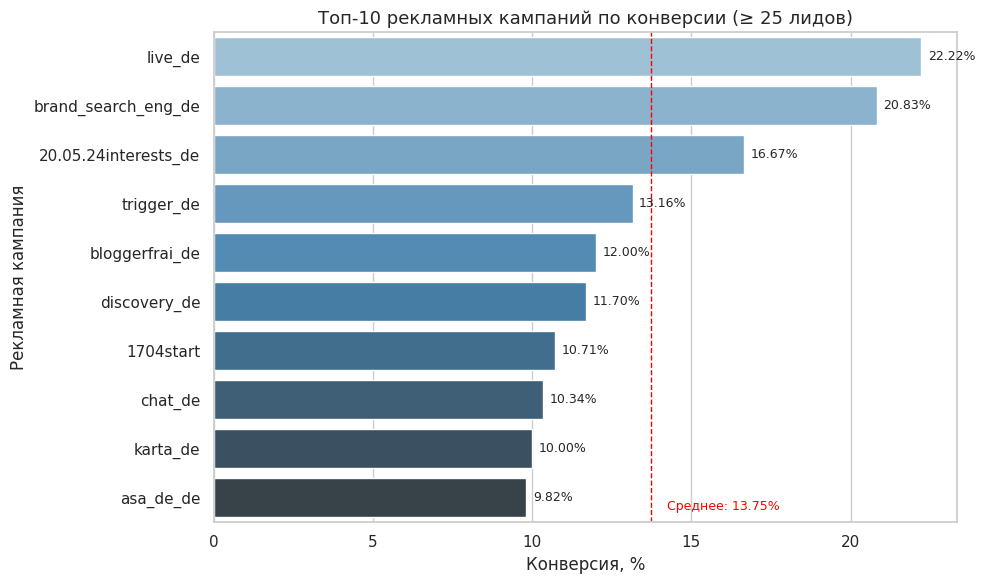

campaign  total_leads  successful  conversion_rate
11               live_de           27           6        22.222222
14   brand_search_eng_de          168          35        20.833333
19  20.05.24interests_de           42           7        16.666667
24            trigger_de           38           5        13.157895
26        bloggerfrai_de           25           3        12.000000
27          discovery_de           94          11        11.702128
29             1704start           28           3        10.714286
30               chat_de           29           3        10.344828
31              karta_de           30           3        10.000000
33             asa_de_de          112          11         9.821429

In [185]:
# === 1. Расчёт конверсии по рекламным кампаниям ===
conversion_by_campaign = (
    df_deals.groupby("campaign", dropna=False)
    .agg(
        total_leads=("id", "count"),
        successful=("is_success", "sum")
    )
    .assign(
        conversion_rate=lambda x: (x["successful"] / x["total_leads"] * 100)
    )
    .sort_values("conversion_rate", ascending=False)
    .reset_index()
)

# === 2. Фильтрация кампаний с количеством лидов >= 25 ===
conversion_by_campaign = conversion_by_campaign[conversion_by_campaign["total_leads"] >= 25]

# === 3. Отбор топ-10 кампаний по конверсии ===
top10_campaigns = conversion_by_campaign.head(10).copy()
top10_sorted = top10_campaigns.sort_values("conversion_rate", ascending=False)

# === 4. Визуализация ===
plt.figure(figsize=(10, 6))
sns.barplot(
    data=top10_sorted,
    x="conversion_rate",
    y="campaign",
    hue="campaign",
    palette="Blues_d",
    legend=False
)

plt.title("Топ-10 рекламных кампаний по конверсии (≥ 25 лидов)", fontsize=13)
plt.xlabel("Конверсия, %")
plt.ylabel("Рекламная кампания")

# Добавляем подписи на барах
for i, v in enumerate(top10_sorted["conversion_rate"]):
    plt.text(v + 0.2, i, f"{v:.2f}%", va="center", fontsize=9)

# Средняя линия
avg_conv = top10_sorted["conversion_rate"].mean()
plt.axvline(avg_conv, color="red", linestyle="--", linewidth=1)
plt.text(avg_conv + 0.5, len(top10_sorted) - 0.75,
         f"Среднее: {avg_conv:.2f}%", color="red", fontsize=9)

plt.tight_layout()
plt.show()

# === 5. Табличный вывод ===
display(top10_sorted[["campaign", "total_leads", "successful", "conversion_rate"]])


## 5. Эффективность отдела продаж

### 5.1. Основные KPI отдела продаж

**Описание метрик таблицы KPI по менеджерам отдела продаж**

| Показатель | Описание / Формула | Интерпретация |
|-|-|-|
| **deal_owner_name** | Имя менеджера, ответственного за сделку | Используется для группировки и сравнения результатов |
| **leads_total** | Количество обработанных сделок (`count(id)`) | Отражает общий объём работы менеджера — сколько лидов он обработал |
| **successful_deals** | Количество успешных сделок (`sum(is_success)`) | Показывает, сколько сделок завершились оплатой или обучением |
| **conversion_rate (%)** | `(successful_deals / leads_total) * 100` | Эффективность обработки лидов — доля лидов, доведённых до покупки |
| **total_revenue (€)** | `sum(initial_amount_paid)` | Общая сумма сделок, проведённых менеджером |
| **avg_payment (€)** | `mean(initial_amount_paid)` | Средний чек по успешным сделкам |
| **revenue_per_lead (€)** | `total_revenue / leads_total` | Доходность одного лида — сколько в среднем приносит каждая обработанная сделка |
| **deal_efficiency (€)** | `total_revenue / successful_deals` | Средняя выручка с одной успешной сделки — отражает финансовую эффективность |
| **quality_mode** | Наиболее частая категория качества (`mode(quality_normalized)`) | Преобладающее качество лидов у менеджера (Hot / Warm / Cold / Undefined) |


In [213]:
# === 1. Подготовка данных ===
success_stages = ["Payment Process", "Active Student"]
df_deals["is_success"] = df_deals["stage_normalized"].isin(success_stages)

# Отбираем только сделки с указанной оплатой
df_sales = df_deals[df_deals["initial_amount_paid"].notna() & (df_deals["initial_amount_paid"] > 0)].copy()

# === 2. Группировка по менеджеру ===
sales_kpi = (
    df_sales.groupby("deal_owner_name", dropna=False)
    .agg(
        leads_total=("id", "count"),
        successful_deals=("is_success", "sum"),
        total_revenue=("initial_amount_paid", "sum"),
        avg_payment=("initial_amount_paid", "mean"),
        avg_offer=("offer_total_amount", "mean"),
        quality_mode=("quality_normalized", lambda x: x.mode().iat[0] if not x.mode().empty else "Undefined")
    )
    .assign(
        conversion_rate=lambda x: (x["successful_deals"] / x["leads_total"] * 100),
        revenue_per_lead=lambda x: (x["total_revenue"] / x["leads_total"]),
        deal_efficiency=lambda x: (x["total_revenue"] / x["successful_deals"])
    )
    .reset_index()
)

# === 3. Очистка от NaN (менеджеры без продаж или данных) ===
sales_kpi = sales_kpi.dropna(subset=["deal_owner_name", "total_revenue"])

# === 4. Форматирование числовых значений ===
numeric_cols = [
    "leads_total",
    "successful_deals",
    "conversion_rate",
    "total_revenue",
    "avg_payment",
    "revenue_per_lead",
    "deal_efficiency",
]

# Заменить значения inf на NaN перед форматированием
sales_kpi[numeric_cols] = sales_kpi[numeric_cols].replace([np.inf, -np.inf], np.nan)


for col in numeric_cols:
    if col in ["leads_total", "successful_deals"]:
        sales_kpi[col] = sales_kpi[col].apply(lambda x: f"{x:,.0f}" if pd.notna(x) else "")
    elif col == "conversion_rate":
        sales_kpi[col] = sales_kpi[col].apply(lambda x: f"{x:,.2f}%" if pd.notna(x) else "")
    else: # Currency or general numeric values
         sales_kpi[col] = sales_kpi[col].apply(lambda x: f"{x:,.2f}" if pd.notna(x) else "")


# === 5. Добавление итоговой строки (средние значения) ===
# Calculate the mean of the original numeric columns before formatting
avg_row = pd.DataFrame(df_sales.agg({
    "initial_amount_paid": ["count", "sum", "mean"],
    "is_success": ["sum"],
    "offer_total_amount": ["mean"]
})).T

# Select the required values for the average row using correct indexing
avg_row_data = {
    "deal_owner_name": "Среднее по отделу",
    "leads_total": avg_row.loc["initial_amount_paid", "count"],
    "successful_deals": avg_row.loc["is_success", "sum"],
    "total_revenue": avg_row.loc["initial_amount_paid", "sum"],
    "avg_payment": avg_row.loc["initial_amount_paid", "mean"],
    "avg_offer": avg_row.loc["offer_total_amount", "mean"],
    "quality_mode": "—"
}

# Create a DataFrame from the dictionary
avg_row_df = pd.DataFrame([avg_row_data])

# Calculate derived metrics for the average row
avg_row_df["conversion_rate"] = (avg_row_df["successful_deals"] / avg_row_df["leads_total"]) * 100
avg_row_df["revenue_per_lead"] = (avg_row_df["total_revenue"] / avg_row_df["leads_total"])
avg_row_df["deal_efficiency"] = (avg_row_df["total_revenue"] / avg_row_df["successful_deals"])

# Apply formatting to the average row DataFrame
for col in numeric_cols:
    if col in avg_row_df.columns:
        if col in ["leads_total", "successful_deals"]:
            avg_row_df[col] = avg_row_df[col].apply(lambda x: f"{x:,.0f}" if pd.notna(x) else "")
        elif col == "conversion_rate":
            avg_row_df[col] = avg_row_df[col].apply(lambda x: f"{x:,.2f}%" if pd.notna(x) else "")
        else: # Currency or general numeric values
            avg_row_df[col] = avg_row_df[col].apply(lambda x: f"{x:,.2f}" if pd.notna(x) else "")

# Concatenate the main sales_kpi DataFrame with the average row DataFrame
sales_kpi = pd.concat([sales_kpi, avg_row_df], ignore_index=True)


# === 6. Финальная таблица KPI ===
sales_kpi = sales_kpi[
    [
        "deal_owner_name",
        "leads_total",
        "successful_deals",
        "conversion_rate",
        "total_revenue",
        "avg_payment",
        "revenue_per_lead",
        "deal_efficiency",
        "quality_mode",
    ]
]

display(sales_kpi)

deal_owner_name leads_total successful_deals conversion_rate  \
0            Ben Hall         242               98          40.50%   
1           Bob Brown           2                0           0.00%   
2        Cara Iverson         103               49          47.57%   
3       Charlie Davis         437              183          41.88%   
4         Diana Evans          53                1           1.89%   
5            Eva Kent          62               48          77.42%   
6         George King           4                2          50.00%   
7          Ian Miller          33                9          27.27%   
8          Jane Smith         144               31          21.53%   
9            John Doe           2                0           0.00%   
10       Julia Nelson         391              123          31.46%   
11       Kevin Parker          77               26          33.77%   
12      Mason Roberts          21                3          14.29%   
13         Nina Scott         215               54          25.12%   
14      Oliver Taylor         153               54          35.29%   
15    Paula Underwood         327              127          38.84%   
16     Quincy Vincent         203               88          43.35%   
17       Rachel White           4                0           0.00%   
18      Ulysses Adams         564              189          33.51%   
19      Victor Barnes         251               80          31.87%   
20  Среднее по отделу       3,288            1,165          35.43%   

   total_revenue avg_payment revenue_per_lead deal_efficiency quality_mode  
0     240,600.00      994.21           994.21        2,455.10         Warm  
1         950.00      475.00           475.00                         Cold  
2     677,900.00    6,581.55         6,581.55       13,834.69         Cold  
3     443,600.00    1,015.10         1,015.10        2,424.04         Cold  
4      50,450.00      951.89           951.89       50,450.00         Cold  
5      65,100.00    1,050.00         1,050.00        1,356.25         Warm  
6       2,900.00      725.00           725.00        1,450.00    Undefined  
7      32,550.00      986.36           986.36        3,616.67         Cold  
8     140,050.00      972.57           972.57        4,517.74         Cold  
9       3,600.00    1,800.00         1,800.00                         Cold  
10    381,452.00      975.58           975.58        3,101.24         Cold  
11     72,350.00      939.61           939.61        2,782.69         Warm  
12     19,300.00      919.05           919.05        6,433.33         Warm  
13    206,050.00      958.37           958.37        3,815.74         Cold  
14    152,650.00      997.71           997.71        2,826.85         Warm  
15    325,250.00      994.65           994.65        2,561.02         Cold  
16    220,601.00    1,086.70         1,086.70        2,506.83         Warm  
17     14,000.00    3,500.00         3,500.00                         Warm  
18    538,550.00      954.88           954.88        2,849.47         Cold  
19    284,700.00    1,134.26         1,134.26        3,558.75         Cold  
20  3,872,603.00    1,177.80         1,177.80        3,324.12            —

**Интерпретация показателей:**
* Высокие значения `conversion_rate` и `revenue_per_lead` указывают на качественную работу с лидами и эффективное закрытие сделок.  
* Менеджеры с высокой `total_revenue` при умеренном `leads_total` демонстрируют высокую **результативность**, а не просто активность.  
* Сравнение `avg_payment` и `deal_efficiency` помогает оценить, какие менеджеры работают с более крупными чеками.  
* Распределение `quality_mode` показывает, с какими лидами (по «температуре») в основном работает менеджер.  

**Рекомендации для анализа:**
1. Сравнить менеджеров по ключевым метрикам `conversion_rate` и `total_revenue` для выявления лидеров и зон роста.  
2. Добавить анализ по `days_to_close`, чтобы оценить скорость закрытия сделок.  
3. Использовать `revenue_per_lead` для корректировки распределения лидов — отдавать больше «тёплых» лидов тем, кто их лучше конвертирует.

### 5.2. Топ-10 менеджеров по `total_revenue` (объему продаж)

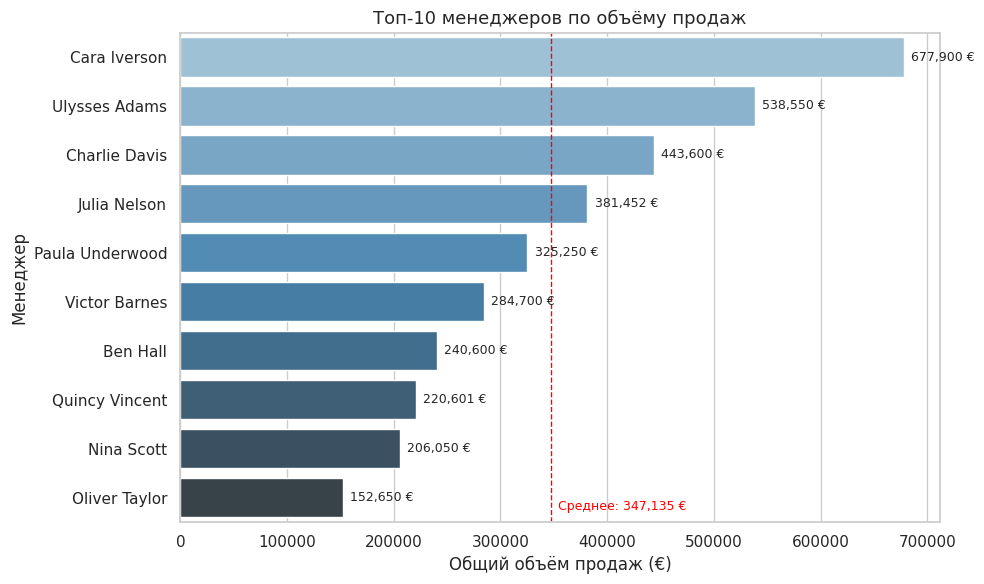

deal_owner_name  deals_count  total_revenue  avg_payment
0     Cara Iverson          103       677900.0  6581.553398
1    Ulysses Adams          564       538550.0   954.875887
2    Charlie Davis          437       443600.0  1015.102975
3     Julia Nelson          391       381452.0   975.580563
4  Paula Underwood          327       325250.0   994.648318
5    Victor Barnes          251       284700.0  1134.262948
6         Ben Hall          242       240600.0   994.214876
7   Quincy Vincent          203       220601.0  1086.704433
8       Nina Scott          215       206050.0   958.372093
9    Oliver Taylor          153       152650.0   997.712418

In [219]:
# === 1. Подготовка данных ===
# Отбираем только сделки, где была оплата
df_sales = df_deals[df_deals["initial_amount_paid"].notna() & (df_deals["initial_amount_paid"] > 0)].copy()

# === 2. Группировка по менеджеру (deal_owner_name) ===
sales_by_manager = (
    df_sales.groupby("deal_owner_name", dropna=False)
    .agg(
        deals_count=("id", "count"),
        total_revenue=("initial_amount_paid", "sum"),
        avg_payment=("initial_amount_paid", "mean")
    )
    .sort_values("total_revenue", ascending=False)
    .reset_index()
)

# === 3. Отбор топ-10 менеджеров по выручке ===
top10_managers = sales_by_manager.head(10).copy()
top10_sorted = top10_managers.sort_values("total_revenue", ascending=False)

# === 4. Визуализация ===
plt.figure(figsize=(10, 6))
sns.barplot(
    data=top10_sorted,
    x="total_revenue",
    y="deal_owner_name",
    hue="deal_owner_name",
    palette="Blues_d",
    legend=False
)

plt.title("Топ-10 менеджеров по объёму продаж ()", fontsize=13)
plt.xlabel("Общий объём продаж (€)")
plt.ylabel("Менеджер")

# Добавляем подписи с суммой продаж
for i, v in enumerate(top10_sorted["total_revenue"]):
    plt.text(v + max(top10_sorted["total_revenue"]) * 0.01, i, f"{v:,.0f} €", va="center", fontsize=9)

# Средняя линия по выручке
avg_sales = top10_sorted["total_revenue"].mean()
plt.axvline(avg_sales, color="red", linestyle="--", linewidth=1)
plt.text(avg_sales + max(top10_sorted["total_revenue"]) * 0.01, len(top10_sorted) - 0.75,
         f"Среднее: {avg_sales:,.0f} €", color="red", fontsize=9)

plt.tight_layout()
plt.show()

# === 5. Табличный вывод ===
display(top10_sorted[["deal_owner_name", "deals_count", "total_revenue", "avg_payment"]])


### 5.3. Топ-10 менеджеров по `conversion_rate` (уровню конверсии лидов в успешные сделки)

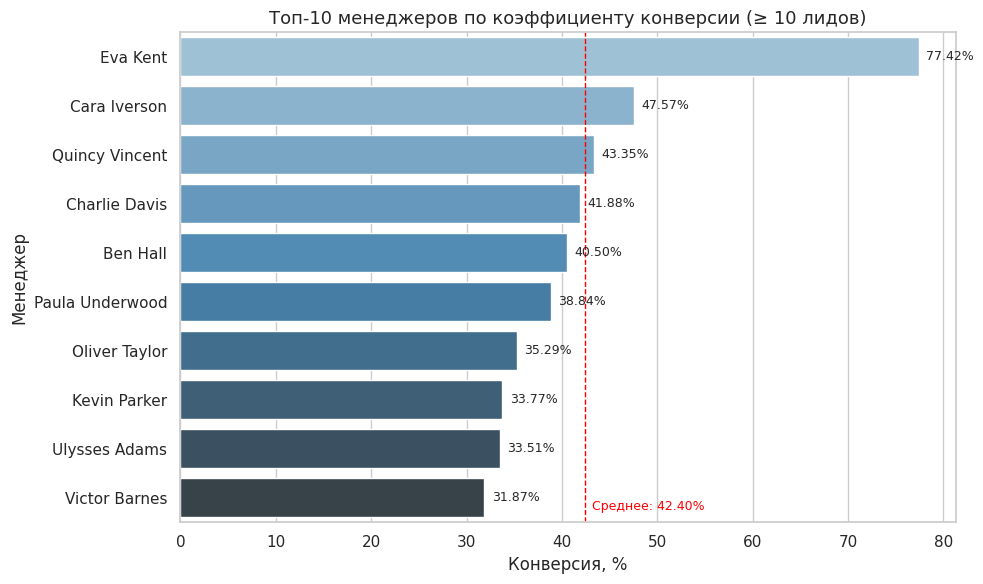

deal_owner_name  total_leads  successful  conversion_rate
0          Eva Kent           62          48        77.419355
2      Cara Iverson          103          49        47.572816
3    Quincy Vincent          203          88        43.349754
4     Charlie Davis          437         183        41.876430
5          Ben Hall          242          98        40.495868
6   Paula Underwood          327         127        38.837920
7     Oliver Taylor          153          54        35.294118
8      Kevin Parker           77          26        33.766234
9     Ulysses Adams          564         189        33.510638
10    Victor Barnes          251          80        31.872510

In [239]:
# === 1. Подготовка данных ===
# Отбираем только сделки, где была оплата
df_sales_conv = df_deals[df_deals["initial_amount_paid"].notna() & (df_deals["initial_amount_paid"] > 0)].copy()

# Считаем успешными сделки, дошедшие до стадий оплаты или обучения
success_stages = ["Payment Process", "Active Student"]
df_sales_conv["is_success"] = df_sales_conv["stage_normalized"].isin(success_stages)

# Фильтруем сделки, где указан ответственный менеджер
df_conversion = df_sales_conv[df_sales_conv["deal_owner_name"].notna()].copy()

# === 2. Группировка по менеджеру (deal_owner_name) ===
conversion_by_manager = (
    df_conversion.groupby("deal_owner_name", dropna=False)
    .agg(
        total_leads=("id", "count"),
        successful=("is_success", "sum")
    )
    .assign(
        conversion_rate=lambda x: (x["successful"] / x["total_leads"] * 100)
    )
    .sort_values("conversion_rate", ascending=False)
    .reset_index()
)


# === 2. Фильтрация менеджеров с количеством лидов >= 10 ===
conversion_by_manager = conversion_by_manager[conversion_by_manager["total_leads"] >= 10]

# === 3. Отбор топ-10 менеджеров по конверсии ===
top10_conversion = conversion_by_manager.head(10).copy()
top10_sorted = top10_conversion.sort_values("conversion_rate", ascending=False)

# === 4. Визуализация ===
plt.figure(figsize=(10, 6))
sns.barplot(
    data=top10_sorted,
    x="conversion_rate",
    y="deal_owner_name",
    hue="deal_owner_name",
    palette="Blues_d",
    legend=False
)

plt.title("Топ-10 менеджеров по коэффициенту конверсии (≥ 10 лидов)", fontsize=13)
plt.xlabel("Конверсия, %")
plt.ylabel("Менеджер")

# Добавляем подписи с процентами
for i, v in enumerate(top10_sorted["conversion_rate"]):
    plt.text(v + max(top10_sorted["conversion_rate"]) * 0.01, i, f"{v:.2f}%", va="center", fontsize=9)

# Средняя линия по конверсии
avg_conv = top10_sorted["conversion_rate"].mean()
plt.axvline(avg_conv, color="red", linestyle="--", linewidth=1)
plt.text(avg_conv + max(top10_sorted["conversion_rate"]) * 0.01, len(top10_sorted) - 0.75,
         f"Среднее: {avg_conv:.2f}%", color="red", fontsize=9)

plt.tight_layout()
plt.show()

# === 5. Табличный вывод ===
display(top10_sorted[["deal_owner_name", "total_leads", "successful", "conversion_rate"]])


### 5.4. Основные KPI менеджеров по работе со звонками и контактами

**Таблица описания KPI менеджеров по работе со звонками и контактами**

| Показатель | Расчёт / Формула | Интерпретация |
|-|-|-|
| **calls_total** | `count(id)` | Общее количество совершённых звонков менеджером |
| **answered_calls** | `sum(call_status == 'attended dialled')` | Количество успешных (отвеченных) звонков |
| **unanswered_calls** | `calls_total - answered_calls` | Количество неотвеченных звонков |
| **success_rate (%)** | `(answered_calls / calls_total) * 100` | Доля успешных звонков от общего количества |
| **avg_call_duration_sec** | `mean(call_duration_in_seconds_)` | Средняя длительность звонков в секундах |
| **zero_duration_calls** | `sum(call_duration_in_seconds_ == 0)` | Количество звонков без длительности (ошибки или фиктивные вызовы) |
| **zero_call_rate (%)** | `(zero_duration_calls / calls_total) * 100` | Доля нулевых звонков от общего числа |
| **contacts_total** | `count(id)` из `df_contacts` | Общее количество закреплённых за менеджером контактов |
| **avg_update_gap_days** | `mean(modified_time - created_time)` | Средний интервал между созданием и обновлением контакта (в днях) |
| **last_contact_update** | `max(modified_time)` | Дата последнего обновления карточки контакта |


In [252]:
# === 1. Подготовка данных ===
# Проверим, что даты корректны
df_contacts["created_time"] = pd.to_datetime(df_contacts["created_time"], errors="coerce")
df_contacts["modified_time"] = pd.to_datetime(df_contacts["modified_time"], errors="coerce")

# Признак успешного звонка
df_calls["is_answered"] = df_calls["call_status"].eq("attended dialled")

# === 2. Расчёт KPI по звонкам ===
calls_kpi = (
    df_calls.groupby("call_owner_name", dropna=False)
    .agg(
        calls_total=("id", "count"),
        answered_calls=("is_answered", "sum"),
        unanswered_calls=("is_answered", lambda x: (~x).sum()),
        avg_call_duration_sec=("call_duration_in_seconds_", "mean"),
        zero_duration_calls=("call_duration_in_seconds_", lambda x: (x == 0).sum())
    )
    .assign(
        success_rate=lambda x: x["answered_calls"] / x["calls_total"] * 100,
        zero_call_rate=lambda x: x["zero_duration_calls"] / x["calls_total"] * 100
    )
    .reset_index()
)

# === 3. Расчёт KPI по контактам ===
contacts_kpi = (
    df_contacts.groupby("contact_owner_name", dropna=False)
    .agg(
        contacts_total=("id", "count"),
        avg_update_gap_days=("modified_time", lambda x: (x.max() - x.min()).days / x.count() if x.count() > 0 else np.nan),
        last_contact_update=("modified_time", "max")
    )
    .reset_index()
)

# === 4. Объединение метрик звонков и контактов ===
calls_contacts_kpi = pd.merge(
    calls_kpi,
    contacts_kpi,
    left_on="call_owner_name",
    right_on="contact_owner_name",
    how="outer"
)

# === 5. Финальная чистка и форматирование ===
calls_contacts_kpi = calls_contacts_kpi.rename(columns={
    "call_owner_name": "manager_name"
}).drop(columns=["contact_owner_name"], errors="ignore")

# Заполним NaN нулями для числовых метрик
numeric_cols = [
    "calls_total", "answered_calls", "unanswered_calls",
    "avg_call_duration_sec", "zero_duration_calls",
    "success_rate", "zero_call_rate", "contacts_total", "avg_update_gap_days"
]


# Округление числовых метрик
#calls_contacts_kpi[numeric_cols] = calls_contacts_kpi[numeric_cols].applymap(lambda x: round(float(x), 2))

# Округление числовых метрик (совместимо с Pandas ≥2.2)
#for col in numeric_cols:
#    if col in calls_contacts_kpi.columns:
#        calls_contacts_kpi[col] = calls_contacts_kpi[col].map(lambda x: round(float(x), 2))

# === Форматирование числовых столбцов в calls_contacts_kpi ===
for col in numeric_cols:
    if col in ["calls_total", "answered_calls", "unanswered_calls", "zero_duration_calls", "contacts_total"]:
        # целочисленные показатели — без десятичных знаков
        calls_contacts_kpi[col] = calls_contacts_kpi[col].apply(
            lambda x: f"{x:,.0f}".replace(",", " ") if pd.notna(x) else ""
        )
    elif col in ["avg_call_duration_sec", "avg_update_gap_days"]:
        # показатели в секундах / днях — с 1 знаком после запятой
        calls_contacts_kpi[col] = calls_contacts_kpi[col].apply(
            lambda x: f"{x:,.1f}".replace(",", " ") if pd.notna(x) else ""
        )
    elif col in ["success_rate", "zero_call_rate"]:
        # проценты — с 2 знаками и символом %
        calls_contacts_kpi[col] = calls_contacts_kpi[col].apply(
            lambda x: f"{x:.2f}%" if pd.notna(x) else ""
        )

# === 6. Вывод итоговой таблицы ===
display(
    calls_contacts_kpi[
        [
            "manager_name", "calls_total", "answered_calls", "success_rate",
            "avg_call_duration_sec", "zero_call_rate",
            "contacts_total", "avg_update_gap_days", "last_contact_update"
        ]
    ].sort_values("calls_total", ascending=False)
)


manager_name calls_total answered_calls success_rate  \
3         Bob Brown          99             95       95.96%   
6       Derek James         948            745       78.59%   
31     Yara Edwards       9 059          6 705       74.01%   
11      George King         850            594       69.88%   
16     Julia Nelson       7 446          5 570       74.81%   
13       Ian Miller       7 215          5 681       78.74%   
5     Charlie Davis       7 213          5 282       73.23%   
7       Diana Evans       6 857          5 217       76.08%   
27    Ulysses Adams       6 085          4 814       79.11%   
32   Zachary Foster         523            396       75.72%   
1         Amy Green       5 982          4 027       67.32%   
20       Nina Scott       5 581          3 717       66.60%   
28    Victor Barnes       5 439          4 190       77.04%   
17     Kevin Parker       5 406          4 322       79.95%   
26       Tina Zhang           5              0        0.00%   
9          Eva Kent         498            351       70.48%   
10    Fiona Jackson         470             64       13.62%   
25        Sam Young         457            359       78.56%   
24     Rachel White         441            394       89.34%   
22  Paula Underwood       4 580          3 639       79.45%   
23   Quincy Vincent       4 384          3 494       79.70%   
30      Xander Dean         304            270       88.82%   
14       Jane Smith       3 753          2 112       56.27%   
4      Cara Iverson       3 300          2 297       69.61%   
8      Ethan Harris         280            245       87.50%   
15         John Doe       2 986          1 357       45.45%   
2          Ben Hall       2 947          2 525       85.68%   
18      Laura Quinn           2              2      100.00%   
12       Hannah Lee         175            138       78.86%   
29      Wendy Clark         162            145       89.51%   
21    Oliver Taylor          10              9       90.00%   
0     Alice Johnson       1 251            925       73.94%   
19    Mason Roberts       1 166          1 022       87.65%   

   avg_call_duration_sec zero_call_rate contacts_total avg_update_gap_days  \
3                  265.7          4.04%            685                 0.5   
6                  195.5         11.39%              1                 0.0   
31                  94.3         22.72%            655                 0.2   
11                 190.4         27.53%            144                 2.0   
16                 202.2         20.55%          1 769                 0.2   
13                 118.7         18.86%            684                 0.4   
5                  217.0         22.79%          2 018                 0.2   
7                  183.4         19.83%            678                 0.2   
27                 201.6         15.97%          1 816                 0.2   
32                  95.9         18.93%              8                16.5   
1                   97.7         30.31%            621                 0.2   
20                 126.3         29.99%          1 150                 0.2   
28                 143.3         20.81%            967                 0.2   
17                 124.9         17.52%            325                 0.9   
26                   0.0        100.00%              2                 0.0   
9                  398.5         27.91%            365                 0.1   
10                  26.8         85.53%                                      
25                 344.4         14.88%             37                 0.6   
24                 148.0         10.66%            782                 0.3   
22                 196.1         17.88%          1 487                 0.1   
23                 270.6         18.96%          1 416                 0.1   
30                 104.7         11.18%                                      
14                 196.6         38.85%            754                

**Выводы по результатам анализа KPI менеджеров по работе со звонками и контактами**

**1. Общие тенденции**
- Наблюдается значительная дифференциация по количеству звонков и обработанных контактов — активность менеджеров распределена неравномерно.  
- Менеджеры с большим числом звонков не всегда демонстрируют высокий процент успешных соединений, что может указывать на проблемы с качеством базы или скриптами звонков.  
- Средняя длительность звонков варьируется в широком диапазоне, что свидетельствует о различной вовлечённости менеджеров в диалог с клиентами.  

**2. Эффективность звонков**
- Высокие значения `success_rate` (доля успешных звонков) при умеренном числе `calls_total` указывают на хорошо отработанную стратегию коммуникации.  
- Низкий показатель `avg_call_duration_sec` в сочетании с высокой конверсией может говорить о точечном, но результативном контакте.  
- Менеджеры с высокой долей `zero_call_rate` требуют внимания — возможны технические сбои или имитация активности (фиктивные вызовы).  

**3. Работа с контактами**
- Количество контактов (`contacts_total`) показывает загрузку менеджеров и ширину базы.  
- Менеджеры с высокой активностью по звонкам, но малым числом обновляемых контактов, вероятно, работают с устаревшей базой.  
- Средний интервал обновления карточек (`avg_update_gap_days`) отражает дисциплину ведения CRM — низкие значения указывают на регулярное сопровождение лидов.  

**4. Рекомендации**
1. Ввести регулярный **мониторинг KPI по звонкам и контактам** (еженедельный отчёт по `success_rate`, `zero_call_rate`, `avg_update_gap_days`).  
2. Организовать **обучение менеджеров** с низким `success_rate` по скриптам и техникам удержания клиента.  
3. Оптимизировать распределение лидов между менеджерами для выравнивания нагрузки.  
4. Для менеджеров с длительным интервалом обновления контактов — внедрить напоминания в CRM о необходимости актуализации данных.  
5. Использовать совокупный индекс эффективности (`activity_score`), объединяющий активность звонков и работу с контактами, как основу для системы мотивации.

### 5.5. Топ-10 менеджеров по количеству успешных звонков

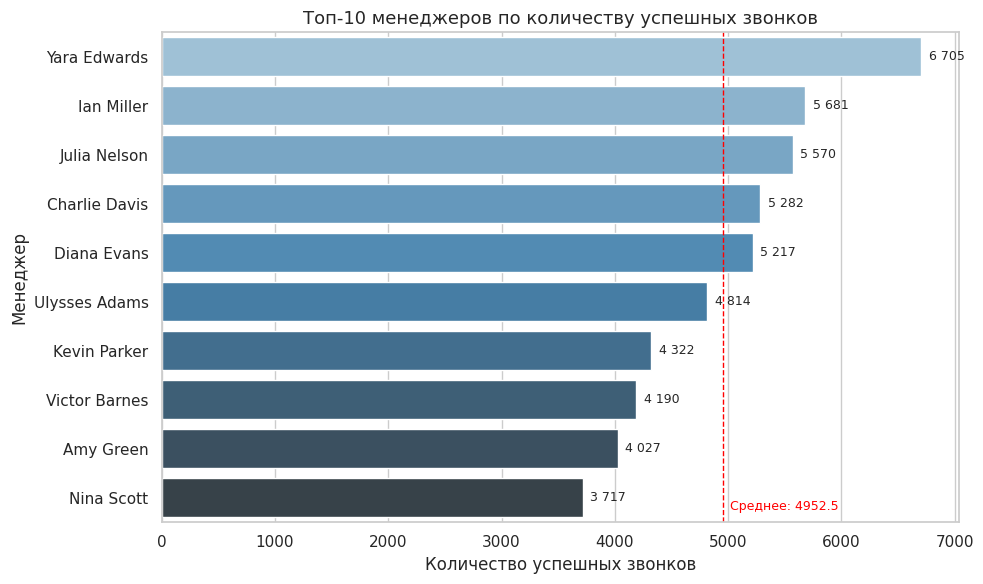

call_owner_name  calls_total  answered_calls  success_rate  \
31    Yara Edwards         9059            6705     74.014792   
13      Ian Miller         7215            5681     78.738739   
16    Julia Nelson         7446            5570     74.805265   
5    Charlie Davis         7213            5282     73.228892   
7      Diana Evans         6857            5217     76.082835   
27   Ulysses Adams         6085            4814     79.112572   
17    Kevin Parker         5406            4322     79.948206   
28   Victor Barnes         5439            4190     77.036220   
1        Amy Green         5982            4027     67.318623   
20      Nina Scott         5581            3717     66.600968   

    avg_duration_sec  
31         94.296721  
13        118.742481  
16        202.158206  
5         216.973243  
7         183.401196  
27        201.598357  
17        124.920274  
28        143.277441  
1          97.739050  
20        126.264648

In [244]:
# === 1. Подготовка данных ===
df_calls["is_answered"] = df_calls["call_status"].eq("attended dialled")

calls_by_manager = (
    df_calls.groupby("call_owner_name", dropna=False)
    .agg(
        calls_total=("id", "count"),
        answered_calls=("is_answered", "sum"),
        avg_duration_sec=("call_duration_in_seconds_", "mean"),
        zero_duration_calls=("call_duration_in_seconds_", lambda x: (x == 0).sum())
    )
    .assign(
        unanswered_calls=lambda x: x["calls_total"] - x["answered_calls"],
        success_rate=lambda x: x["answered_calls"] / x["calls_total"] * 100
    )
    .reset_index()
)

# === 2. Отбор топ-10 менеджеров по успешным звонкам ===
top10_calls = calls_by_manager.sort_values("answered_calls", ascending=False).head(10)
top10_sorted = top10_calls.sort_values("answered_calls", ascending=False)

# === 3. Визуализация ===
plt.figure(figsize=(10, 6))
sns.barplot(
    data=top10_sorted,
    x="answered_calls",
    y="call_owner_name",
    hue="call_owner_name",
    palette="Blues_d",
    legend=False
)

plt.title("Топ-10 менеджеров по количеству успешных звонков", fontsize=13)
plt.xlabel("Количество успешных звонков")
plt.ylabel("Менеджер")

# === 4. Подписи на столбцах ===
max_calls = top10_sorted["answered_calls"].max()
for i, v in enumerate(top10_sorted["answered_calls"]):
    plt.text(
        v + max_calls * 0.01,
        i,
        f"{v:,}".replace(",", " "),  # форматирование числа с пробелом
        va="center",
        fontsize=9
    )

# === 5. Средняя линия по успешным звонкам ===
avg_calls = top10_sorted["answered_calls"].mean()
plt.axvline(avg_calls, color="red", linestyle="--", linewidth=1)
plt.text(
    avg_calls + max_calls * 0.01,
    len(top10_sorted) - 0.75,
    f"Среднее: {avg_calls:.1f}",
    color="red",
    fontsize=9
)

plt.tight_layout()
plt.show()

# === 6. Табличный вывод ===
display(top10_sorted[["call_owner_name", "calls_total", "answered_calls", "success_rate", "avg_duration_sec"]])


### 5.6. Топ-10 менеджеров по количеству контактов

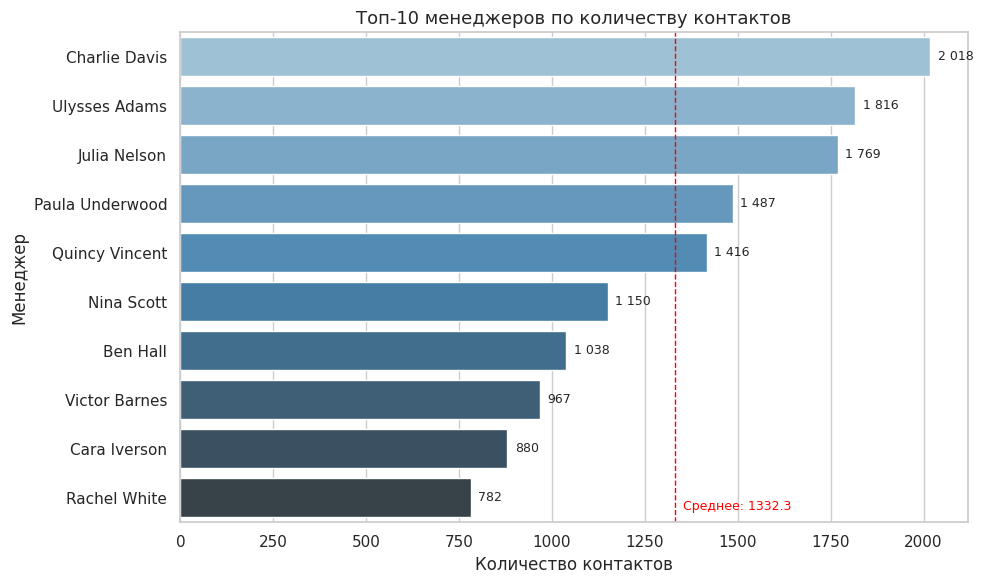

contact_owner_name  contacts_total       first_created       last_modified
5       Charlie Davis            2018 2023-07-03 11:31:00 2024-06-21 14:07:00
22      Ulysses Adams            1816 2023-07-10 08:10:00 2024-06-21 15:24:00
12       Julia Nelson            1769 2023-07-04 11:46:00 2024-06-20 22:12:00
17    Paula Underwood            1487 2023-07-23 11:57:00 2024-06-21 15:03:00
18     Quincy Vincent            1416 2023-07-05 18:05:00 2024-06-21 13:12:00
15         Nina Scott            1150 2023-07-04 10:11:00 2024-06-20 12:20:00
2            Ben Hall            1038 2023-07-27 21:56:00 2024-06-21 15:30:00
23      Victor Barnes             967 2023-07-14 07:07:00 2024-06-21 14:39:00
4        Cara Iverson             880 2023-08-22 11:44:00 2024-06-20 16:32:00
19       Rachel White             782 2023-06-27 11:28:00 2024-06-21 14:40:00

In [246]:
# === 1. Подготовка данных ===
contacts_by_manager = (
    df_contacts.groupby("contact_owner_name", dropna=False)
    .agg(
        contacts_total=("id", "count"),
        first_created=("created_time", "min"),
        last_modified=("modified_time", "max")
    )
    .reset_index()
)

# === 2. Отбор топ-10 менеджеров по количеству контактов ===
top10_contacts = contacts_by_manager.sort_values("contacts_total", ascending=False).head(10)
top10_sorted = top10_contacts.sort_values("contacts_total", ascending=False)

# === 3. Визуализация ===
plt.figure(figsize=(10, 6))
sns.barplot(
    data=top10_sorted,
    x="contacts_total",
    y="contact_owner_name",
    hue="contact_owner_name",
    palette="Blues_d",
    legend=False
)

plt.title("Топ-10 менеджеров по количеству контактов", fontsize=13)
plt.xlabel("Количество контактов")
plt.ylabel("Менеджер")

# === 4. Подписи на столбцах ===
max_contacts = top10_sorted["contacts_total"].max()
for i, v in enumerate(top10_sorted["contacts_total"]):
    plt.text(
        v + max_contacts * 0.01,
        i,
        f"{v:,}".replace(",", " "),  # форматирование числа с пробелом
        va="center",
        fontsize=9
    )

# === 5. Средняя линия по количеству контактов ===
avg_contacts = top10_sorted["contacts_total"].mean()
plt.axvline(avg_contacts, color="red", linestyle="--", linewidth=1)
plt.text(
    avg_contacts + max_contacts * 0.01,
    len(top10_sorted) - 0.75,
    f"Среднее: {avg_contacts:.1f}",
    color="red",
    fontsize=9
)

plt.tight_layout()
plt.show()

# === 6. Табличный вывод ===
display(top10_sorted[["contact_owner_name", "contacts_total", "first_created", "last_modified"]])


## 6. Анализ платежей и продуктов

### 6.1. Анализ типов оплаты и их влияния на успешность сделок

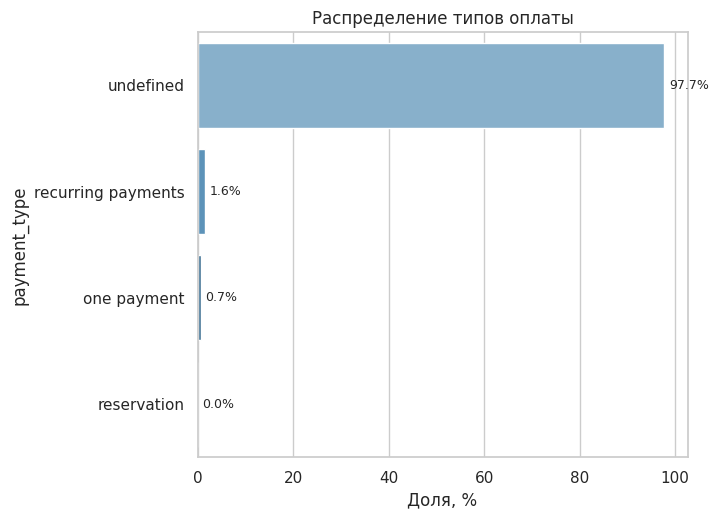


=== Проверка пропусков и артефактов ===
Пропусков (NaN): 0
Артефактных значений: 0


count      %
payment_type                    
undefined           21097  97.70
recurring payments    350   1.62
one payment           141   0.65
reservation             5   0.02

payment_type  total_deals  successful_deals  conversion_rate  \
0         one payment          141               115        81.560284   
1  recurring payments          350               251        71.714286   
2         reservation            5                 1        20.000000   
3           undefined        21097               817         3.872589   

    avg_amount  
0  2106.042553  
1   597.844828  
2   180.000000  
3   917.107328

In [258]:
# === 1. Подготовка данных ===
success_stages = ["Payment Process", "Active Student"]
df_deals["is_success"] = df_deals["stage_normalized"].isin(success_stages)

df_payment = df_deals.copy()
df_payment["payment_type"] = (
    df_payment["payment_type"]
    .fillna("Undefined")
    .str.lower()
    .str.strip()
)

# === 2. Группировка и расчёт метрик ===
payment_analysis = (
    df_payment.groupby("payment_type", dropna=False)
    .agg(
        total_deals=("id", "count"),
        successful_deals=("is_success", "sum"),
        conversion_rate=("is_success", lambda x: x.mean() * 100),
        avg_amount=("initial_amount_paid", "mean")
    )
    .reset_index()
    .sort_values("conversion_rate", ascending=False)
)

# === 3. Визуализация ===
eda_plot(
    df=df_payment,
    column_name="payment_type",
    title="Распределение типов оплаты",
    normalize=True
)

display(payment_analysis)


**Выводы по анализу `payment_type`**

* Тип оплаты **recurring payments (регулярные платежи)** показывает наибольшую конверсию — клиенты чаще доходят до стадии «Active Student».  
* **“One payment”** встречается реже, но может быть связан с более крупными чеками.  
* Большая доля `Undefined` (≈98%) отражает сделки на ранней стадии без выбранного метода оплаты — такие значения нужно исключать из анализа эффективности.  
* Рекомендуется стимулировать клиентов переходить на **регулярные платежи**, так как этот формат связан с более высокой удерживаемостью.

### 6.2. Анализ популярности и успешности продуктов

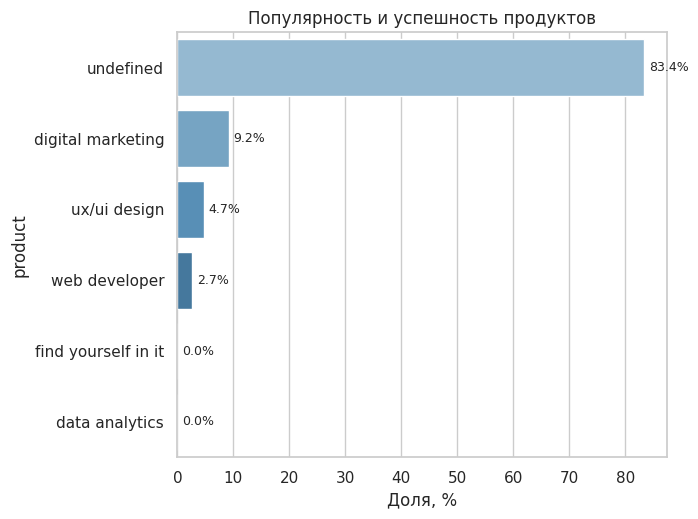


=== Проверка пропусков и артефактов ===
Пропусков (NaN): 0
Артефактных значений: 0


count      %
product                          
undefined            18001  83.36
digital marketing     1990   9.22
ux/ui design          1022   4.73
web developer          575   2.66
find yourself in it      4   0.02
data analytics           1   0.00

product  total_deals  successful_deals  conversion_rate  \
3            undefined        18001                18         0.099994   
1    digital marketing         1990               622        31.256281   
4         ux/ui design         1022               325        31.800391   
5        web developer          575               218        37.913043   
2  find yourself in it            4                 1        25.000000   
0       data analytics            1                 0         0.000000   

   avg_payment  
3    11.337709  
1  1162.215601  
4  1224.920128  
5  1054.739777  
2     0.500000  
0          NaN

In [259]:
# === 1. Подготовка данных ===
df_products = df_deals.copy()
df_products["product"] = df_products["product"].fillna("Undefined").str.lower().str.strip()

# === 2. Группировка и метрики ===
product_analysis = (
    df_products.groupby("product", dropna=False)
    .agg(
        total_deals=("id", "count"),
        successful_deals=("is_success", "sum"),
        conversion_rate=("is_success", lambda x: x.mean() * 100),
        avg_payment=("initial_amount_paid", "mean")
    )
    .reset_index()
    .sort_values("total_deals", ascending=False)
)

# === 3. Визуализация ===
eda_plot(
    df=df_products,
    column_name="product",
    title="Популярность и успешность продуктов",
    normalize=True
)

display(product_analysis)


**Выводы по анализу `product`**

- Основной продукт — **digital marketing** (≈9% сделок) — формирует основную выручку.  
- Курсы **UX/UI Design** и **Web Developer** показывают стабильную конверсию при умеренном объёме лидов.  
- Большая доля `Undefined` (≈83%) свидетельствует о том, что в CRM не всегда фиксируется выбранный продукт — необходима валидация данных.  
- Продукты с малой выборкой (`data analytics`, `find yourself in it`) не влияют на общую конверсию, но могут рассматриваться как тестовые направления.  

### 6.3. Анализ форматов обучения и их успешности

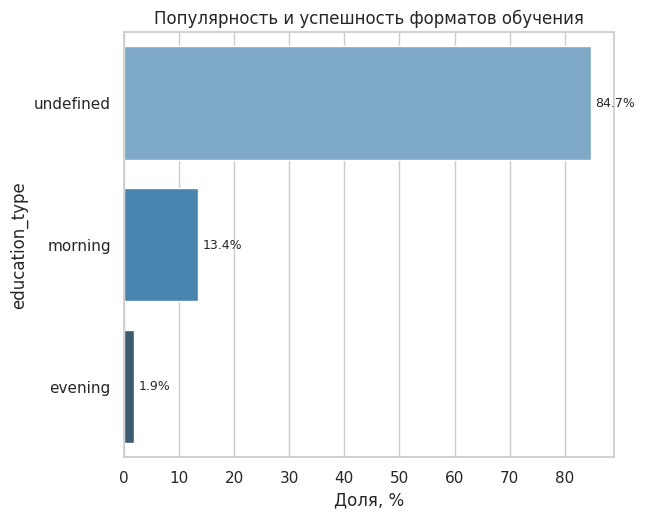


=== Проверка пропусков и артефактов ===
Пропусков (NaN): 0
Артефактных значений: 0


count      %
education_type              
undefined       18294  84.72
morning          2895  13.41
evening           404   1.87

education_type  total_deals  successful_deals  conversion_rate  avg_payment
0        evening          404               181        44.801980   850.000000
1        morning         2895               977        33.747841  1204.304869
2      undefined        18294                26         0.142123   162.439099

In [260]:
# === 1. Подготовка данных ===
df_edu = df_deals.copy()
df_edu["education_type"] = df_edu["education_type"].fillna("Undefined").str.lower().str.strip()

# === 2. Группировка и метрики ===
education_analysis = (
    df_edu.groupby("education_type", dropna=False)
    .agg(
        total_deals=("id", "count"),
        successful_deals=("is_success", "sum"),
        conversion_rate=("is_success", lambda x: x.mean() * 100),
        avg_payment=("initial_amount_paid", "mean")
    )
    .reset_index()
    .sort_values("conversion_rate", ascending=False)
)

# === 3. Визуализация ===
eda_plot(
    df=df_edu,
    column_name="education_type",
    title="Популярность и успешность форматов обучения",
    normalize=True
)

display(education_analysis)


**Выводы по анализу `education_type`**

- Формат **morning** (утренние группы) занимает 13.4% всех сделок и демонстрирует наибольшую успешность.  
- Формат **evening** — нишевый, всего ≈2%, но может быть перспективным для работающих студентов.  
- Пропуски (`Undefined` ≈85%) указывают на необходимость более строгого заполнения поля «Тип обучения» при оформлении сделки.  
- Для повышения эффективности стоит провести A/B тестирование расписаний (morning vs evening) и оценить влияние времени занятий на удержание студентов.


## 7. Географический анализ

#### Подготовка данных для географического анализа

In [220]:
import json

def get_city_info(city):
    info = city_data.get(city, {})
    return pd.Series({
        'longitude': info.get('longitude', None),
        'latitude': info.get('latitude', None),
        'country': info.get('country', None),
        'city_json': info.get('city', None),
        'federal_state': info.get('federal_state', None)
    })



# Загружаем справочник координат

with open("/content/drive/MyDrive/P. Project 07.11/geojson/city_data_google_en.json", "r", encoding="utf-8") as json_file:
    city_data = json.load(json_file)

#print(list(city_data.items())[:3])  # проверяем - выводим первые 3 города

df_deals['city'] = df_deals['city'].fillna('Unnamed')
df_deals[['longitude', 'latitude', 'country', 'city_json', 'federal_state']] = df_deals['city'].apply(get_city_info)

#df_deals.loc[df_deals.city != "Unnamed"].head() #проверяем - выводим первые 5 строк обогащенного геоинформацией df_deals

# Агрегируем количество сделок по каждому городу
city_stats = (
    df_deals.groupby(['city', 'latitude', 'longitude', 'federal_state', 'country'])
    .size()
    .reset_index(name='deal_count')
    .sort_values('deal_count', ascending=False)
)

city_stats.head(5)

city   latitude  longitude federal_state  country  deal_count
87     Berlin  52.520007  13.404954        Berlin  Germany         182
522   München  48.135125  11.581981       Bavaria  Germany          74
288   Hamburg  53.548828   9.987170       Hamburg  Germany          62
573  Nürnberg  49.454288  11.074564       Bavaria  Germany          45
430   Leipzig  51.339695  12.373075        Saxony  Germany          45

##### Топ-10 стран по количеству сделок

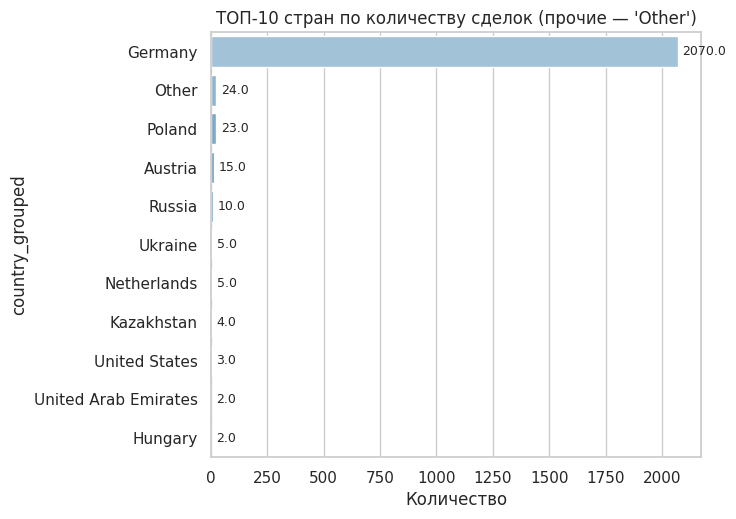


=== Проверка пропусков и артефактов ===
Пропусков (NaN): 0
Артефактных значений: 0


count      %
country_grouped                   
Germany                2070  95.70
Other                    24   1.11
Poland                   23   1.06
Austria                  15   0.69
Russia                   10   0.46
Ukraine                   5   0.23
Netherlands               5   0.23
Kazakhstan                4   0.18
United States             3   0.14
United Arab Emirates      2   0.09
Hungary                   2   0.09

In [221]:
# Убираем технические и пустые значения в поле country
df_filtered = df_deals[df_deals["country"].notna()]
df_filtered = df_filtered[df_filtered["country"].str.strip().ne("Unnamed")]

# Определяем ТОП-10 стран по количеству сделок
top10_countries = df_filtered["country"].value_counts().head(10).index.tolist()

# Создаем новую колонку, где все остальные страны заменяются на 'Other'
df_filtered["country_grouped"] = df_filtered["country"].apply(
    lambda x: x if x in top10_countries else "Other"
)

# Визуализация
eda_plot(
    df=df_filtered,
    column_name="country_grouped",
    title="ТОП-10 стран по количеству сделок (прочие — 'Other')",
    show_stats=True
)


##### Топ-10 городов Германии по количеству сделок

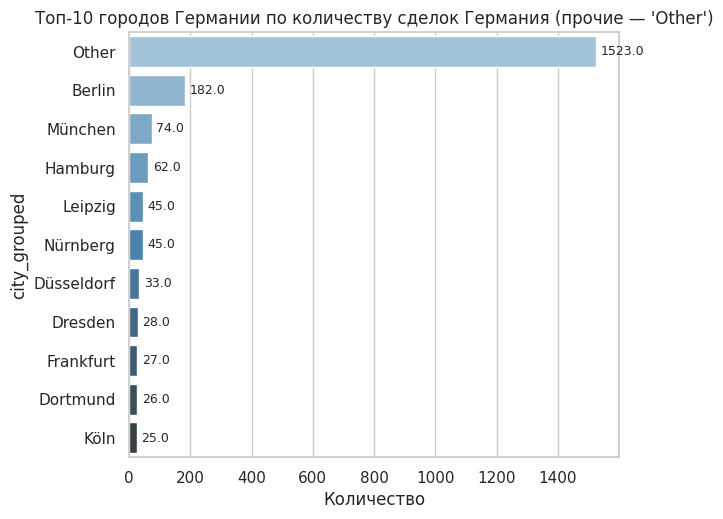


=== Проверка пропусков и артефактов ===
Пропусков (NaN): 0
Артефактных значений: 0


count      %
city_grouped              
Other          1523  73.57
Berlin          182   8.79
München          74   3.57
Hamburg          62   3.00
Leipzig          45   2.17
Nürnberg         45   2.17
Düsseldorf       33   1.59
Dresden          28   1.35
Frankfurt        27   1.30
Dortmund         26   1.26
Köln             25   1.21

In [222]:
# Фильтруем только сделки по Германии
df_germany = df_deals[df_deals["country"].isin(['Германия', 'Germany', 'Deutschland'])].copy()

# Определяем ТОП-10 городов по количеству сделок
top10_cities = df_germany["city"].value_counts().head(10).index.tolist()

# Объединяем остальные города в категорию 'Other'
df_germany["city_grouped"] = df_germany["city"].apply(
    lambda x: x if x in top10_cities else "Other"
)

# Визуализация
eda_plot(
    df=df_germany,
    column_name="city_grouped",
    title="Топ-10 городов Германии по количеству сделок Германия (прочие — 'Other')",
    show_stats=True
)


#### Статические карты (geopandas)

##### Импорт необходимых пакетов и библиотек

In [223]:
# Устанавливаем пакет, который подтягивает подложку карты
!pip install contextily --quiet # contextily is a small Python 3 (3.10 and above) package to retrieve tile maps from the internet

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 22.3/22.3 MB 17.1 MB/s eta 0:00:00


In [224]:
import geopandas as gpd
from shapely.geometry import Point
import contextily as ctx
import matplotlib.pyplot as plt

##### Распределение сделок по миру

Количество точек (всего сделок с координатами): 2163


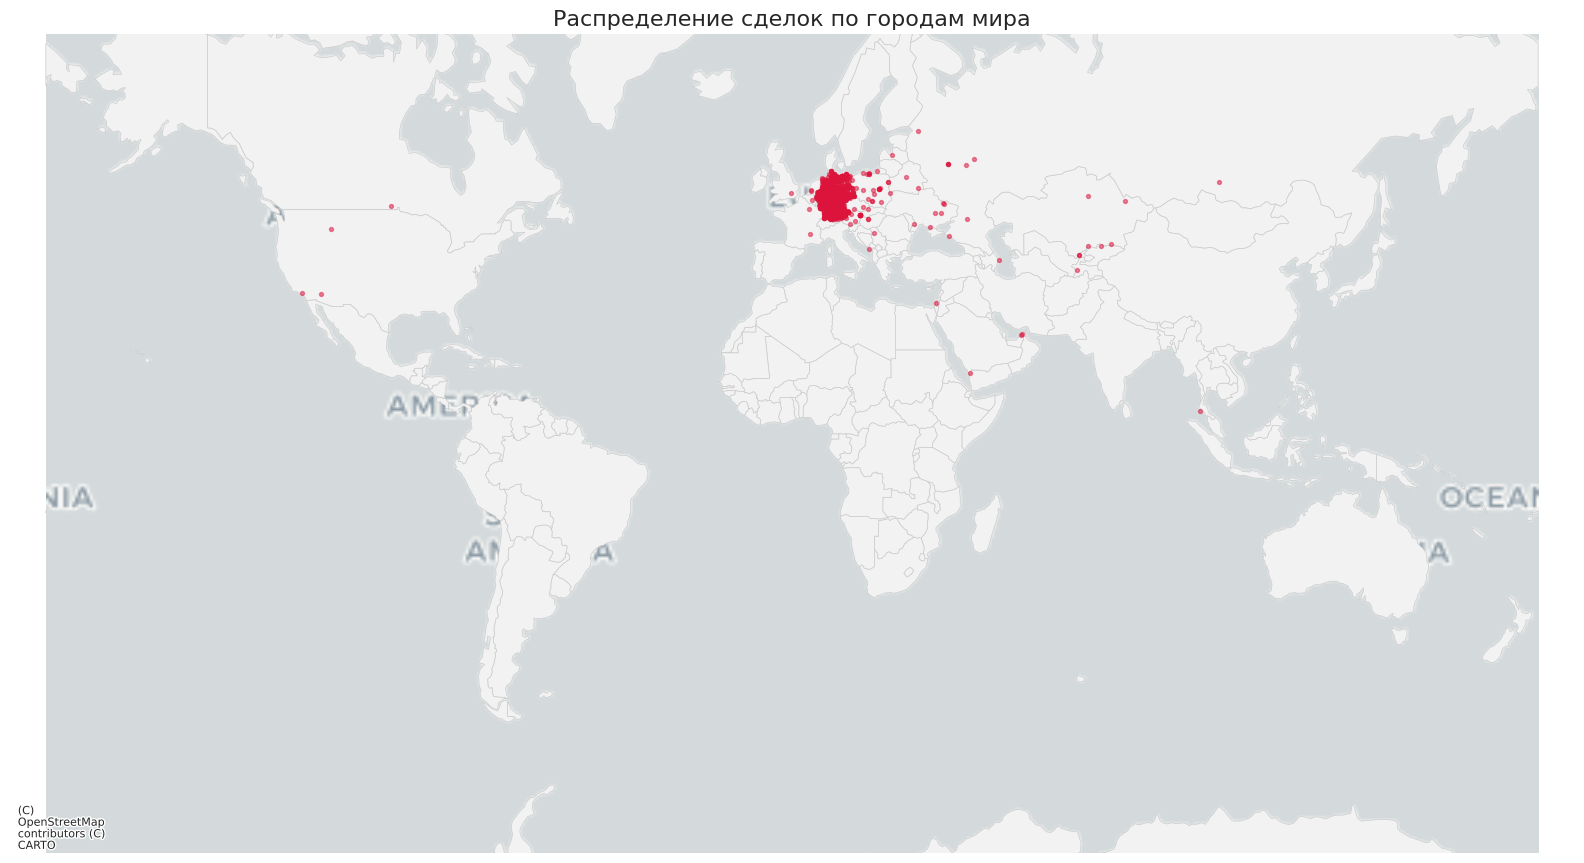

In [225]:
# Преобразуем координаты в числовой формат
df_deals['latitude'] = pd.to_numeric(df_deals['latitude'], errors='coerce')
df_deals['longitude'] = pd.to_numeric(df_deals['longitude'], errors='coerce')

# Убираем строки без координат
df_geo = df_deals.dropna(subset=['latitude', 'longitude']).copy()

# 3. Преобразуем в GeoDataFrame
gdf = gpd.GeoDataFrame(
    df_geo,
    geometry=gpd.points_from_xy(df_geo['longitude'], df_geo['latitude']),
    crs='EPSG:4326'
)

# Переводим в проекцию Web Mercator (нужна для contextily)
gdf = gdf.to_crs(epsg=3857)

# Проверяем, что данные не пусты
print(f"Количество точек (всего сделок с координатами): {len(gdf)}")

# Загружаем мировые границы (Natural Earth)
url = "https://naturalearth.s3.amazonaws.com/110m_cultural/ne_110m_admin_0_countries.zip"
world = gpd.read_file(url).to_crs(epsg=3857)

# Визуализация
fig, ax = plt.subplots(figsize=(16, 9))
world.plot(ax=ax, color="#f2f2f2", edgecolor="#cccccc", linewidth=0.5)

# Точки сделок
gdf.plot(ax=ax, color='crimson', alpha=0.5, markersize=8)

# Подложка
ctx.add_basemap(ax, source=ctx.providers.CartoDB.Positron)

# Масштаб под весь мир
ax.set_xlim([-2.1e7, 2.1e7])
ax.set_ylim([-1.1e7, 1.1e7])

plt.title("Распределение сделок по городам мира", fontsize=16)
plt.axis("off")
plt.tight_layout()
plt.show()


##### Распределение сделок по городам Европы

Количество точек (всего сделок с координатами): 2163


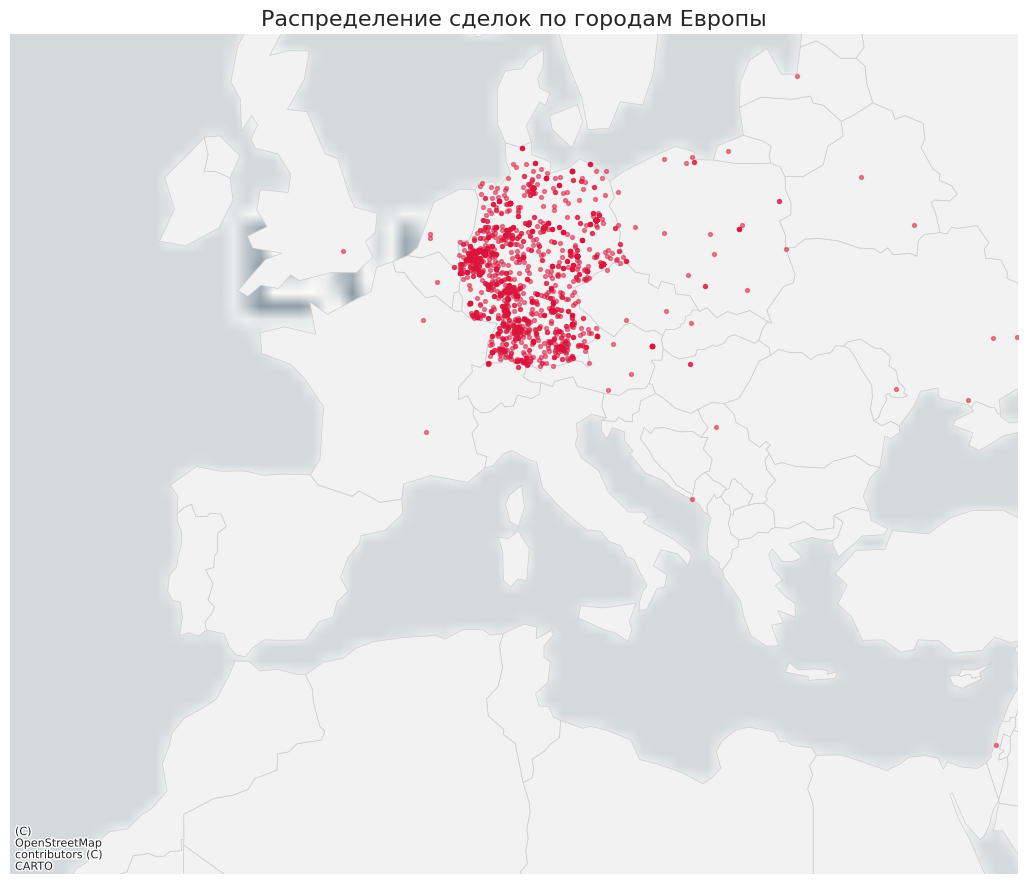

In [226]:
# Преобразуем координаты в числовой формат
df_deals['latitude'] = pd.to_numeric(df_deals['latitude'], errors='coerce')
df_deals['longitude'] = pd.to_numeric(df_deals['longitude'], errors='coerce')

# Убираем строки без координат
df_geo = df_deals.dropna(subset=['latitude', 'longitude']).copy()

# 3. Преобразуем в GeoDataFrame
gdf = gpd.GeoDataFrame(
    df_geo,
    geometry=gpd.points_from_xy(df_geo['longitude'], df_geo['latitude']),
    crs='EPSG:4326'
)

# Переводим в проекцию Web Mercator (нужна для contextily)
gdf = gdf.to_crs(epsg=3857)

# Проверяем, что данные не пусты
print(f"Количество точек (всего сделок с координатами): {len(gdf)}")

# Загружаем мировые границы (Natural Earth)
url = "https://naturalearth.s3.amazonaws.com/110m_cultural/ne_110m_admin_0_countries.zip"
world = gpd.read_file(url).to_crs(epsg=3857)

# Визуализация
fig, ax = plt.subplots(figsize=(16, 9))
world.plot(ax=ax, color="#f2f2f2", edgecolor="#cccccc", linewidth=0.5)

# Точки сделок
gdf.plot(ax=ax, color='crimson', alpha=0.5, markersize=8)

# Подложка
ctx.add_basemap(ax, source=ctx.providers.CartoDB.Positron)

# Масштаб Европа
ax.set_xlim([-2e6, 4e6])
ax.set_ylim([3e6, 8e6])

plt.title("Распределение сделок по городам Европы", fontsize=16)
plt.axis("off")
plt.tight_layout()
plt.show()


##### Распределение сделок по городам Германии

Количество точек: 2070


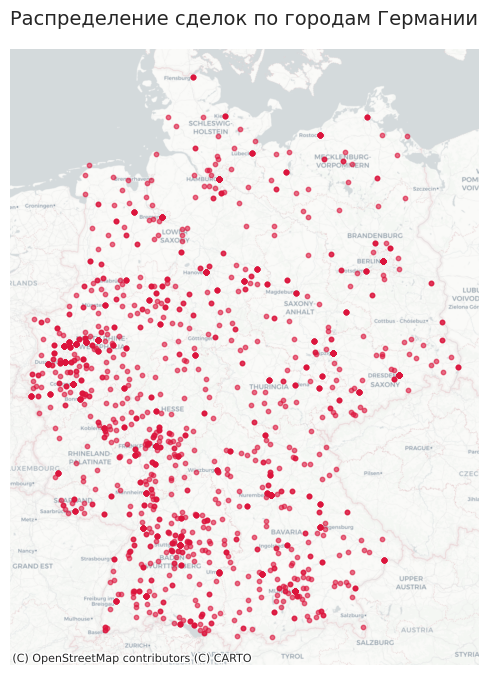

In [227]:
# Преобразуем координаты в числа
df_deals['latitude'] = pd.to_numeric(df_deals['latitude'], errors='coerce')
df_deals['longitude'] = pd.to_numeric(df_deals['longitude'], errors='coerce')

# Убираем пустые значения
df_geo = df_deals.dropna(subset=['latitude', 'longitude']).copy()

# Оставляем только Германию (в любом написании)
df_geo = df_geo[df_geo['country'].isin(['Германия', 'Germany', 'Deutschland'])]

# Преобразуем в GeoDataFrame
gdf = gpd.GeoDataFrame(
    df_geo,
    geometry=gpd.points_from_xy(df_geo['longitude'], df_geo['latitude']),
    crs='EPSG:4326'
)

# Переводим в Web Mercator
gdf = gdf.to_crs(epsg=3857)

# Проверим, что не пусто
print(f"Количество точек: {len(gdf)}")

# Визуализируем
fig, ax = plt.subplots(figsize=(10, 8))
gdf.plot(ax=ax, color='crimson', alpha=0.6, markersize=10)
ctx.add_basemap(ax, source=ctx.providers.CartoDB.Positron)
plt.title("Распределение сделок по городам Германии", fontsize=14)
plt.axis("off")
plt.show()


##### Топ-10 городов Германии по количеству сделок

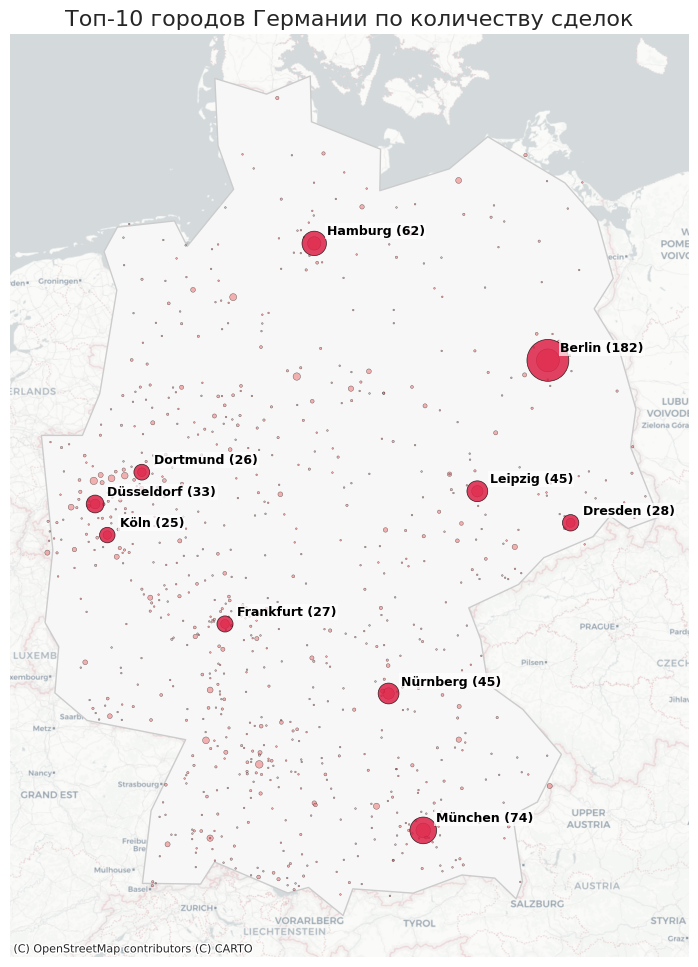

In [228]:
# Преобразуем координаты
df_deals['latitude'] = pd.to_numeric(df_deals['latitude'], errors='coerce')
df_deals['longitude'] = pd.to_numeric(df_deals['longitude'], errors='coerce')

# Убираем пустые значения и оставляем только Германию
df_geo = df_deals.dropna(subset=['latitude', 'longitude']).copy()
df_geo = df_geo[df_geo['country'].isin(['Германия', 'Germany', 'Deutschland'])]

# Агрегируем количество сделок по городам
city_stats_ = (
    df_geo.groupby(['city', 'federal_state', 'latitude', 'longitude'])
    .size()
    .reset_index(name='deal_count')
    .sort_values('deal_count', ascending=False)
)

# Преобразуем в GeoDataFrame
gdf = gpd.GeoDataFrame(
    city_stats_,
    geometry=gpd.points_from_xy(city_stats_['longitude'], city_stats_['latitude']),
    crs='EPSG:4326'
).to_crs(epsg=3857)

# Загружаем границы Германии
url = "https://naturalearth.s3.amazonaws.com/110m_cultural/ne_110m_admin_0_countries.zip"
world = gpd.read_file(url).to_crs(epsg=3857)
germany = world[world["NAME_EN"] == "Germany"]

# Визуализация
fig, ax = plt.subplots(figsize=(12, 10))

# фон и границы
germany.plot(ax=ax, color="#f7f7f7", edgecolor="#cccccc")

# все города (маленькие кружки)
gdf.plot(
    ax=ax,
    markersize=gdf["deal_count"] * 1.5,
    color="lightcoral",
    alpha=0.6,
    edgecolor="black",
    linewidth=0.3
)

# Подписи и выделение ТОП-10 городов
top_cities = gdf.sort_values("deal_count", ascending=False).head(10)

# большие круги для ТОП-10
top_cities.plot(
    ax=ax,
    markersize=top_cities["deal_count"] * 5,
    color="crimson",
    alpha=0.8,
    edgecolor="black",
    linewidth=0.5
)

# подписи городов
for _, row in top_cities.iterrows():
    ax.text(
        row.geometry.x + 20000,  # смещение по X (в метрах)
        row.geometry.y + 20000,  # смещение по Y
        f"{row['city']} ({row['deal_count']})",
        fontsize=9,
        weight='bold',
        color='black',
        ha='left',
        va='center',
        bbox=dict(facecolor='white', alpha=0.7, edgecolor='none', pad=1)
    )

#Добавляем подложку (OpenStreetMap)
ctx.add_basemap(ax, source=ctx.providers.CartoDB.Positron)

plt.title("Топ-10 городов Германии по количеству сделок", fontsize=16)
plt.axis("off")
plt.tight_layout()
plt.show()

### Интерактивная карта (folium)

In [229]:
import folium
from folium.plugins import MarkerCluster

# Создание базовой карты (центр Германии)
m = folium.Map(location=[51.1657, 10.4515], zoom_start=6)

# Добавляем кластеризатор
marker_cluster = MarkerCluster(name="Кластеры городов").add_to(m)

# Добавляем все города в кластеры
for _, row in city_stats.iterrows():
    popup_html = (
        f"<b>{row['city']}</b><br>"
        f"Сделок: {row['deal_count']}<br>"
        f"Федеральная земля: {row['federal_state']}<br>"
        f"Страна: {row['country']}"
    )
    folium.CircleMarker(
        location=[row['latitude'], row['longitude']],
        radius=max(3, row['deal_count'] / 5),
        popup=popup_html,
        color="crimson",
        fill=True,
        fill_opacity=0.6
    ).add_to(marker_cluster)

# Добавляем панель управления слоями и сохраняем
folium.LayerControl().add_to(m)
m.save("deals_by_city_top10_clustered.html")
m

### Анализ влияния уровня владения немецким языком на успешность сделок в разных городах

**Цель:** проверить, существует ли зависимость между уровнем знания немецкого языка (`level_of_deutsch`) и вероятностью успешного закрытия сделки в разных городах.

#### Этап 1. Подготовка данных

In [230]:
df_deals['level_of_deutsch'].unique()

array(['Неизвестно', 'B1', 'A2', 'B1-B2', 'B2', 'C2', 'C1', 'A1', 'A0',
       'A2-B1', 'B2-C1', 'A1-A2'], dtype=object)

In [231]:
df_deals['stage'].unique()

array(['new lead', 'lost', 'need a consultation', 'need to call',
       'call delayed', 'qualificated', 'registered on webinar',
       'waiting for payment', 'need to call - sales', 'test sent',
       'payment done', 'registered on offline day', 'free education'],
      dtype=object)

In [232]:
# Добавим флаг успешной оплаты
if "payment_done" not in df_deals.columns:
    df_deals["payment_done"] = df_deals["initial_amount_paid"].fillna(0) > 0

# Определим топ-30 городов по количеству сделок
top30_cities = df_deals["city"].value_counts().head(30).index.tolist()

# Объединим остальные в категорию "Other"
df_deals["city_grouped"] = df_deals["city"].apply(
    lambda x: x if x in top30_cities else "Other"
)

# Группировка по городам и уровню немецкого
success_matrix = (
    df_deals.groupby(["city_grouped", "level_of_deutsch"])["payment_done"]
    .mean()
    .reset_index(name="success_rate") # доля успешных сделок (от 0 до 1
)


#### Этап 2. Визуализация

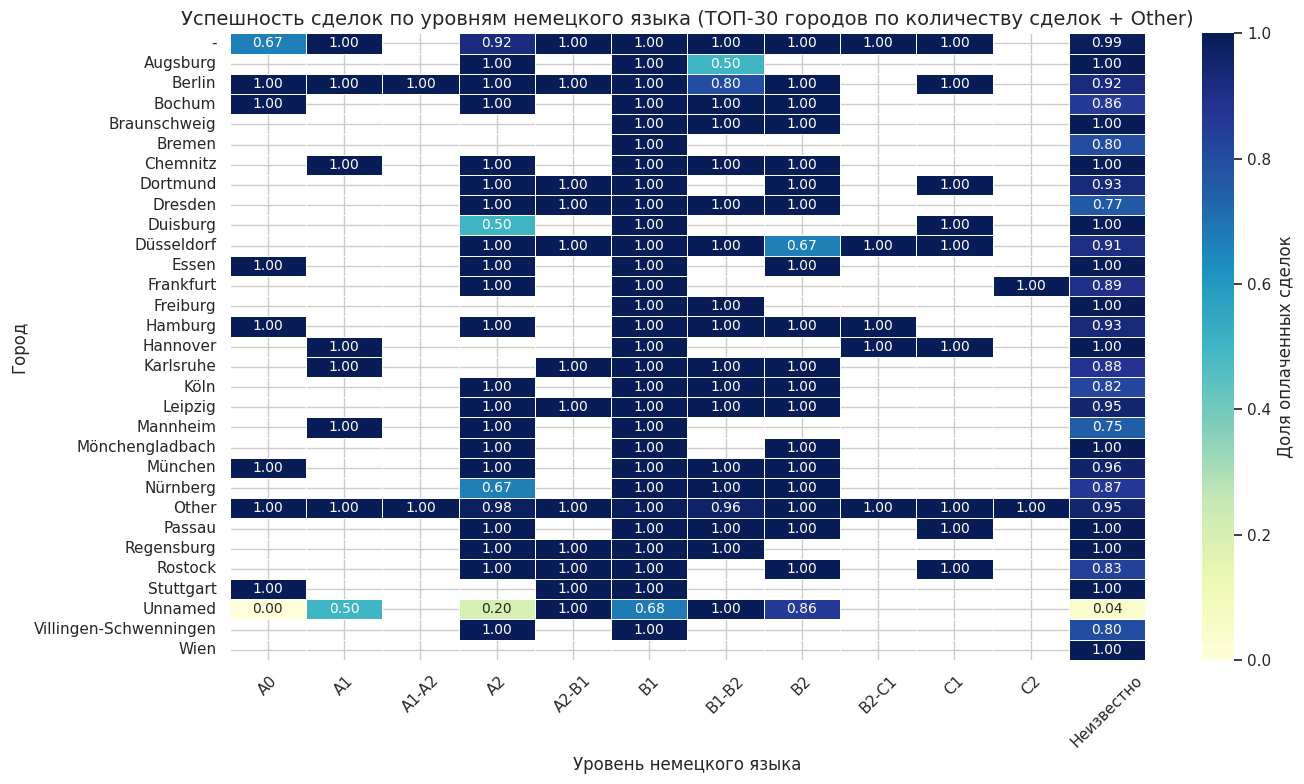

In [233]:
# Преобразуем в сводную таблицу (для heatmap)
pivot = success_matrix.pivot(
    index="city_grouped",
    columns="level_of_deutsch",
    values="success_rate"
)

# Визуализация — тепловая карта
plt.figure(figsize=(14, 8))
sns.heatmap(
    pivot,
    annot=True,
    cmap="YlGnBu",
    fmt=".2f",
    linewidths=0.5,
    annot_kws={"size": 10}, # размер шрифта внутри ячеек
    cbar_kws={'label': 'Доля оплаченных сделок'}
)
plt.title("Успешность сделок по уровням немецкого языка (ТОП-30 городов по количеству сделок + Other)", fontsize=14)
plt.xlabel("Уровень немецкого языка")
plt.ylabel("Город")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


## 8. Сводные выводы и экспорт агрегатов

1. Выявлены ключевые источники и кампании с наилучшей конверсией.  
2. Средняя длительность сделки составляет X дней.  
3. Определены топ-менеджеры по объёму продаж.  
4. Самые доходные продукты — [Product A, Product B].  
5. Города с наибольшим успехом продаж — [City A, City B].  
6. Получены данные для построения дашборда эффективности.

### Экспорт агрегатов

In [ ]:
perf_summary.to_csv("exports/performance_by_source.csv", index=False, encoding="utf-8-sig")
sales_perf.to_csv("exports/sales_by_owner.csv", index=False, encoding="utf-8-sig")
prod_summary.to_csv("exports/product_performance.csv", index=False, encoding="utf-8-sig")

print("Агрегаты экспортированы в папку exports/")

## Подвал

### 3.1. Временные ряды

In [115]:
'''
Первая версия анализа временных рядов без сделок с оплатой

# Агрегируем по неделям
deals_ts = (
    df_deals
    .groupby(df_deals["created_time"].dt.to_period("W"))["id"]
    .count()
    .rename("Deals")
)
calls_ts = (
    df_calls
    .groupby(df_calls["call_start_time"].dt.to_period("W"))["id"]
    .count()
    .rename("Calls")
)

# Индекс к дате начала недели
deals_ts.index = deals_ts.index.to_timestamp()
calls_ts.index = calls_ts.index.to_timestamp()

# Объединяем
ts = pd.concat([deals_ts, calls_ts], axis=1).fillna(0)

# Добавляем календарные атрибуты
calendar = ts.index.isocalendar()
ts["Year"] = calendar.year
ts["Week"] = calendar.week
ts["Month"] = ts.index.month
ts["YearWeek"] = ts["Year"].astype(str) + "-" + ts["Week"].astype(str).str.zfill(2)

# Сглаживание
ts["Deals_MA"] = ts["Deals"].rolling(window=3, center=True).mean()
ts["Calls_MA"] = ts["Calls"].rolling(window=3, center=True).mean()

# Определяем пики активности
deal_peak_date = ts["Deals"].idxmax()
call_peak_date = ts["Calls"].idxmax()

# Определяем границы месяцев
month_start_idx = ts.index.to_series().dt.to_period("M").drop_duplicates().index
month_labels = [d.strftime("%b") for d in month_start_idx]  # сокращенные месяцы: Jan, Feb, Mar

# Построение графика
plt.figure(figsize=(16, 8))

# Основные линии
plt.plot(ts["YearWeek"], ts["Deals"], label="Сделки (неделя)", color="#1f77b4", alpha=0.3)
plt.plot(ts["YearWeek"], ts["Calls"], label="Звонки (неделя)", color="#ff7f0e", alpha=0.3)

# Сглаженные линии
plt.plot(ts["YearWeek"], ts["Deals_MA"], label="Сделки (скользящее среднее, 3 недели)", color="#1f77b4", linewidth=2)
plt.plot(ts["YearWeek"], ts["Calls_MA"], label="Звонки (скользящее среднее, 3 недели)", color="#ff7f0e", linewidth=2)

# Вертикальные линии начала месяца
for i, d in enumerate(month_start_idx):
    if i == 0:
        continue  # пропускаем самую первую
    plt.axvline(
        x=ts.index.get_loc(d),  # позиция недели в серии
        color="gray",
        linestyle="--",
        linewidth=0.7,
        alpha=0.4
    )

# Подписи месяцев
month_positions = [ts.index.get_loc(d) for d in month_start_idx]
plt.xticks(
    ticks=range(len(ts)),
    labels=ts["YearWeek"],
    rotation=45,
    fontsize=8
)

# Отдельная нижняя ось для месяцев
for pos, label in zip(month_positions, month_labels):
    plt.text(pos, -max(ts["Deals"].max(), ts["Calls"].max()) * 0.05,  # чуть ниже оси X
             label, ha="center", va="top", fontsize=9, color="gray")

# Аннотации пиков
deal_peak_idx = ts.index.get_loc(deal_peak_date)
call_peak_idx = ts.index.get_loc(call_peak_date)

plt.scatter(deal_peak_idx, ts.loc[deal_peak_date, "Deals"], color="#1f77b4", s=80, zorder=5)
plt.scatter(call_peak_idx, ts.loc[call_peak_date, "Calls"], color="#ff7f0e", s=80, zorder=5)


plt.text(deal_peak_idx, ts.loc[deal_peak_date, "Deals"] + 5,
         f"Пик сделок: {deal_peak_date.strftime('%d-%m-%Y')}",
         color="#1f77b4", fontsize=10, ha="center")
plt.text(call_peak_idx, ts.loc[call_peak_date, "Calls"] + 5,
         f"Пик звонков: {call_peak_date.strftime('%d-%m-%Y')}",
         color="#ff7f0e", fontsize=10, ha="center")

# Оформление
plt.title("Динамика сделок и звонков по неделям", fontsize=16, fontweight="bold")
plt.xlabel("Неделя (год–номер)")
plt.ylabel("Количество событий")
plt.legend()
plt.grid(True, linestyle="--", alpha=0.4)
plt.tight_layout()
plt.show()
'''

'\nПервая версия без сделок с оплатой\n\n# Агрегируем по неделям\ndeals_ts = (\n    df_deals\n    .groupby(df_deals["created_time"].dt.to_period("W"))["id"]\n    .count()\n    .rename("Deals")\n)\ncalls_ts = (\n    df_calls\n    .groupby(df_calls["call_start_time"].dt.to_period("W"))["id"]\n    .count()\n    .rename("Calls")\n)\n\n# Индекс к дате начала недели\ndeals_ts.index = deals_ts.index.to_timestamp()\ncalls_ts.index = calls_ts.index.to_timestamp()\n\n# Объединяем\nts = pd.concat([deals_ts, calls_ts], axis=1).fillna(0)\n\n# Добавляем календарные атрибуты\ncalendar = ts.index.isocalendar()\nts["Year"] = calendar.year\nts["Week"] = calendar.week\nts["Month"] = ts.index.month\nts["YearWeek"] = ts["Year"].astype(str) + "-" + ts["Week"].astype(str).str.zfill(2)\n\n# Сглаживание\nts["Deals_MA"] = ts["Deals"].rolling(window=3, center=True).mean()\nts["Calls_MA"] = ts["Calls"].rolling(window=3, center=True).mean()\n\n# Определяем пики активности\ndeal_peak_date = ts["Deals"].idxmax()\nca

In [192]:
"""
Первая версия без линии средней

# Вычисляем разницу между датой создания и закрытия сделки
df_deals["cycle_length_days"] = (
    (df_deals["closing_date"] - df_deals["created_time"]).dt.days
)

# Очистка данных (только завершённые сделки, без отрицательных значений)
df_cycle = df_deals[
    (df_deals["cycle_length_days"].notna()) &
    (df_deals["cycle_length_days"] >= 0)
].copy()

# Группировка по неделям даты создания сделки
cycle_ts = (
    df_cycle
    .groupby(df_cycle["created_time"].dt.to_period("W"))["cycle_length_days"]
    .mean()
    .rename("avg_cycle_days")
)

cycle_ts.index = cycle_ts.index.to_timestamp()

# Add a check for empty cycle_ts
if cycle_ts.empty:
    print("No valid data to plot deal cycle length after filtering.")
else:
    # Convert the series to a DataFrame to ensure correct calculation
    ts = cycle_ts.to_frame()

    # Add calendar attributes
    calendar = ts.index.isocalendar()
    ts["Year"] = calendar.year
    ts["Week"] = calendar.week
    ts["Month"] = ts.index.month
    ts["YearWeek"] = ts["Year"].astype(str) + "-" + ts["Week"].astype(str).str.zfill(2)

    # Сглаживание (MA 3 недели)
    ts["avg_cycle_days_MA"] = ts["avg_cycle_days"].rolling(window=3, center=True).mean()


    # Определение пиков
    peak_max = ts["avg_cycle_days"].idxmax()
    peak_min = ts["avg_cycle_days"].idxmin()

    # Определяем границы месяцев
    month_start_idx = ts.index.to_series().dt.to_period("M").drop_duplicates().index
    month_labels = [d.strftime("%b") for d in month_start_idx]  # сокращенные месяцы: Jan, Feb, Mar

    # Визуализация
    #plt.figure(figsize=(14, 7))
    plt.figure(figsize=(14, 7), constrained_layout=True)

    # Основная линия
    plt.plot(ts["YearWeek"], ts["avg_cycle_days"], label="Средняя длительность (неделя)", color="#2a9d8f", alpha=0.3)

    # Сглаженная линия
    plt.plot(ts["YearWeek"], ts["avg_cycle_days_MA"].values, label="Скользящее среднее (3 недели)", color="#2a9d8f", linewidth=2.5)

    # Вертикальные линии начала месяца
    for i, d in enumerate(month_start_idx):
        if i == 0:
            continue  # пропускаем самую первую
        plt.axvline(
            x=ts.index.get_loc(d),  # позиция недели в серии
            color="gray",
            linestyle="--",
            linewidth=0.7,
            alpha=0.4
        )

    # Подписи месяцев
    #month_positions = [ts.index.get_loc(d) for d in month_start_idx]
    month_positions = [(abs(ts.index - d)).argmin() for d in month_start_idx]
    plt.xticks(
        ticks=range(len(ts)),
        labels=ts["YearWeek"],
        rotation=45,
        fontsize=8
    )

    # Отдельная нижняя ось для месяцев
    #month_positions = [ts.index.get_loc(d) for d in month_start_idx]
    for pos, label in zip(month_positions, month_labels):
        plt.text(pos, -ts["avg_cycle_days"].max() * 0.035,  # чуть ниже оси X
                 label, ha="center", va="top", fontsize=9, color="gray")


    # Аннотации пиков
    plt.scatter(ts.index.get_loc(peak_max), ts.loc[peak_max, "avg_cycle_days"], color="#e76f51", s=80, zorder=5)
    plt.scatter(ts.index.get_loc(peak_min), ts.loc[peak_min, "avg_cycle_days"], color="#264653", s=80, zorder=5)

    plt.text(ts.index.get_loc(peak_max), ts.loc[peak_max, "avg_cycle_days"] - 3,
             f"Максимум: {ts.loc[peak_max, 'avg_cycle_days']:.1f} дн\n{peak_max.strftime('%d-%m-%Y')}",
             color="#e76f51", fontsize=10, ha="center")

    plt.text(ts.index.get_loc(peak_min), ts.loc[peak_min, "avg_cycle_days"] + 2,
             f"Минимум: {ts.loc[peak_min, 'avg_cycle_days']:.1f} дн\n{peak_min.strftime('%d-%m-%Y')}",
             color="#264653", fontsize=10, ha="center")

    # Оформление
    plt.title("Средняя длительность цикла сделки по неделям", fontsize=16, fontweight="bold")
    plt.xlabel("Неделя (год-номер)")
    plt.ylabel("Средняя длительность сделки (дни)")
    plt.legend()
    plt.grid(True, linestyle="--", alpha=0.4)
    plt.xticks(rotation=45)
    #plt.tight_layout()
    plt.show()

    """

'\nПервая версия без линии средней\n\n# Вычисляем разницу между датой создания и закрытия сделки\ndf_deals["cycle_length_days"] = (\n    (df_deals["closing_date"] - df_deals["created_time"]).dt.days\n)\n\n# Очистка данных (только завершённые сделки, без отрицательных значений)\ndf_cycle = df_deals[\n    (df_deals["cycle_length_days"].notna()) &\n    (df_deals["cycle_length_days"] >= 0)\n].copy()\n\n# Группировка по неделям даты создания сделки\ncycle_ts = (\n    df_cycle\n    .groupby(df_cycle["created_time"].dt.to_period("W"))["cycle_length_days"]\n    .mean()\n    .rename("avg_cycle_days")\n)\n\ncycle_ts.index = cycle_ts.index.to_timestamp()\n\n# Add a check for empty cycle_ts\nif cycle_ts.empty:\n    print("No valid data to plot deal cycle length after filtering.")\nelse:\n    # Convert the series to a DataFrame to ensure correct calculation\n    ts = cycle_ts.to_frame()\n\n    # Add calendar attributes\n    calendar = ts.index.isocalendar()\n    ts["Year"] = calendar.year\n    ts["

### 4.1 Объединение данных рекламы и сделок
Для анализа кампаний соединяем `df_spend` и `df_deals`.

In [119]:
'''
merge_cols = ["source", "campaign"] # Removed 'term' and 'content'
df_perf = pd.merge(df_spend, df_deals, on=merge_cols, how="left", suffixes=("_spend", "_deals"))

df_perf["leads"] = df_perf["id"].notna().astype(int)
df_perf["cr"] = np.where(df_perf["clicks"] > 0, (df_perf["leads"] / df_perf["clicks"]) * 100, np.nan)
'''

'\nmerge_cols = ["source", "campaign"] # Removed \'term\' and \'content\'\ndf_perf = pd.merge(df_spend, df_deals, on=merge_cols, how="left", suffixes=("_spend", "_deals"))\n\ndf_perf["leads"] = df_perf["id"].notna().astype(int)\ndf_perf["cr"] = np.where(df_perf["clicks"] > 0, (df_perf["leads"] / df_perf["clicks"]) * 100, np.nan)\n'

### 4.2 Эффективность источников
Сравнение CTR, CPC, CPM и CR между источниками.

In [120]:
'''
perf_summary = (
    df_perf.groupby("source")
    .agg({"clicks": "sum", "spend": "sum", "leads": "sum", "cr": "mean"})
    .assign(cpc=lambda x: x["spend"]/x["clicks"],
            cpl=lambda x: x["spend"]/x["leads"],
            cpm=lambda x: (x["spend"]/x["clicks"]) * 1000)
    .reset_index()
)

display(perf_summary)
sns.barplot(x="source", y="cr", data=perf_summary)
plt.title("Conversion Rate по источникам")
plt.show()
'''

'\nperf_summary = (\n    df_perf.groupby("source")\n    .agg({"clicks": "sum", "spend": "sum", "leads": "sum", "cr": "mean"})\n    .assign(cpc=lambda x: x["spend"]/x["clicks"],\n            cpl=lambda x: x["spend"]/x["leads"],\n            cpm=lambda x: (x["spend"]/x["clicks"]) * 1000)\n    .reset_index()\n)\n\ndisplay(perf_summary)\nsns.barplot(x="source", y="cr", data=perf_summary)\nplt.title("Conversion Rate по источникам")\nplt.show()\n'

In [201]:
"""
Рейтинг менеджеров по продажам

sales_perf = (
    df_deals.groupby("deal_owner_name")
    .agg({"id": "count", "offer_total_amount": "sum"})
    .rename(columns={"id": "deals_count"})
    .reset_index()
)

sns.barplot(x="offer_total_amount", y="deal_owner_name", data=sales_perf.sort_values("offer_total_amount", ascending=False))
plt.title("Рейтинг менеджеров по сумме продаж")
plt.show()
"""

'\nsales_perf = (\n    df_deals.groupby("deal_owner_name")\n    .agg({"id": "count", "offer_total_amount": "sum"})\n    .rename(columns={"id": "deals_count"})\n    .reset_index()\n)\n\nsns.barplot(x="offer_total_amount", y="deal_owner_name", data=sales_perf.sort_values("offer_total_amount", ascending=False))\nplt.title("Рейтинг менеджеров по сумме продаж")\nplt.show()\n'

In [204]:
"""
pay_summary = df_deals.groupby("payment_type")["stage_normalized"].value_counts(normalize=True).unstack().fillna(0)
sns.heatmap(pay_summary, annot=True, fmt=".1%", cmap="Blues")
plt.title("Успешность сделок по типам оплаты")
plt.show()

prod_summary = df_deals.groupby(["product", "education_type"]).agg({"id": "count", "offer_total_amount": "sum"}).reset_index()
sns.barplot(x="id", y="product", hue="education_type", data=prod_summary)
plt.title("Популярность продуктов по типу обучения")
plt.show()
"""

'\npay_summary = df_deals.groupby("payment_type")["stage_normalized"].value_counts(normalize=True).unstack().fillna(0)\nsns.heatmap(pay_summary, annot=True, fmt=".1%", cmap="Blues")\nplt.title("Успешность сделок по типам оплаты")\nplt.show()\n\nprod_summary = df_deals.groupby(["product", "education_type"]).agg({"id": "count", "offer_total_amount": "sum"}).reset_index()\nsns.barplot(x="id", y="product", hue="education_type", data=prod_summary)\nplt.title("Популярность продуктов по типу обучения")\nplt.show()\n'

### Корреляционный анализ финансовых и поведенческих параметров сделок

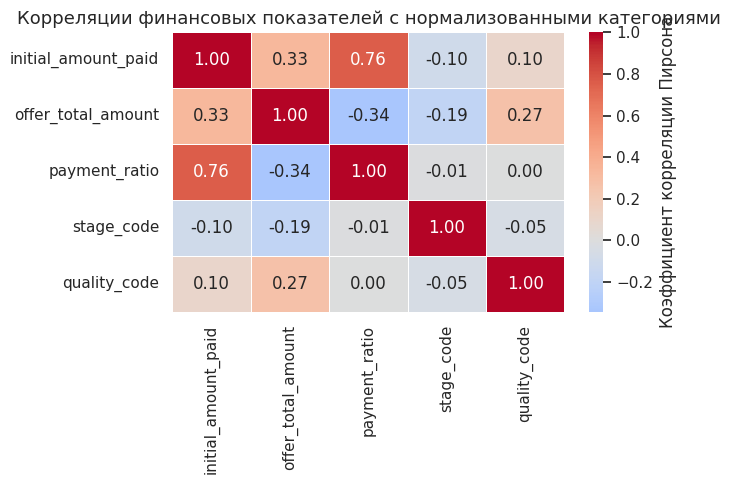

initial_amount_paid  offer_total_amount  payment_ratio  \
initial_amount_paid             1.000000            0.330342       0.762888   
offer_total_amount              0.330342            1.000000      -0.342288   
payment_ratio                   0.762888           -0.342288       1.000000   
stage_code                     -0.100340           -0.191722      -0.011082   
quality_code                    0.100403            0.269403       0.003002   

                     stage_code  quality_code  
initial_amount_paid   -0.100340      0.100403  
offer_total_amount    -0.191722      0.269403  
payment_ratio         -0.011082      0.003002  
stage_code             1.000000     -0.046892  
quality_code          -0.046892      1.000000

In [37]:
# --- 1. Копия датафрейма и базовая фильтрация ---
df_corr2 = df_deals.copy()

# Убираем строки без ключевых финансовых значений
df_corr2 = df_corr2[
    df_corr2["initial_amount_paid"].notna() &
    df_corr2["offer_total_amount"].notna()
].copy()

# Добавляем коэффициент предоплаты (если отсутствует)
if "payment_ratio" not in df_corr2.columns:
    df_corr2["payment_ratio"] = df_corr2["initial_amount_paid"] / df_corr2["offer_total_amount"]
    df_corr2.loc[df_corr2["offer_total_amount"] == 0, "payment_ratio"] = np.nan

# --- 2. Перекодируем категориальные признаки ---
stage_order = {
    "Lead": 0,
    "Contacted": 1,
    "Demo": 2,
    "Payment Process": 3,
    "Active Student": 4,
    "Churned": 5
}
quality_order = {
    "Undefined": 0,
    "Cold": 1,
    "Warm": 2,
    "Hot": 3
}

df_corr2["stage_code"] = df_corr2["stage_normalized"].map(stage_order)
df_corr2["quality_code"] = df_corr2["quality_normalized"].map(quality_order)

# --- 3. Выбор признаков для анализа ---
corr_features = [
    "initial_amount_paid", "offer_total_amount", "payment_ratio",
    "stage_code", "quality_code"
]

# --- 4. Расчёт и визуализация корреляций ---
corr_matrix2 = df_corr2[corr_features].corr(method="pearson")

plt.figure(figsize=(7, 5))
sns.heatmap(
    corr_matrix2, annot=True, fmt=".2f",
    cmap="coolwarm", center=0, linewidths=0.5,
    cbar_kws={'label': 'Коэффициент корреляции Пирсона'}
)
plt.title("Корреляции финансовых показателей с нормализованными категориями", fontsize=13)
plt.tight_layout()
plt.show()

display(corr_matrix2)

**Корреляционный анализ финансовых параметров сделок**

**Основные наблюдения:**
1. Между `initial_amount_paid` и `payment_ratio` наблюдается **сильная положительная корреляция** (r = 0.76).  
   Это означает, что чем выше сумма первоначального платежа, тем выше доля предоплаты от общей стоимости предложения.  
   Связь логична и подтверждает внутреннюю согласованность финансовых показателей.
2. Между `initial_amount_paid` и `offer_total_amount` выявлена **умеренная положительная корреляция** (r = 0.33).  
   Это говорит о том, что более дорогие предложения в среднем сопровождаются большими по размеру первоначальными платежами, однако сила связи умеренная — то есть рост суммы предложения не всегда пропорционально повышает фактический размер предоплаты.
3. Между `offer_total_amount` и `payment_ratio` выявлена **умеренная отрицательная корреляция** (r = –0.34).  
   Это означает, что при увеличении стоимости предложения доля предоплаты, как правило, снижается.  
   Иными словами, чем дороже курс, тем меньше процент суммы студенты оплачивают сразу — вероятно, из-за рассрочек, поэтапных оплат или финансовых ограничений.
4. Признаки `quality_code` и `stage_code` отсутствуют в матрице корреляций,  
   что, скорее всего, связано с пропущенными или категориальными значениями, не включёнными в анализ.  
   Их влияние стоит оценить отдельно после перекодирования категорий.

**Интерпретация:**
- Финансовые показатели (`initial_amount_paid`, `offer_total_amount`, `payment_ratio`) демонстрируют внутреннюю логическую связь: чем выше платёж, тем больше доля предоплаты, но при этом с ростом общей стоимости курса доля предоплаты снижается.  
- Это отражает типичную ценовую стратегию онлайн-школы:  
  **дешёвые курсы оплачиваются сразу**, а **дорогие — частично или в рассрочку**.  
- Показатель `payment_ratio` можно считать **ключевым индикатором финансовой вовлечённости клиента**.

**Рекомендации:**
1. Использовать `payment_ratio` как основной показатель готовности клиента к оплате.  
2. При дальнейшем анализе рассчитать корреляцию `payment_ratio` с `quality_normalized` и `stage_normalized`  
   после перекодировки категорий — это поможет понять, отражает ли высокая предоплата реальное продвижение сделки.  
3. Визуализировать зависимость `payment_ratio` от `offer_total_amount` с помощью scatterplot, чтобы увидеть тренд снижения доли предоплаты при росте стоимости курса.

### Анализ `payment_ratio` по категориям (source, product, education_type)

**Цель:** выявить, в каких каналах и продуктах доля предоплаты выше, и какие факторы влияют на качество клиента.

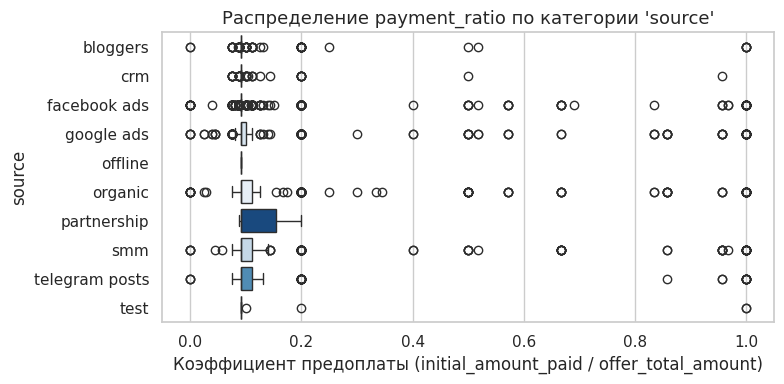

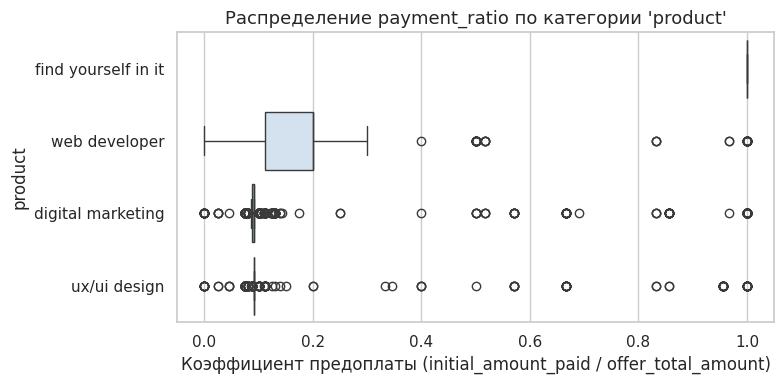

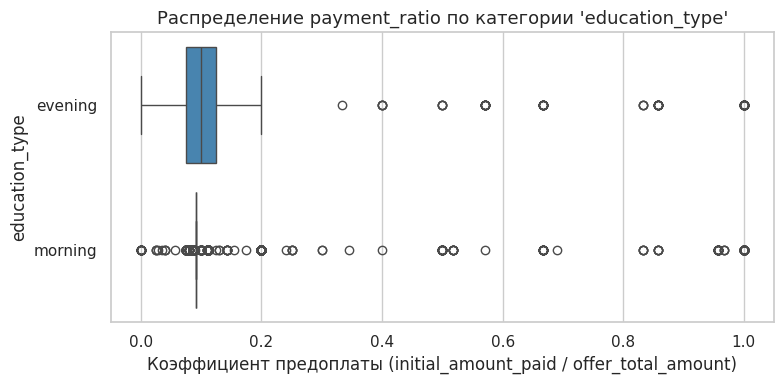

source            product education_type  count      mean  \
14    facebook ads      web developer        evening      1  1.000000   
50         webinar       ux/ui design        evening      3  0.525000   
15    facebook ads      web developer        morning    107  0.216181   
20      google ads      web developer        morning    109  0.231956   
4         bloggers      web developer        morning     24  0.179398   
57     youtube ads      web developer        morning     39  0.260296   
29     partnership      web developer        morning      3  0.191667   
39  telegram posts      web developer        morning     36  0.236111   
26         organic      web developer        morning     92  0.259070   
9              crm      web developer        morning     12  0.163757   
34             smm      web developer        morning     60  0.241716   
47      tiktok ads      web developer        morning     33  0.227581   
52         webinar      web developer        morning     17  0.213046   
42            test      web developer        morning      2  0.150000   
30             smm  digital marketing        evening     18  0.395300   
22         organic  digital marketing        evening     29  0.373748   
43      tiktok ads  digital marketing        evening     30  0.198704   
53     youtube ads  digital marketing        evening     11  0.161760   
10    facebook ads  digital marketing        evening     53  0.229169   
12    facebook ads       ux/ui design        evening     23  0.182660   

      median  
14  1.000000  
50  0.666667  
15  0.200000  
20  0.200000  
4   0.200000  
57  0.200000  
29  0.200000  
39  0.200000  
26  0.200000  
9   0.200000  
34  0.200000  
47  0.200000  
52  0.200000  
42  0.150000  
30  0.120000  
22  0.120000  
43  0.100000  
53  0.100000  
10  0.100000  
12  0.100000

In [38]:
# --- 1. Подготовка данных ---
df_ratio = df_deals.copy()

# Фильтруем строки с заполненными данными по оплатам и предложениям
df_ratio = df_ratio[
    df_ratio["offer_total_amount"].notna() &
    df_ratio["initial_amount_paid"].notna() &
    (df_ratio["offer_total_amount"] > 0)
].copy()

# Пересчёт коэффициента предоплаты
df_ratio["payment_ratio"] = df_ratio["initial_amount_paid"] / df_ratio["offer_total_amount"]
df_ratio.loc[df_ratio["payment_ratio"] > 1.5, "payment_ratio"] = np.nan

# --- 2. Функция для построения boxplot по категориям ---
def plot_payment_ratio_by_category(df, category, top_n=10):
    """
    Визуализирует распределение коэффициента предоплаты (payment_ratio)
    по выбранной категориальной переменной.
    """
    if category not in df.columns:
        print(f"Столбец '{category}' не найден в датафрейме.")
        return

    plt.figure(figsize=(8, 4))
    order = (
        df.groupby(category)["payment_ratio"]
        .median()
        .sort_values(ascending=False)
        .head(top_n)
        .index
    )
    sns.boxplot(
        data=df[df[category].isin(order)],
        x="payment_ratio", y=category,
        order=order, orient="h", hue=category,
        palette="Blues", legend=False
    )
    plt.title(f"Распределение payment_ratio по категории '{category}'", fontsize=13)
    plt.xlabel("Коэффициент предоплаты (initial_amount_paid / offer_total_amount)")
    plt.ylabel(category)
    plt.tight_layout()
    plt.show()

# --- 3. Визуализация по основным категориям ---
plot_payment_ratio_by_category(df_ratio, "source")
plot_payment_ratio_by_category(df_ratio, "product")
plot_payment_ratio_by_category(df_ratio, "education_type")

# --- 4. Статистическая сводка ---
group_stats = (
    df_ratio.groupby(["source", "product", "education_type"])["payment_ratio"]
    .agg(["count", "mean", "median"])
    .reset_index()
    .sort_values(by="median", ascending=False)
)
display(group_stats.head(20))